In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from unet import eval_preds

In [18]:
def plot_images(image, pred_brain_mask, target_mask, model_mask, atlas_mask):
    """draw image, pred, mask side by side"""
    fig, ax = plt.subplots(1,5, figsize=(20,10))
    axes = ax.flatten()
    for ax, im, t in zip(axes, [image, pred_brain_mask, target_mask, model_mask, atlas_mask], 
                         ["image", "pred brain mask", "target mask", "pred vent mask" ,"atlas mask"]) :
        ax.imshow(im, cmap="gray")
        ax.set_title(t, fontdict={"fontsize":20})
        
def plot_overlaid_images(images, preds, masks, image_index, color_maps, alpha_, slice_range):
    for i in slice_range:
        fig, ax = plt.subplots(1, 1, figsize=(20,10))
        ax.imshow(images[IMG_NUM][i], cmap=color_maps[0])
        ax.imshow(preds[IMG_NUM][i], cmap=color_maps[1], alpha=alpha_)
        ax.imshow(masks[IMG_NUM][i], cmap=color_maps[2], alpha=alpha_)
        
def vol_perc_diff(mask, pred, absolute=False):
    mask_vol = np.sum(mask.ravel() == 1)
    pred_vol = np.sum(pred.ravel() == 1)
    if not absolute:
        return (pred_vol-mask_vol)/mask_vol
    return abs(pred_vol-mask_vol)/mask_vol

def vol(mask):
    return np.sum(mask.ravel() == 1) * 3


def summary_table(images, target_masks, pred_masks, atlas_masks, file_names):
    pred_dice_scores = [eval_preds(pred_masks[i], target_masks[i]) for i in range(len(images))]
    atlas_dice_scores = [eval_preds(atlas_masks[i], target_masks[i]) for i in range(len(images))]
    pred_percent_vol_diff = [vol_perc_diff(target_masks[i], pred_masks[i])*100 for i in range(len(images))]
    atlas_percent_vol_diff = [vol_perc_diff(target_masks[i], atlas_masks[i])*100 for i in range(len(images))]
    abs_pred_percent_vol_diff = [vol_perc_diff(target_masks[i], pred_masks[i], absolute=True)*100 for i in range(len(images))]
    abs_atlas_percent_vol_diff = [vol_perc_diff(target_masks[i], atlas_masks[i], absolute=True)*100 for i in range(len(images))]
    volume = [vol(pred_masks[i]) for i in range(len(images))]
    d = {'test_name': file_names, 'pred_dice_scores': pred_dice_scores, 'atlas_dice_scores': atlas_dice_scores, 
         'pred_percent_vol_diff': pred_percent_vol_diff, 'atlas_percent_vol_diff': atlas_percent_vol_diff, 
         'abs_pred_percent_vol_diff': abs_pred_percent_vol_diff, 'abs_atlas_percent_vol_diff': abs_atlas_percent_vol_diff,
         'pred_volume_mm^3': volume}
    df = pd.DataFrame(data=d)
    return df

def get_testcase_data(root):
    target_masks_files = sorted(list(Path(root/"ventricle_masks").iterdir()))
    raw_images_files = sorted(list(Path(root/"raw_images").iterdir()))
    atlas_masks_files = sorted(list(Path(root/"ventricle_atlas").iterdir()))
    pred_masks_files = sorted(list(Path(root/"ventricle_pred").iterdir()))
    pred_brain_files = sorted(list(Path(root/"brain_pred").iterdir()))
    target_masks = []
    raw_images = []
    atlas_masks = []
    pred_masks = []
    names = []
    brain_pred_masks = []
    for i in range(len(raw_images_files)):
        target_masks.append(np.load(target_masks_files[i]))
        raw_images.append(np.load(raw_images_files[i]))
        atlas_masks.append(np.load(atlas_masks_files[i]))
        pred_masks.append(np.load(pred_masks_files[i]))
        brain_pred_masks.append(np.load(pred_brain_files[i]))
        names.append(str(raw_images_files[i]).split("/")[-1].split("_")[0])
    return raw_images, target_masks, pred_masks, atlas_masks, brain_pred_masks, names


In [19]:
# Test Set 1 - MR: 
test_case_1_mr = Path("/data/public/Segmentation_Dataset/MR_Dataset/test1")

# Test Set 1 - CT:
test_case_1_ct = Path("/data/public/Segmentation_Dataset/CT_Dataset/test1")
# Test Set 2 - MR:
test_case_2_mr = Path("/data/public/Segmentation_Dataset/MR_Dataset/test2")

# Test Set 2 - CT:
test_case_2_ct = Path("/data/public/Segmentation_Dataset/CT_Dataset/test2")

## Slice By Slice View of Image, Predicted Brain Mask, Target Mask, Model Mask, and Atlas Mask

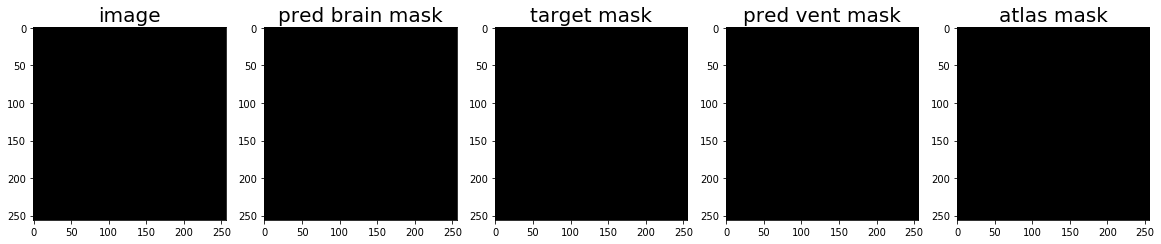

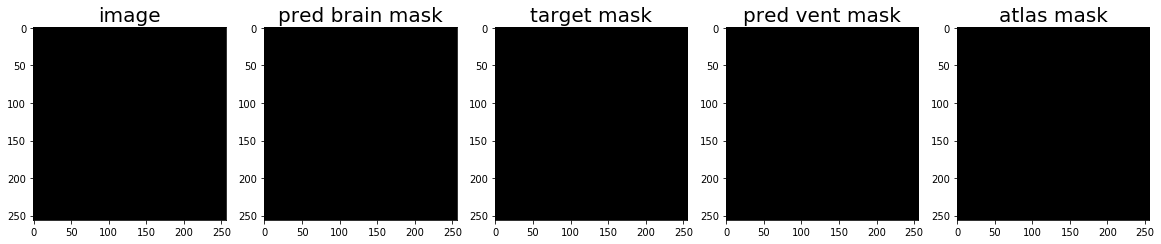

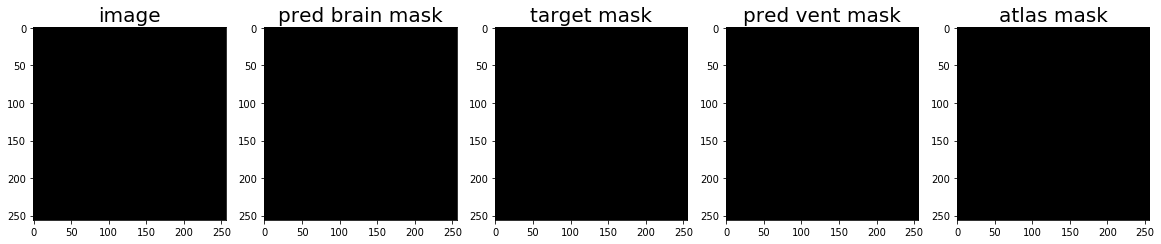

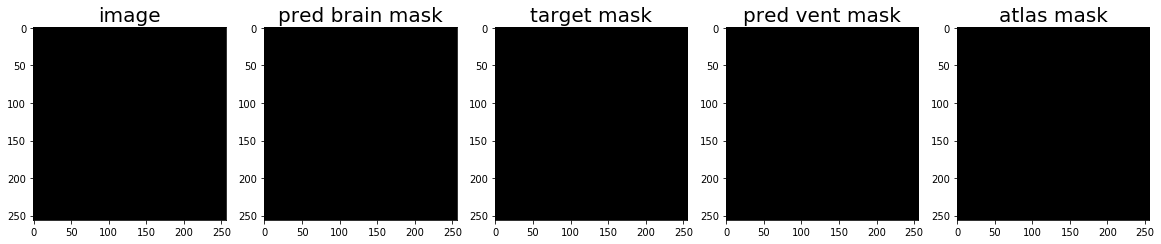

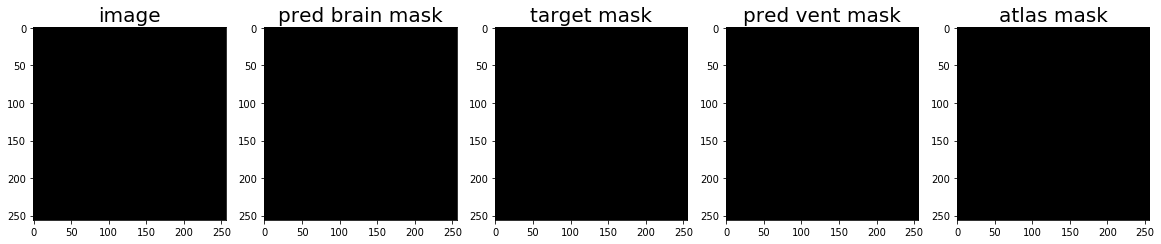

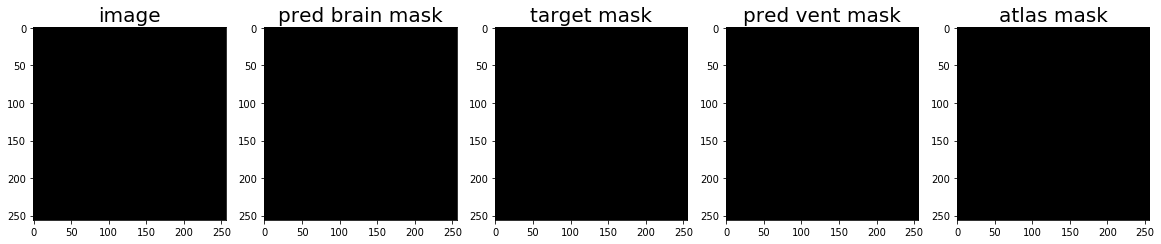

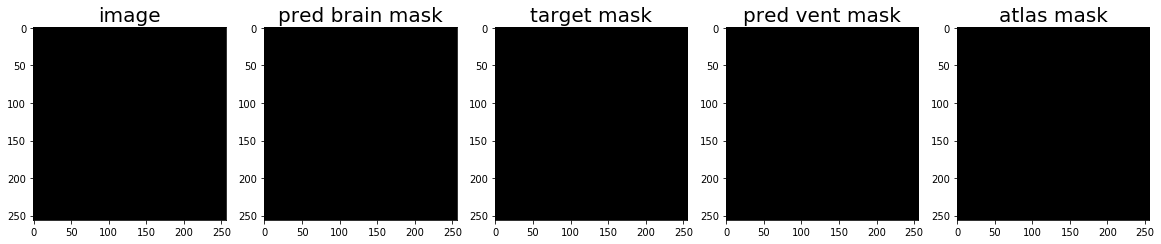

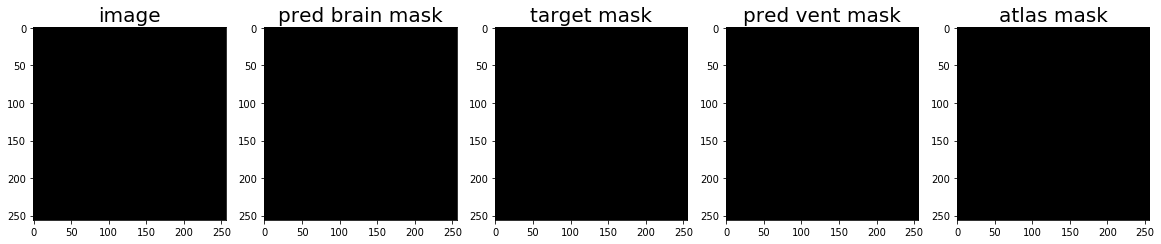

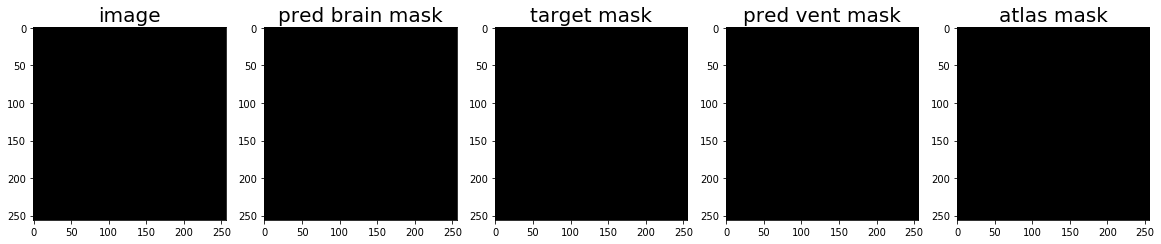

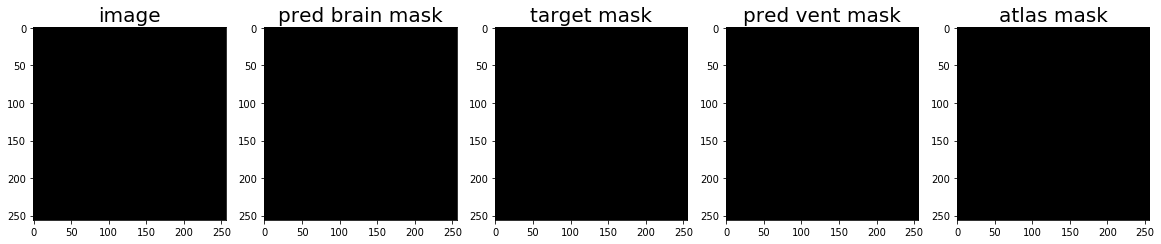

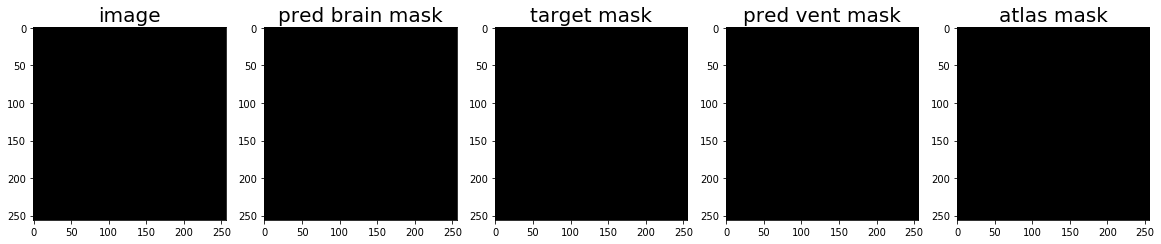

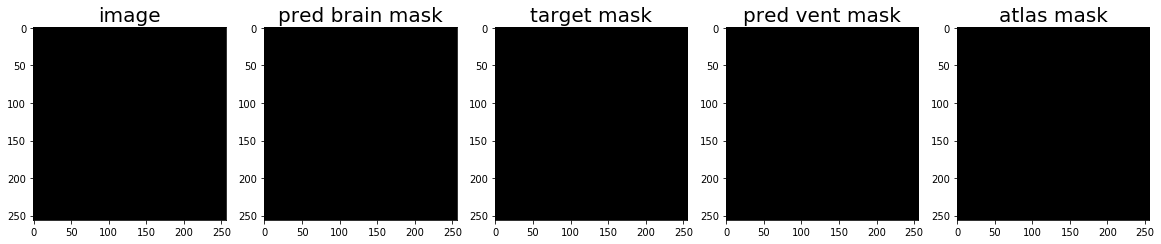

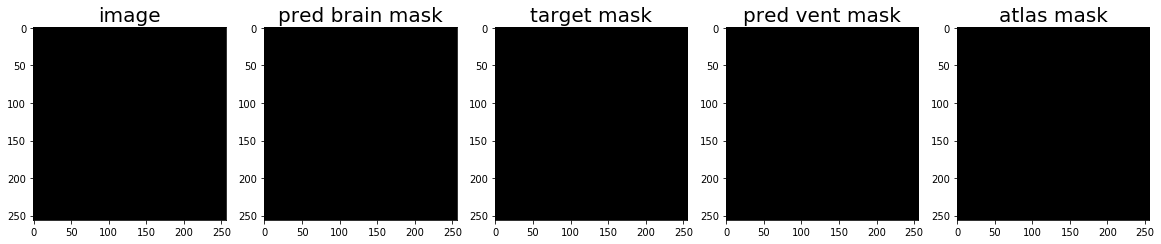

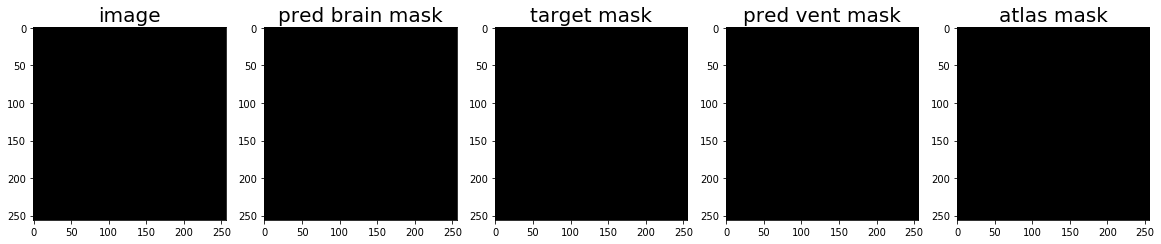

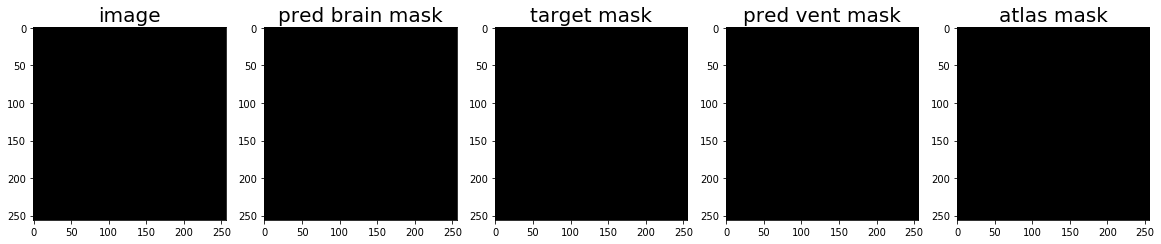

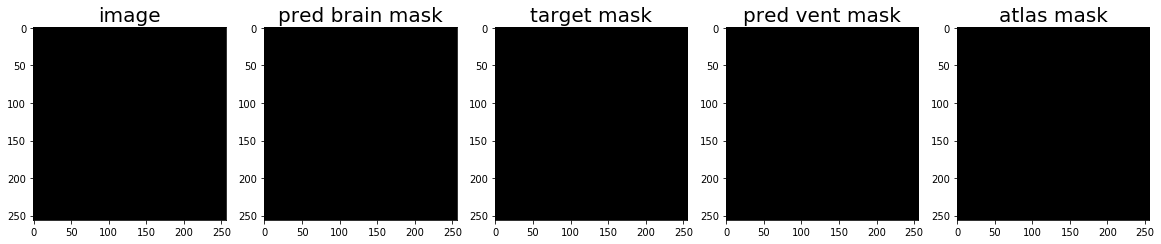

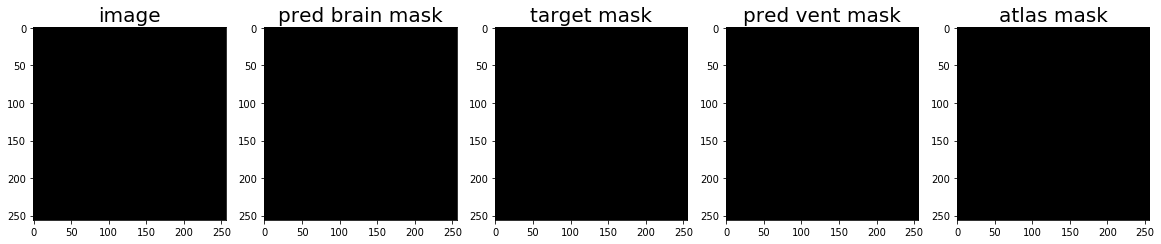

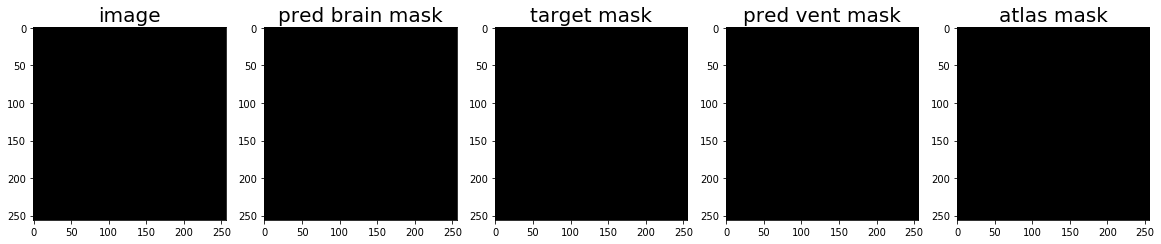

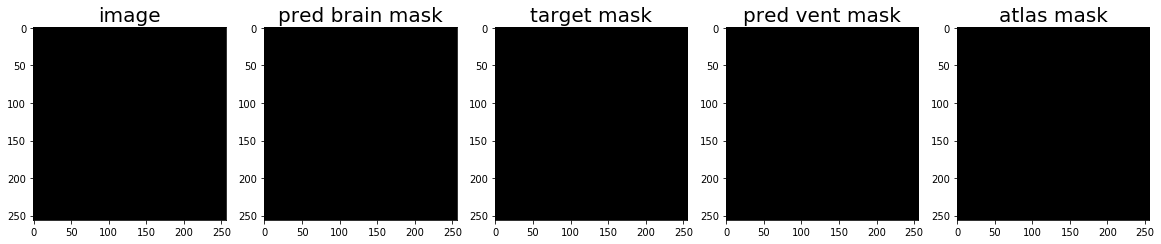

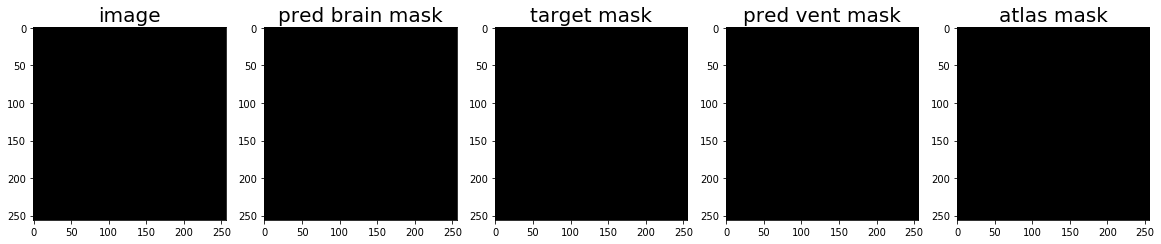

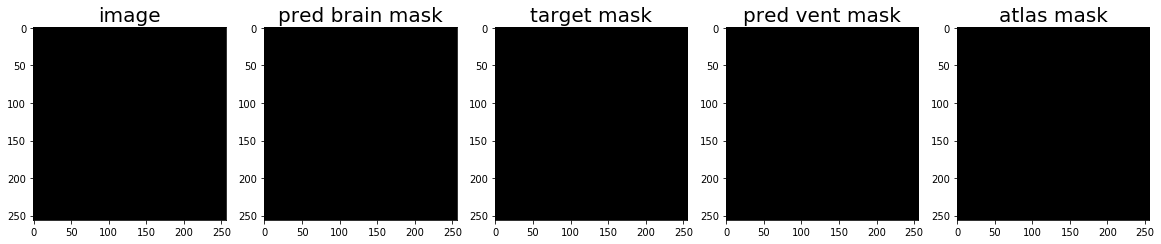

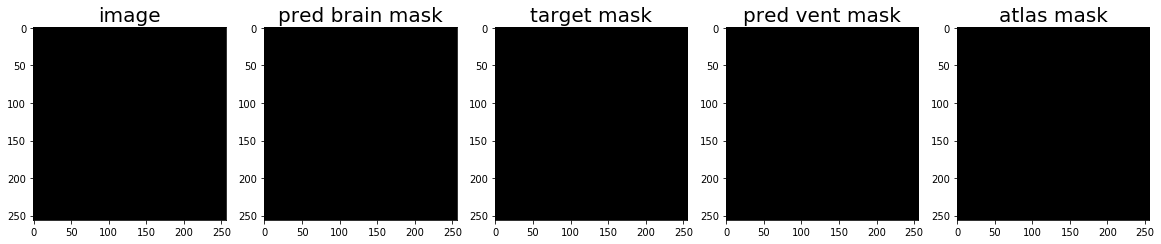

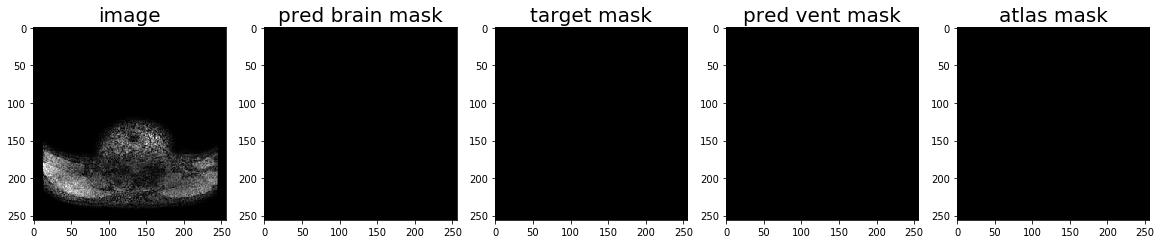

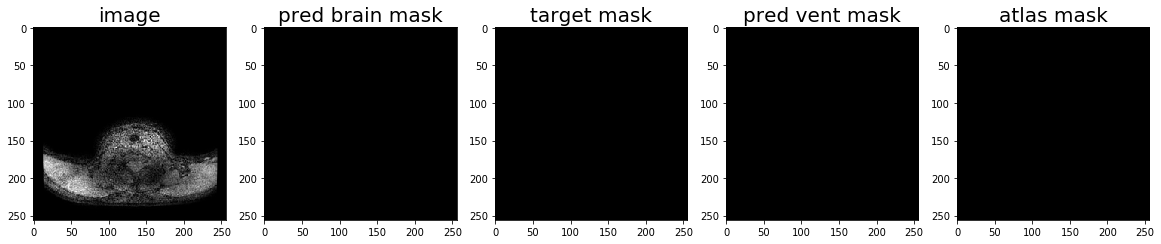

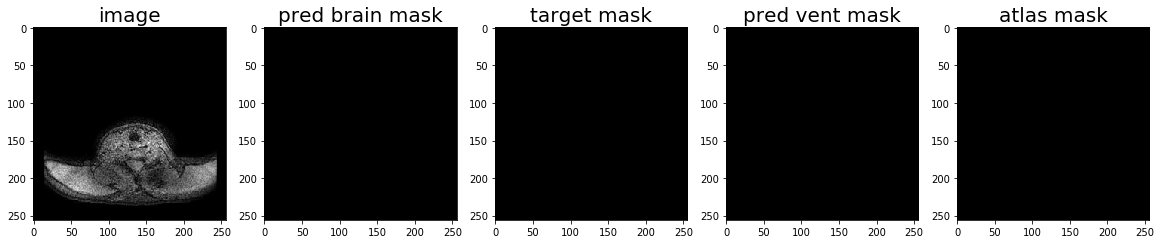

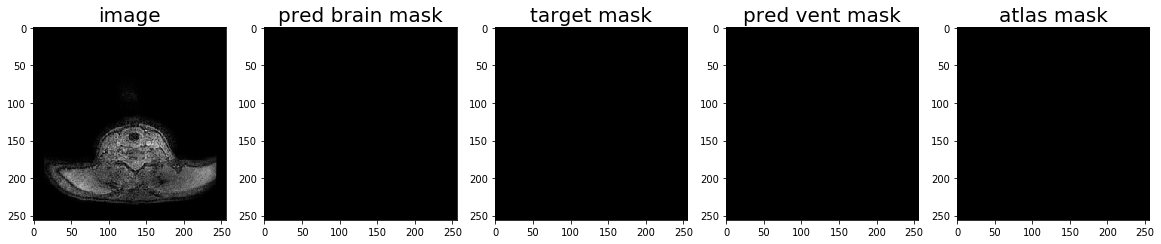

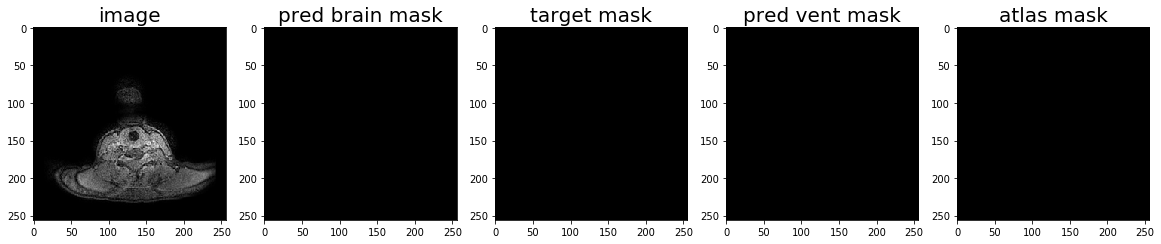

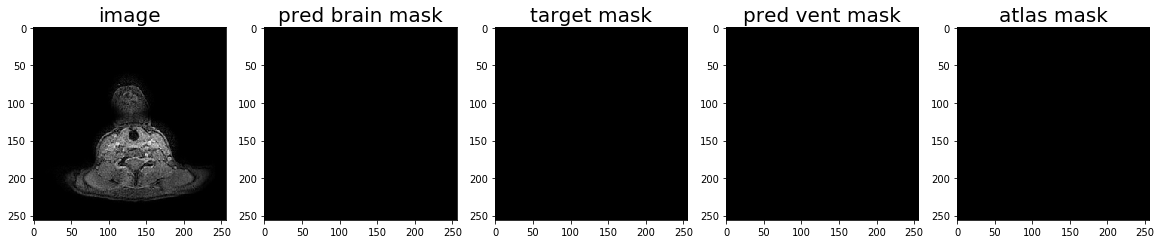

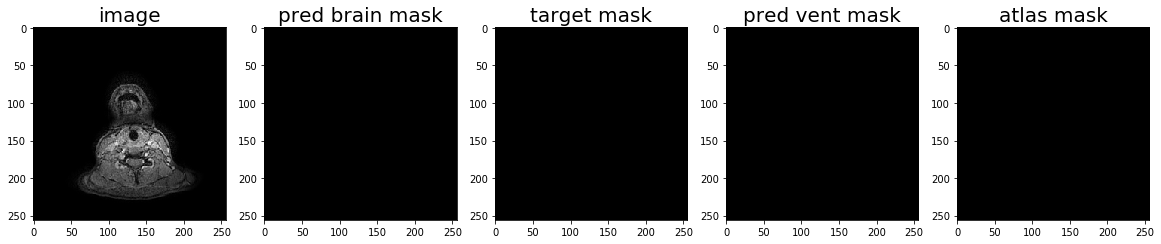

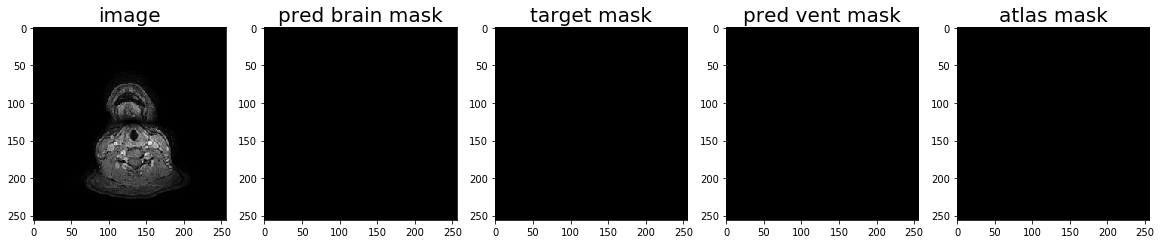

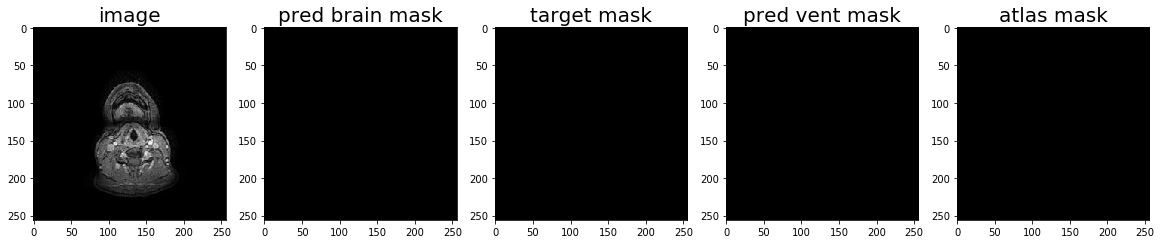

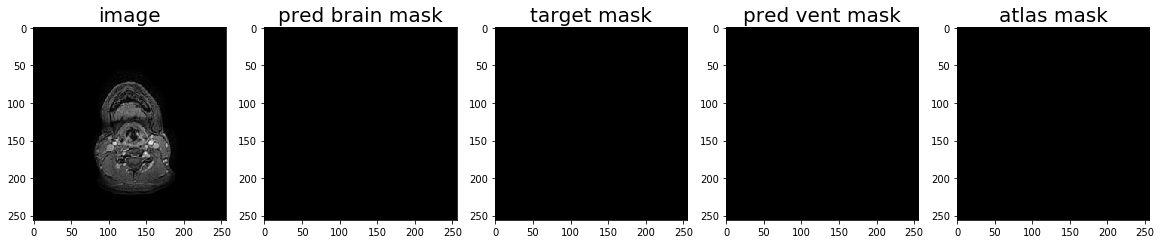

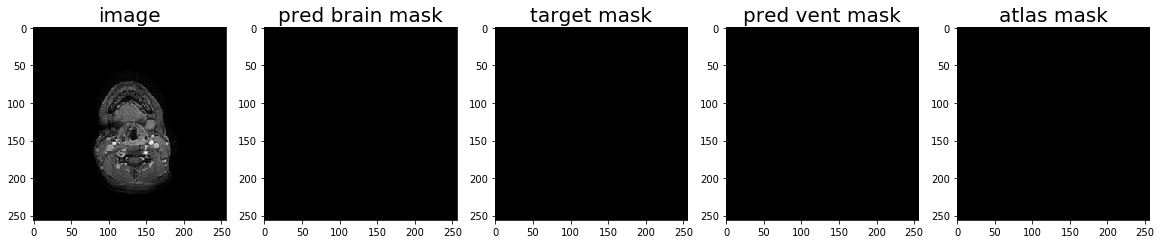

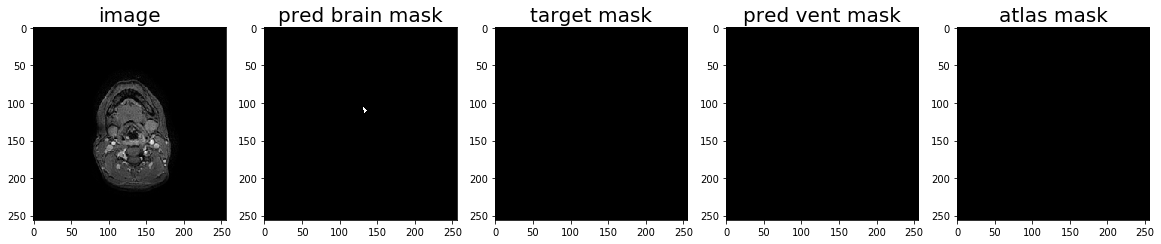

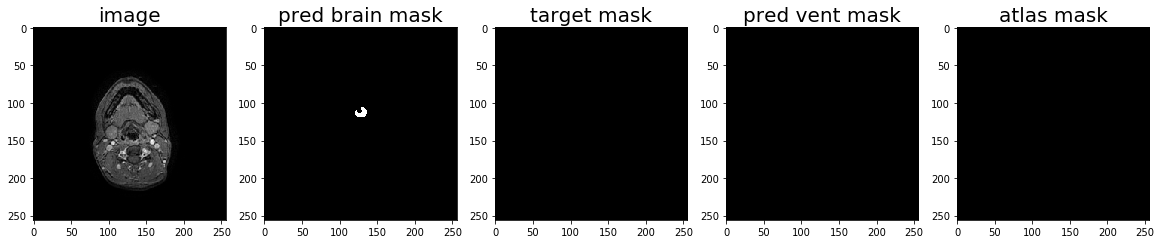

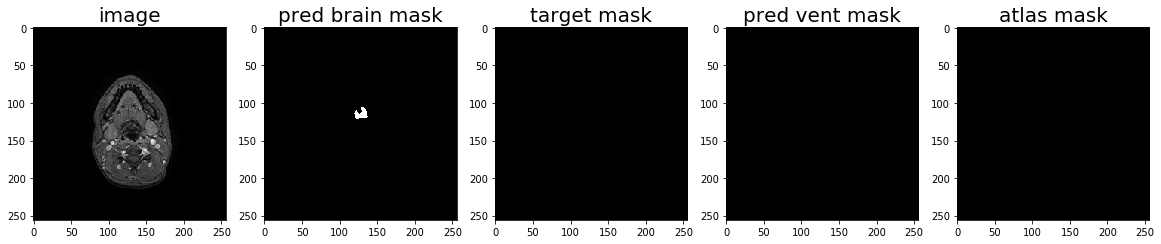

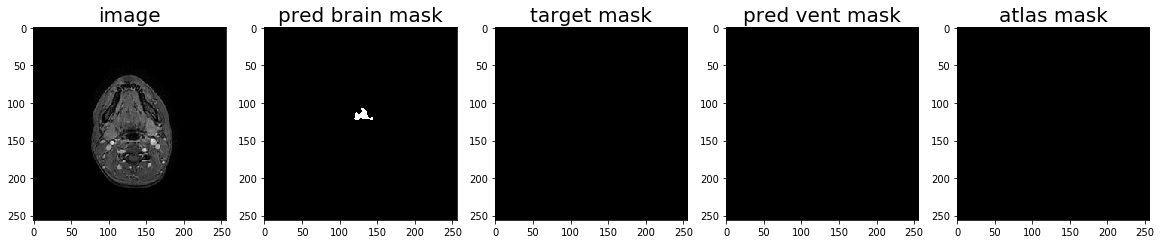

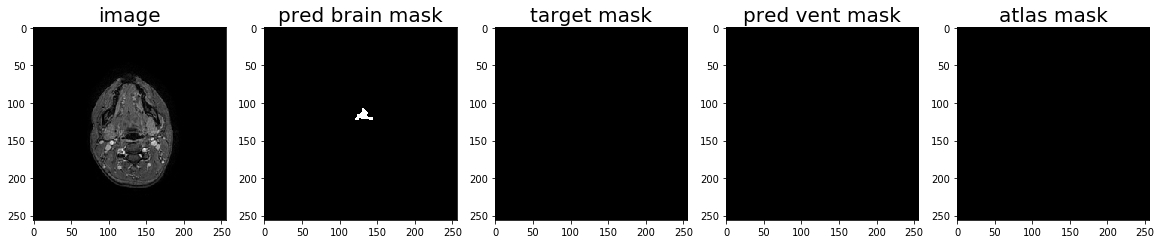

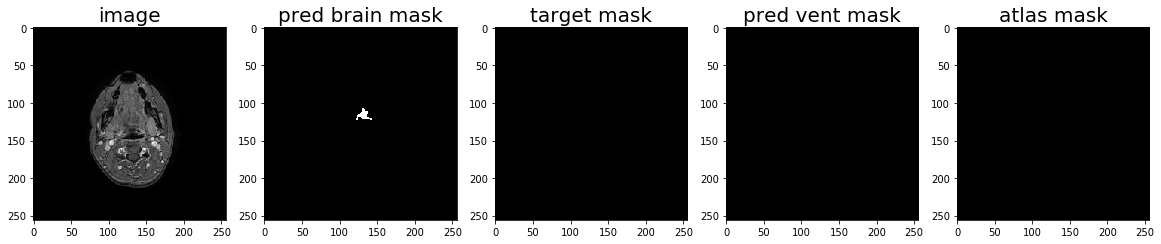

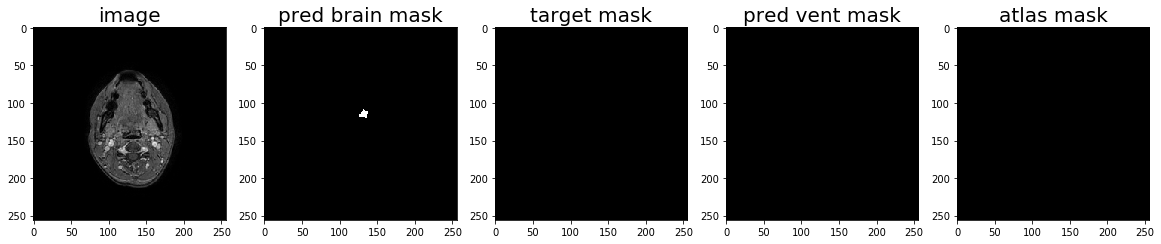

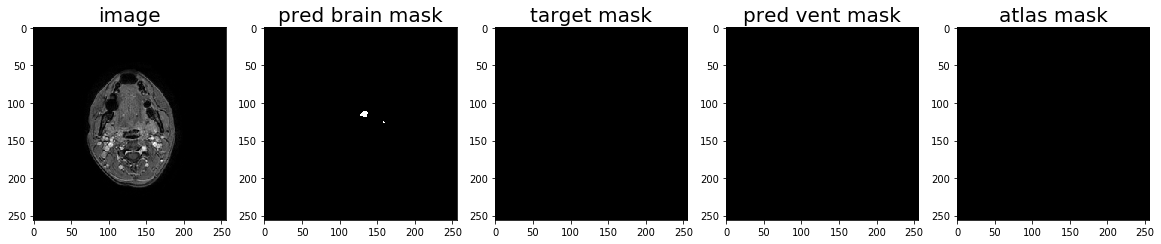

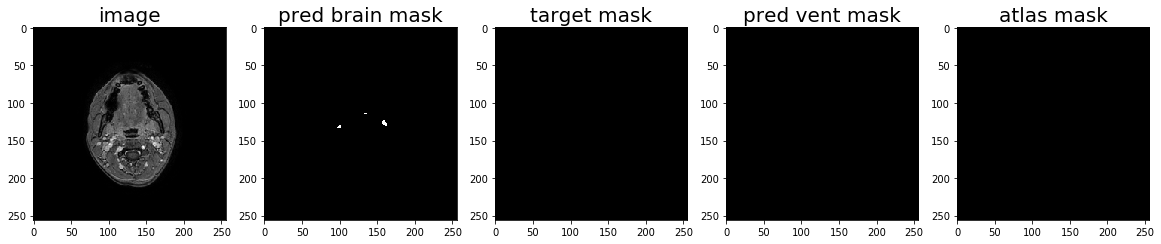

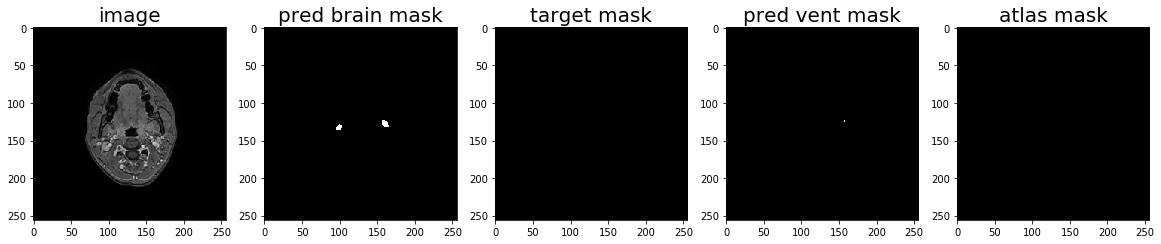

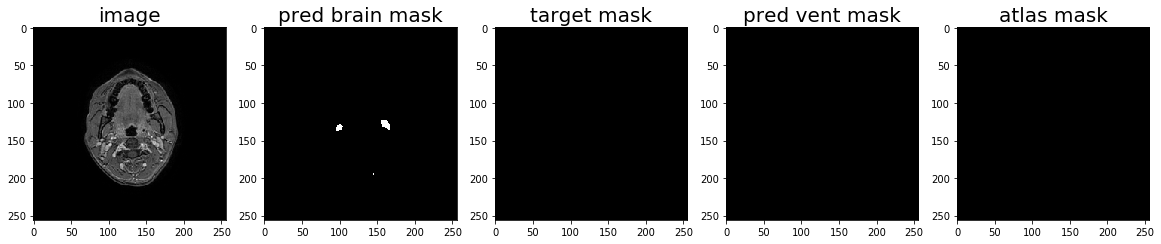

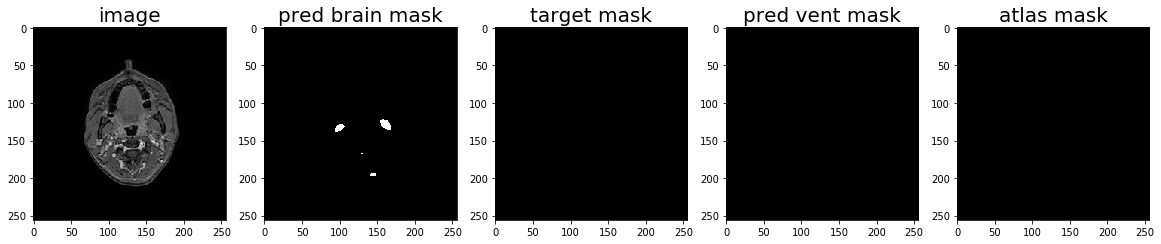

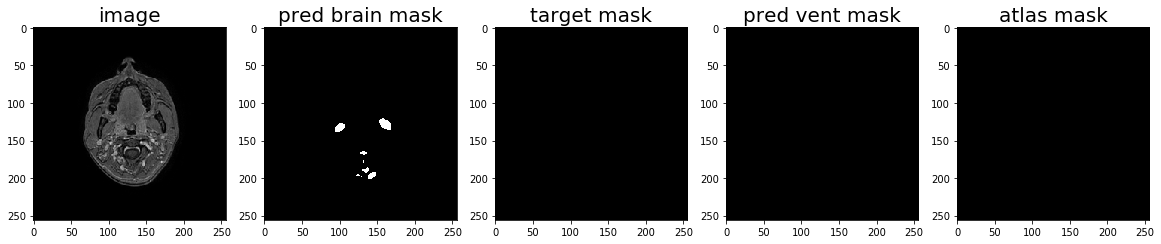

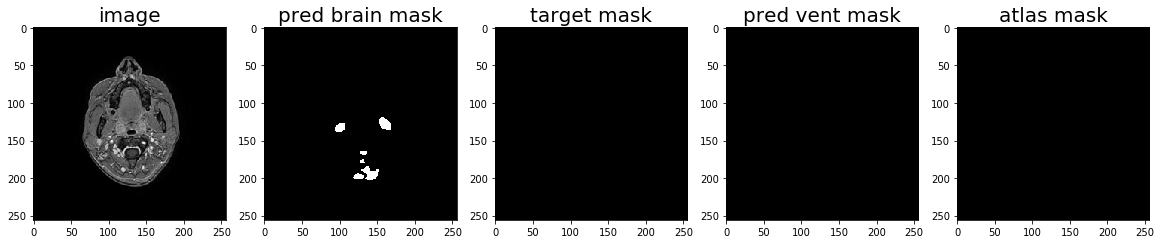

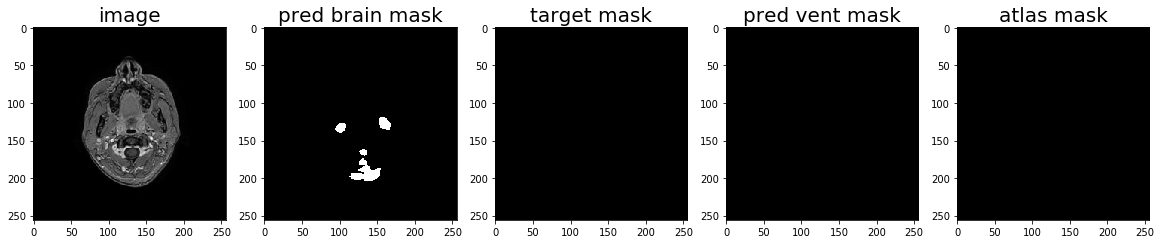

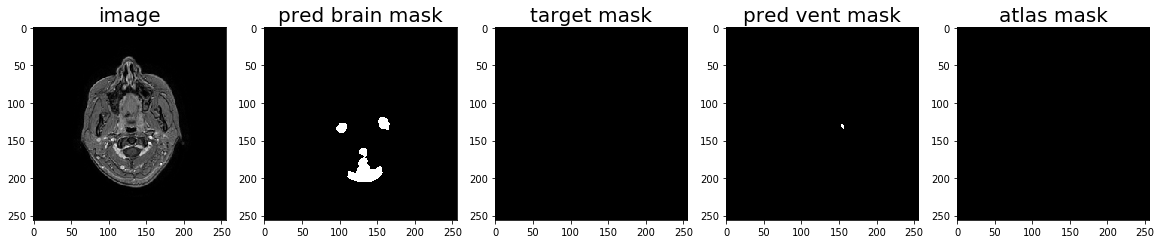

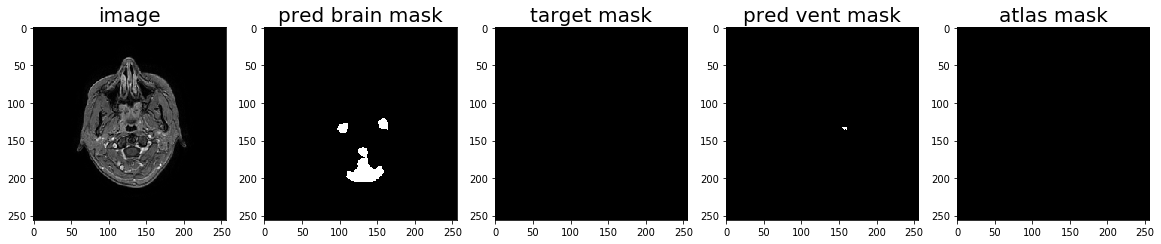

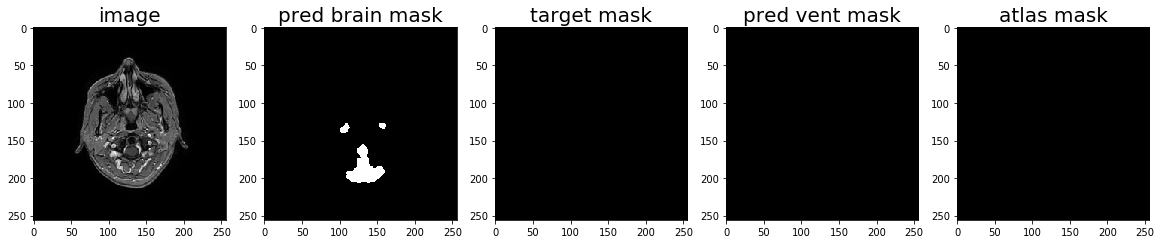

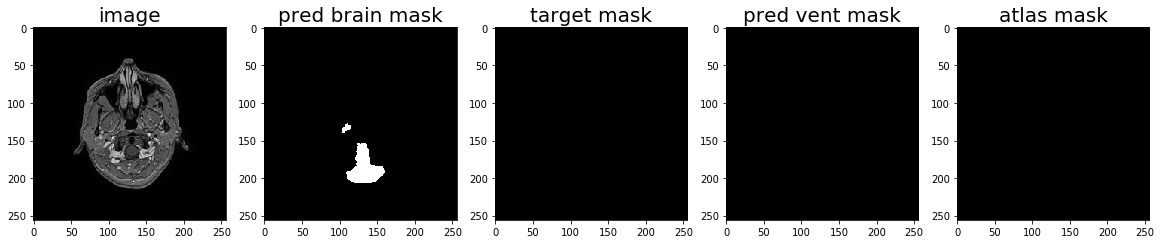

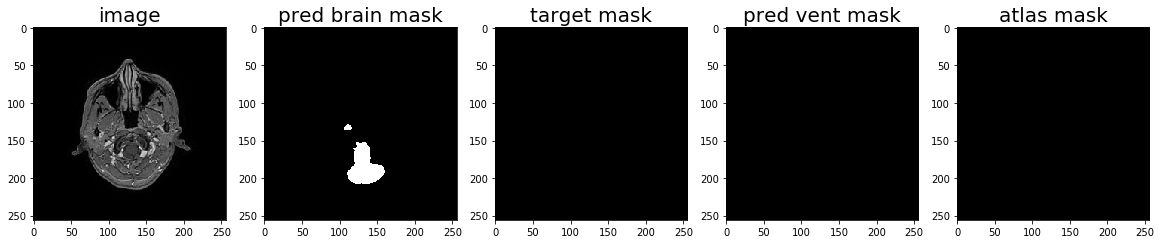

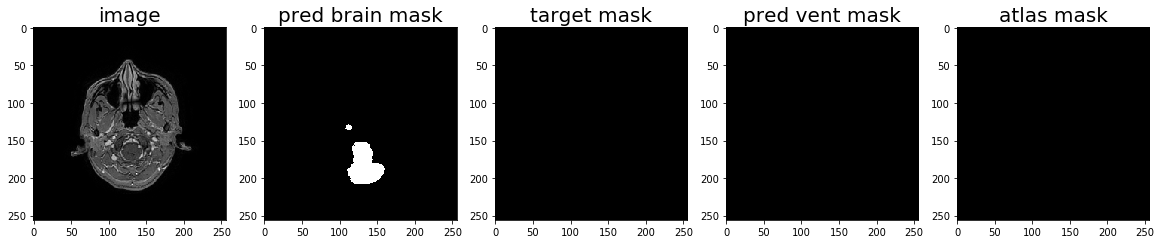

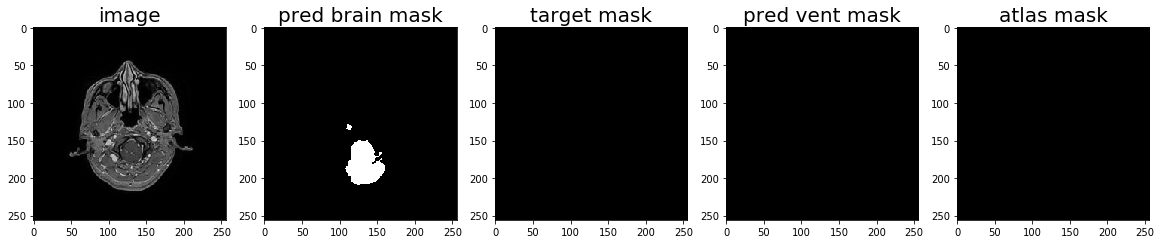

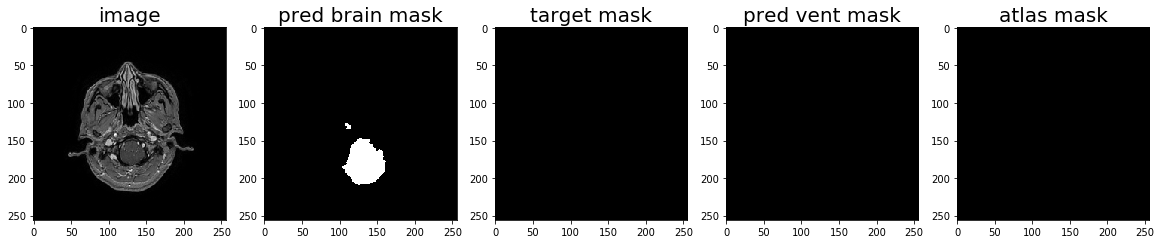

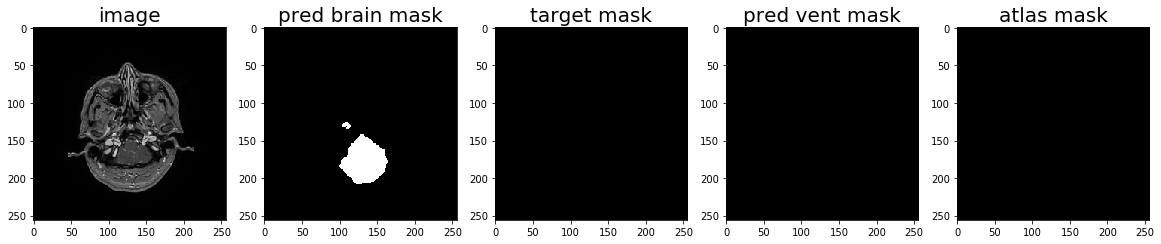

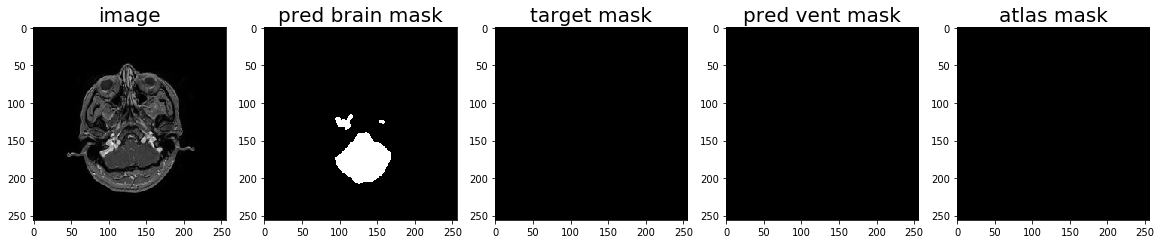

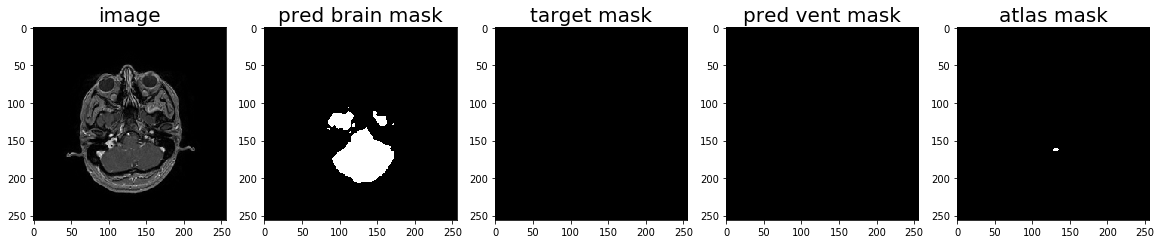

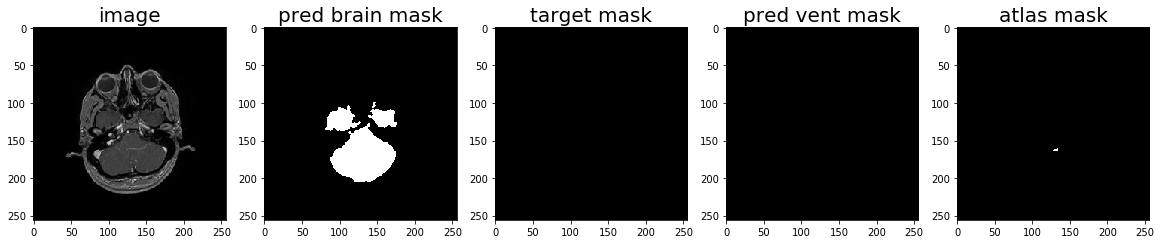

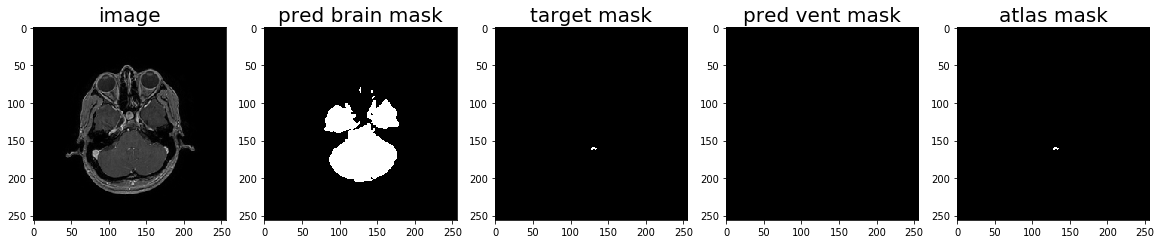

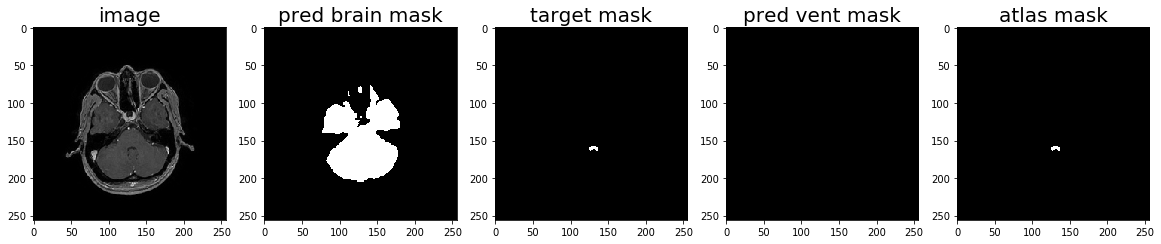

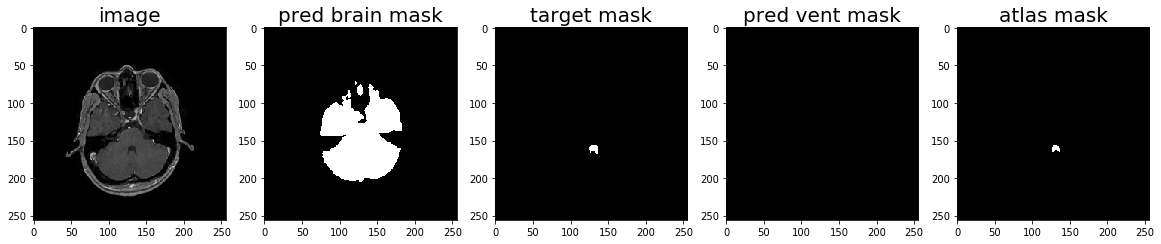

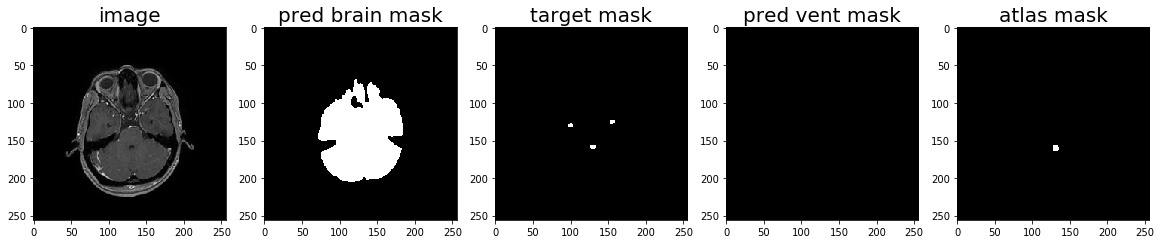

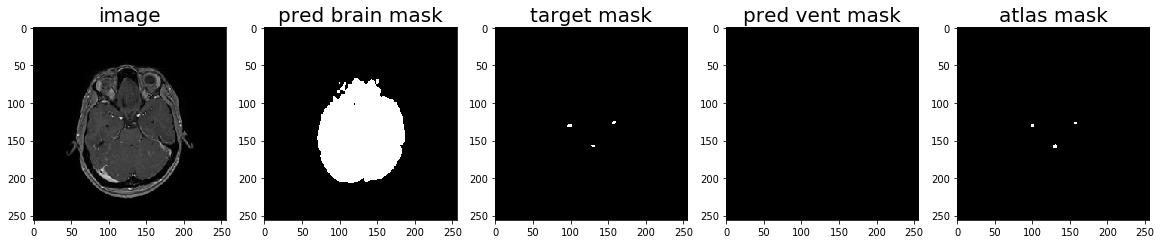

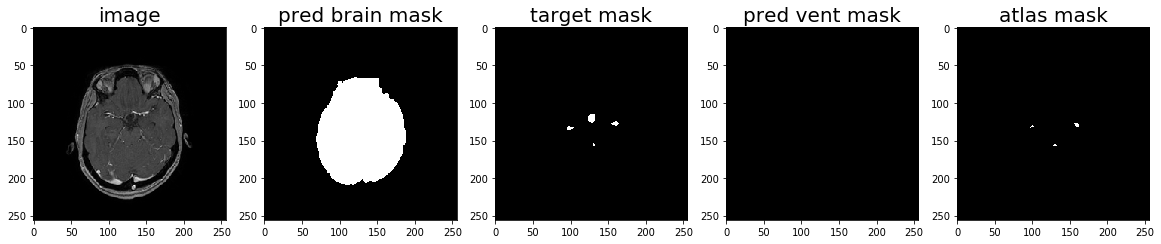

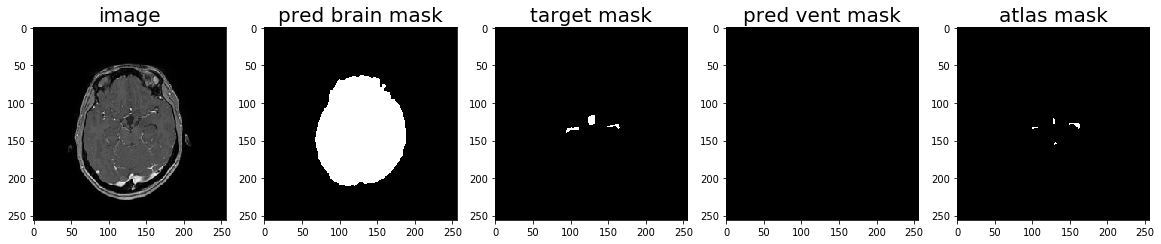

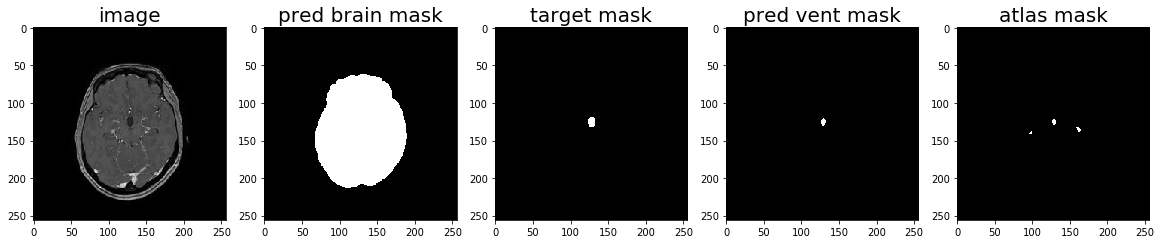

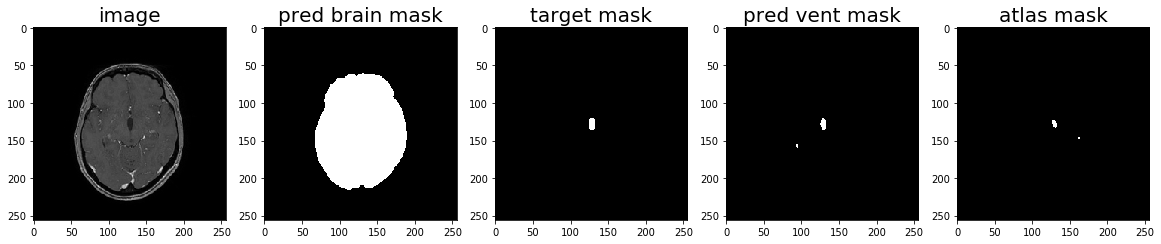

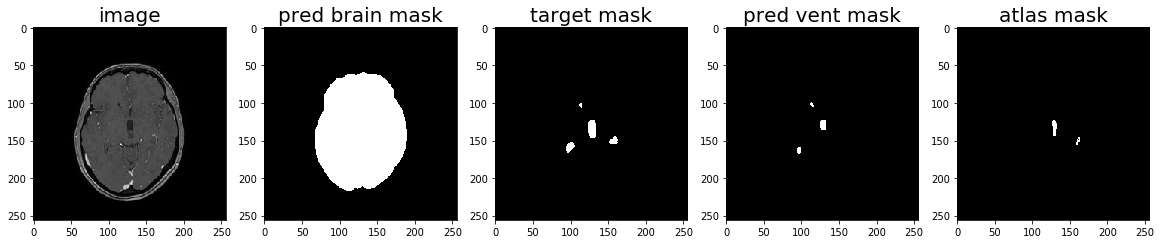

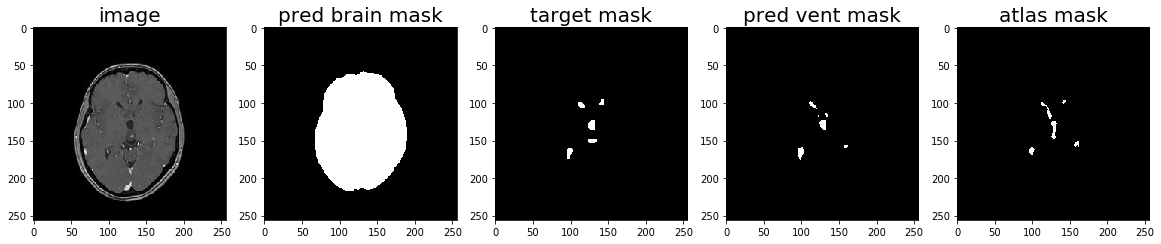

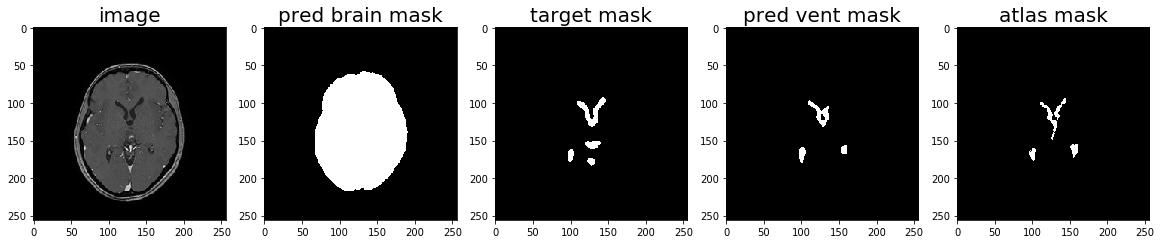

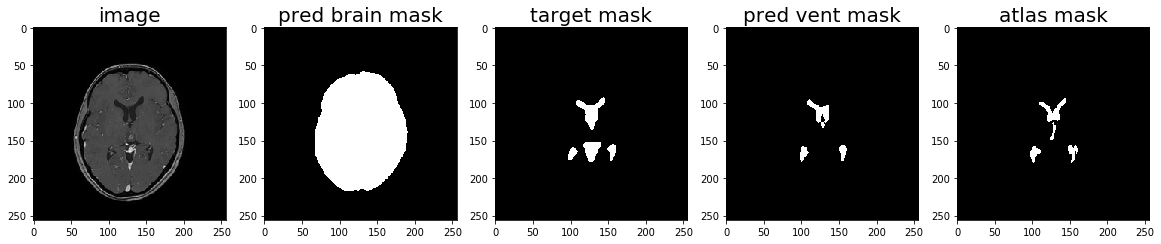

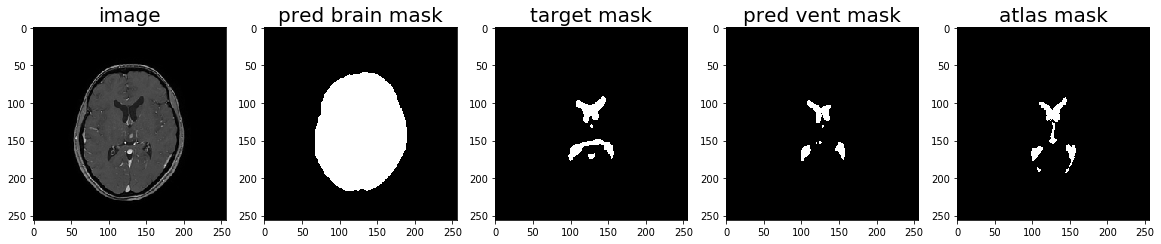

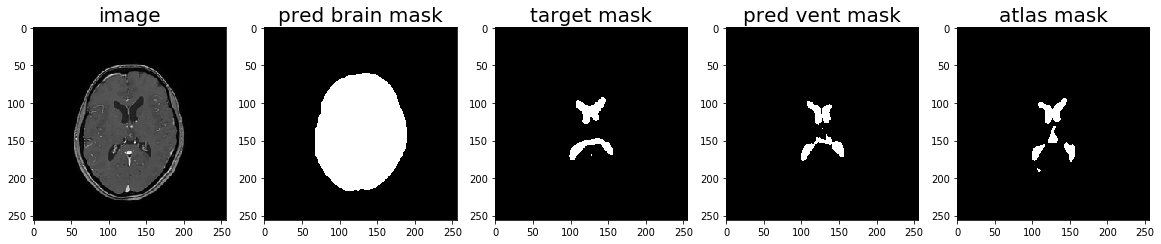

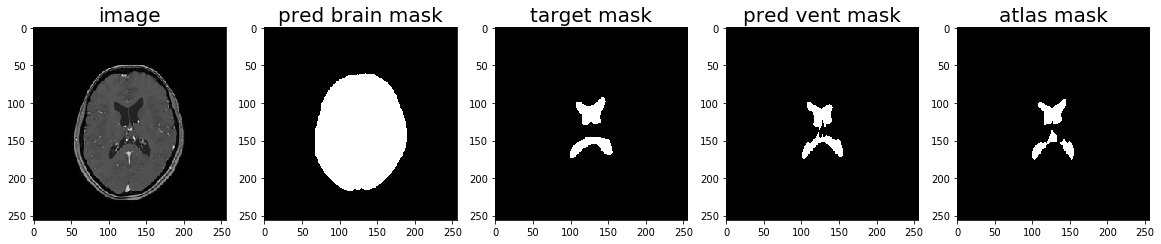

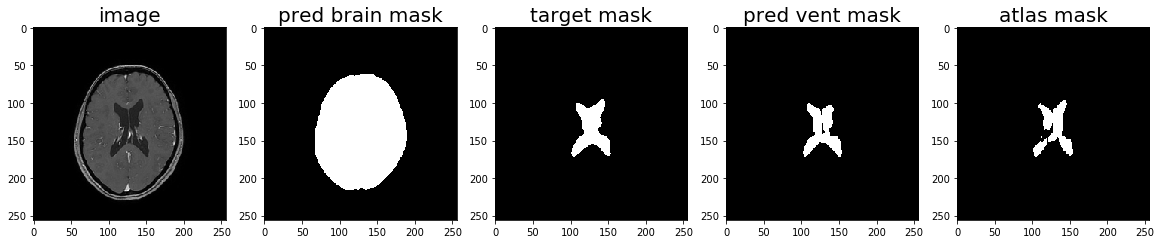

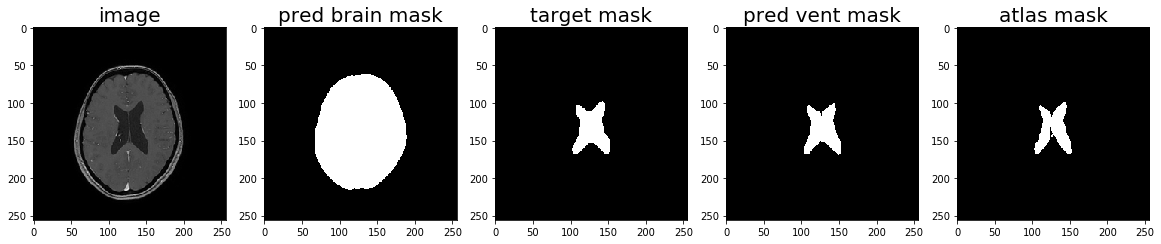

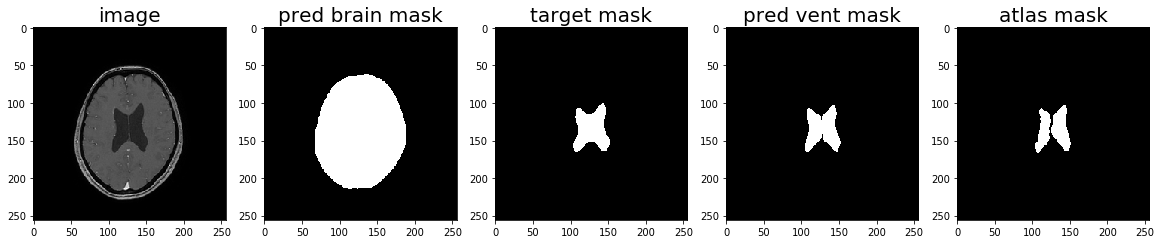

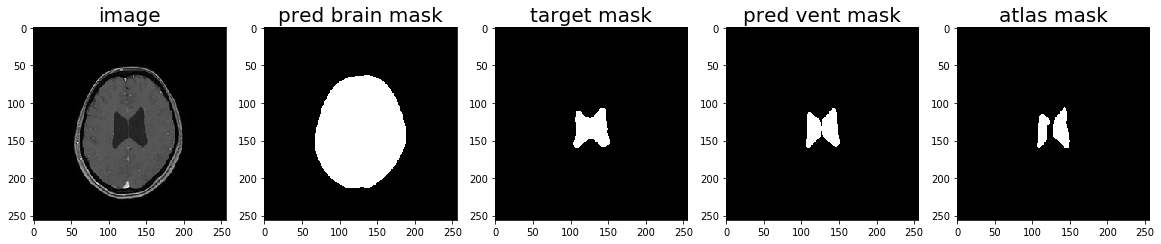

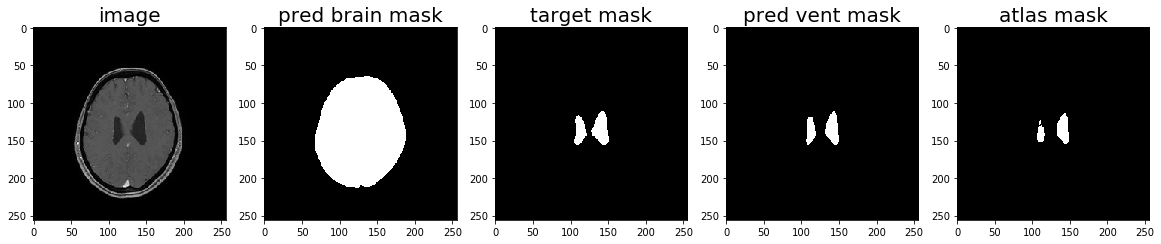

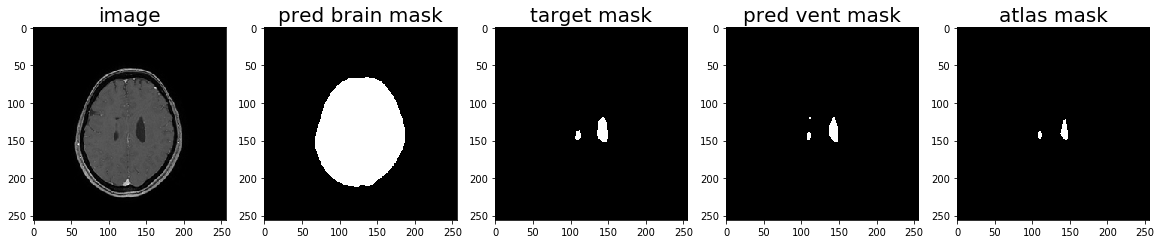

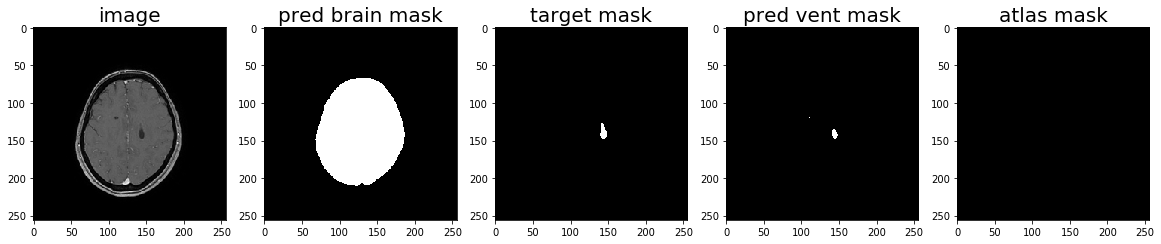

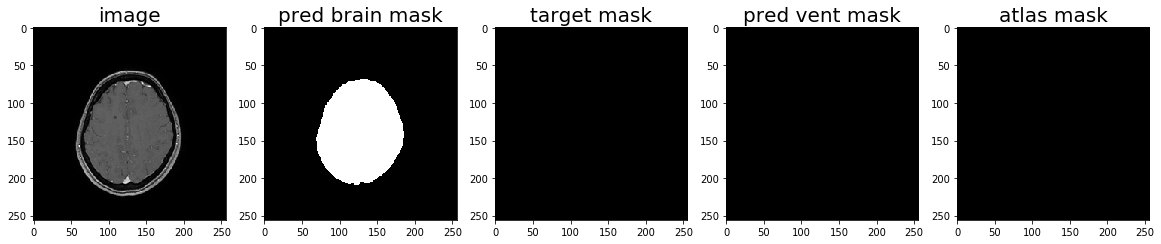

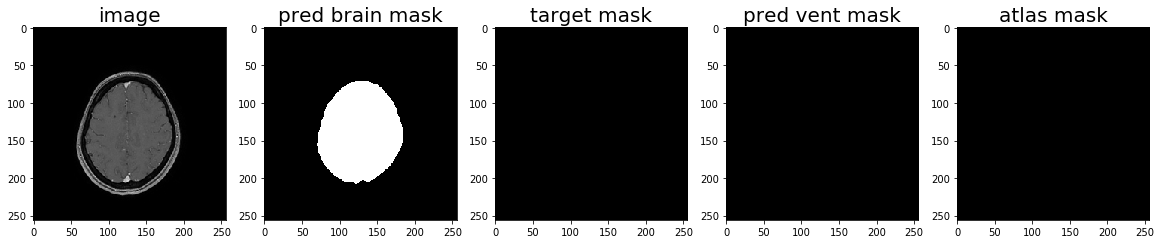

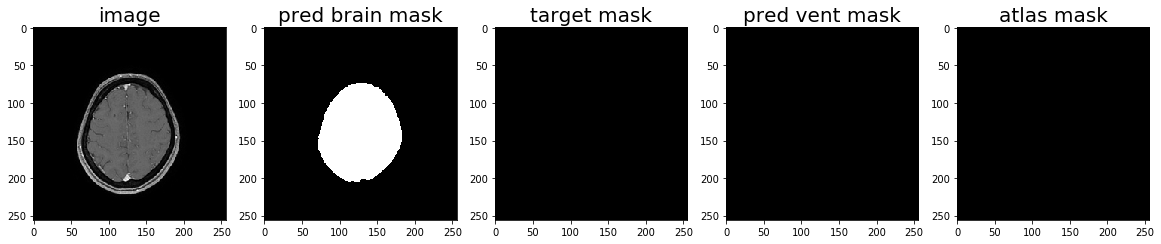

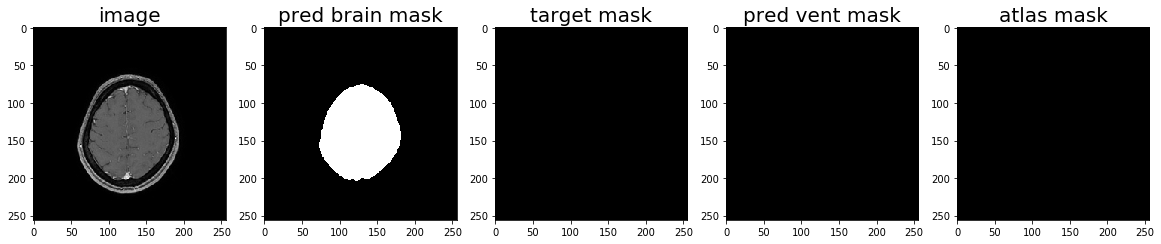

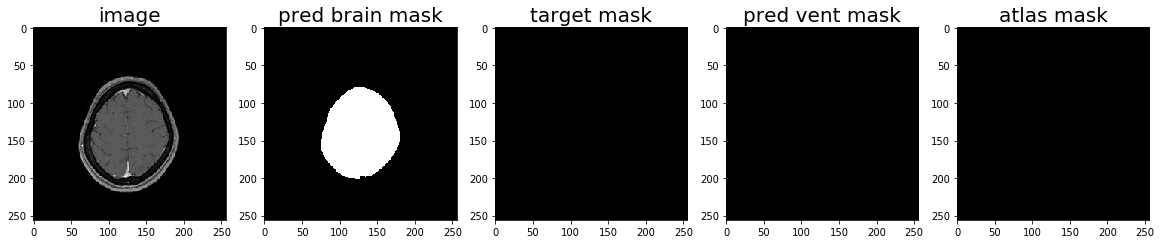

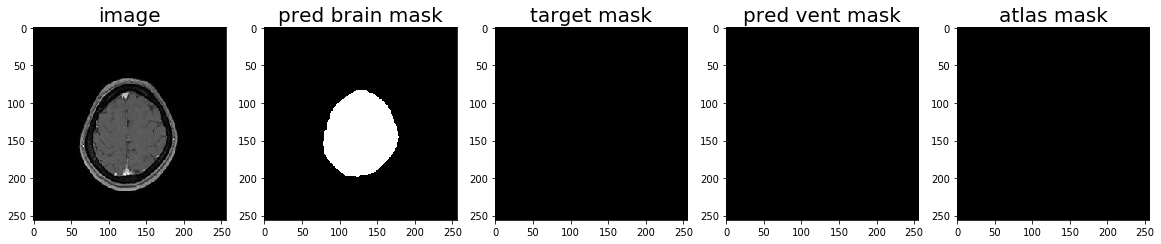

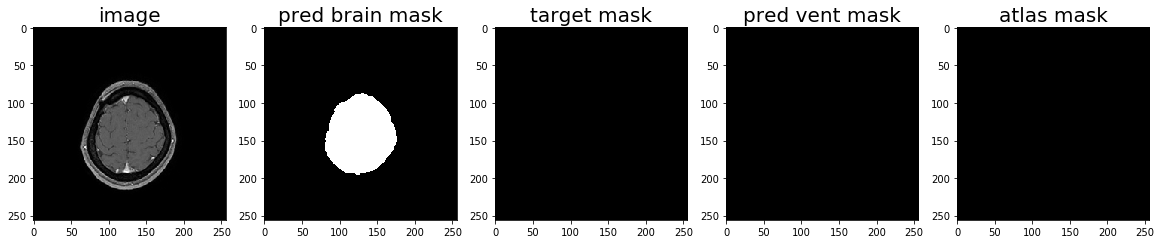

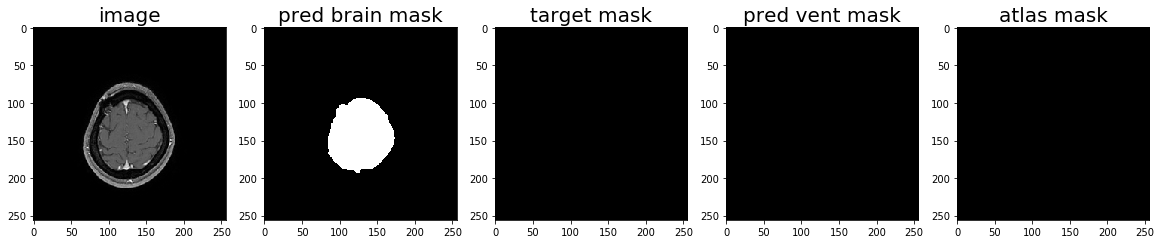

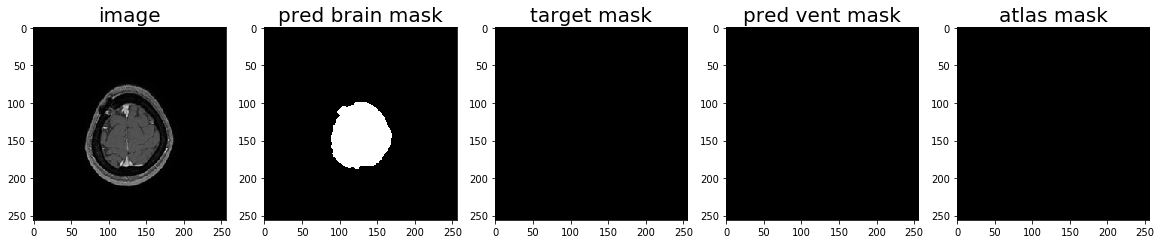

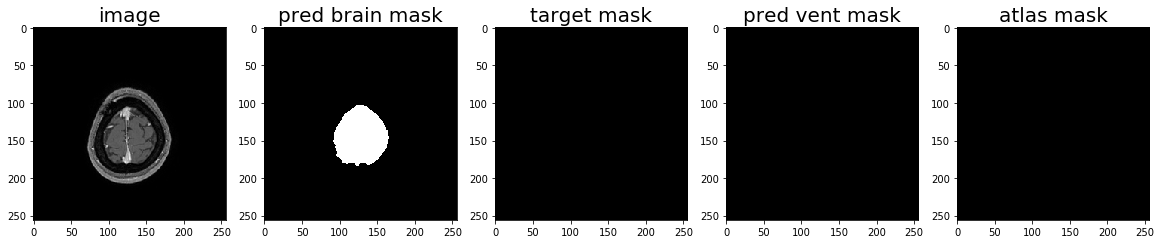

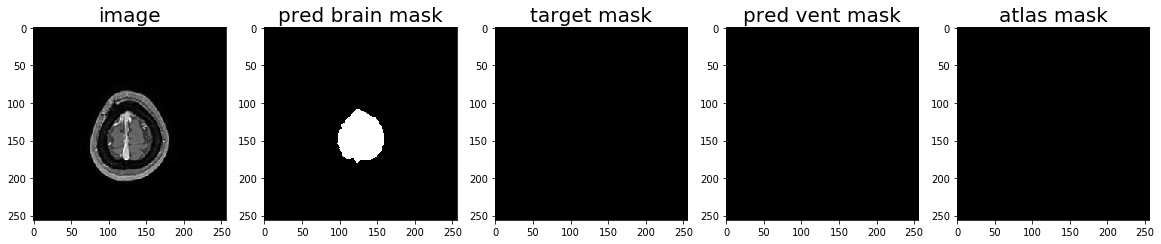

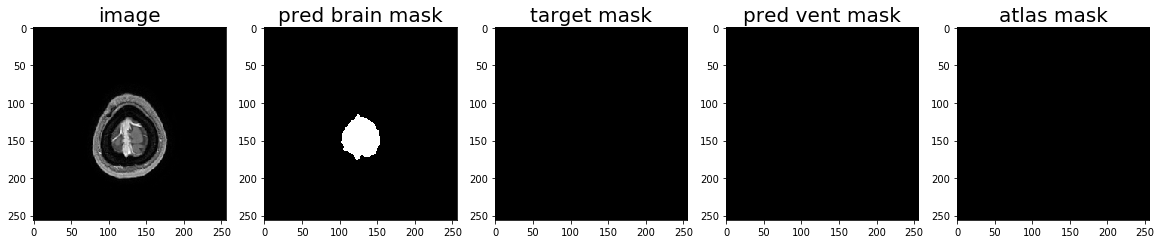

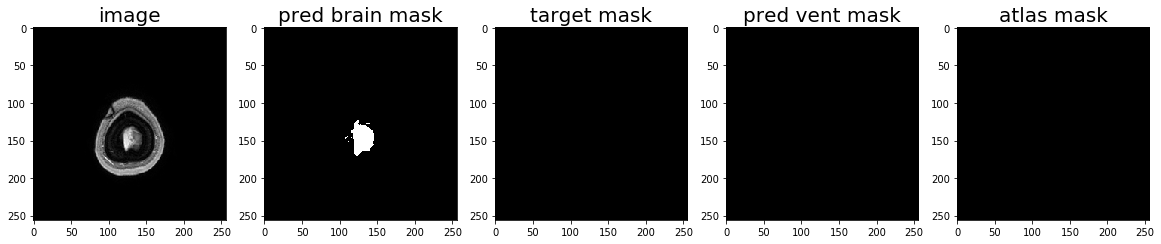

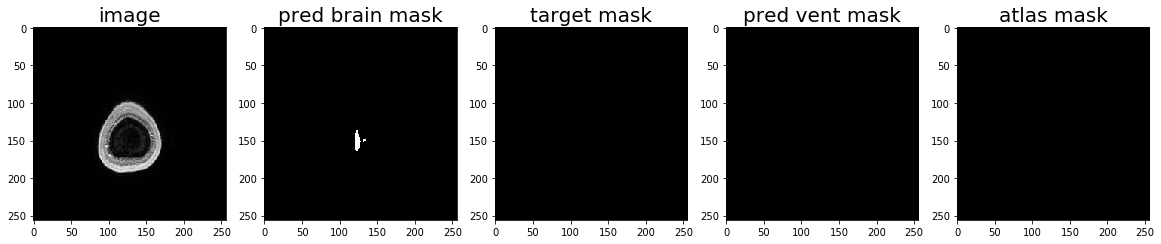

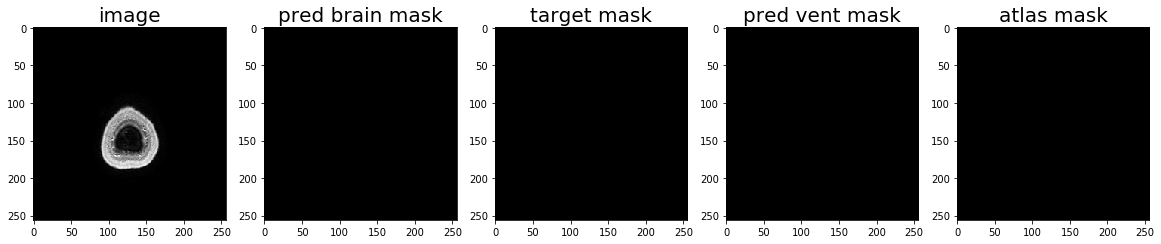

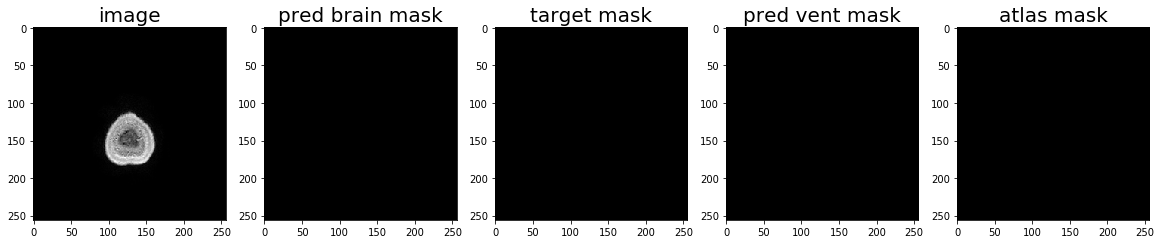

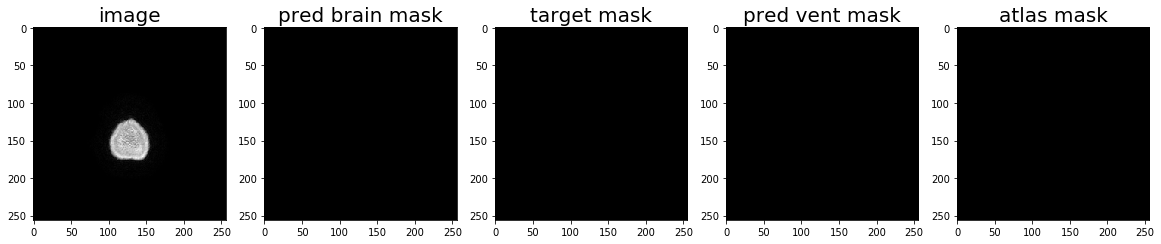

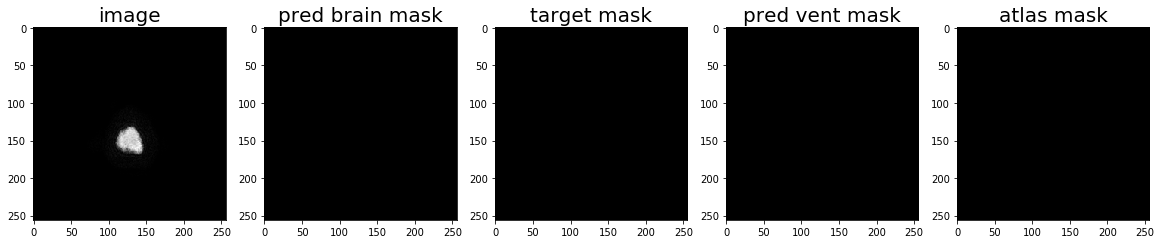

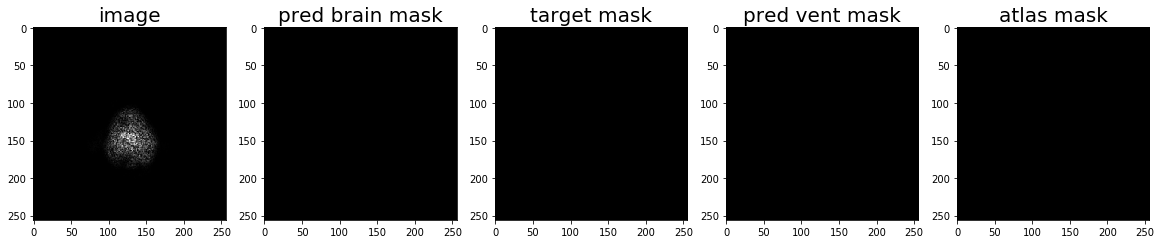

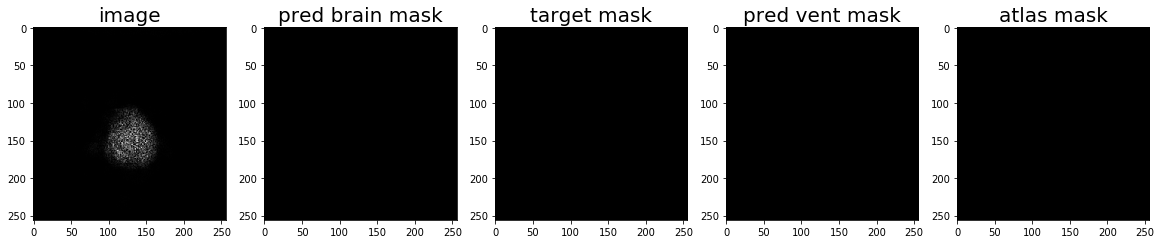

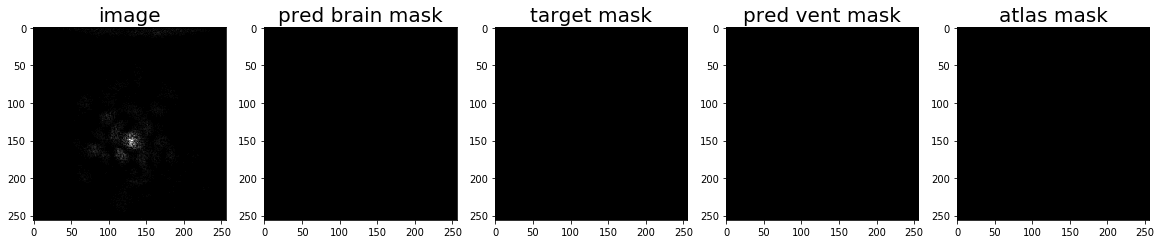

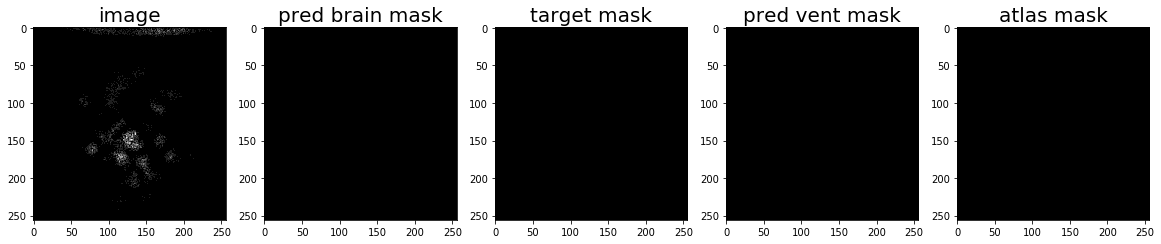

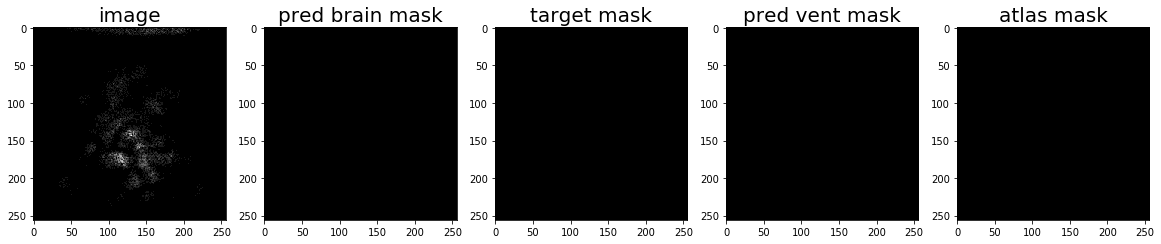

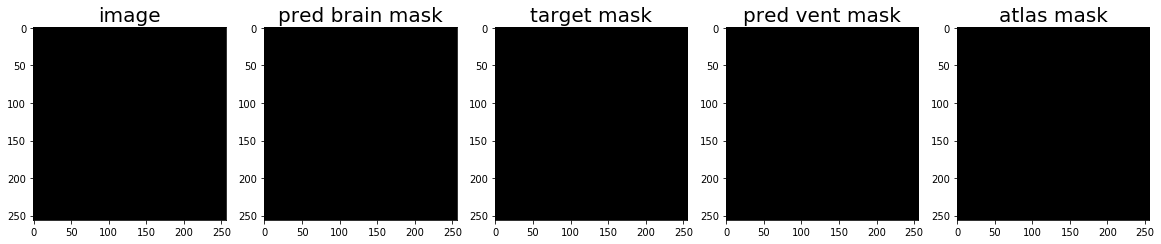

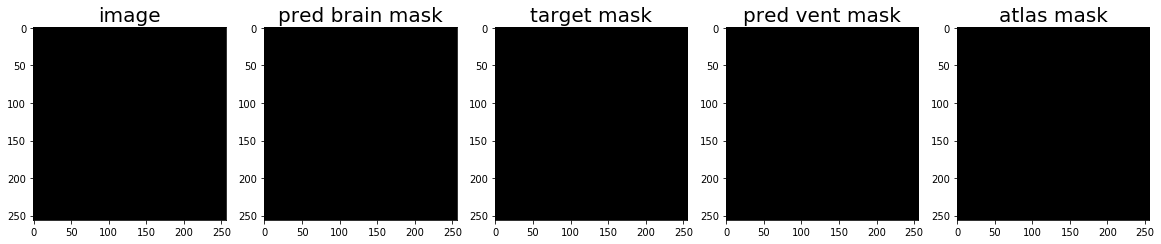

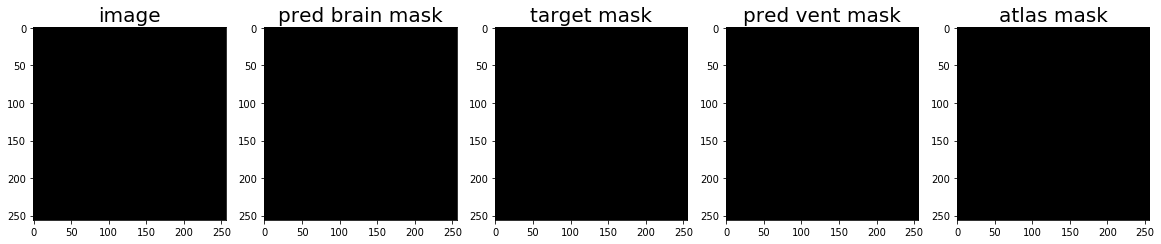

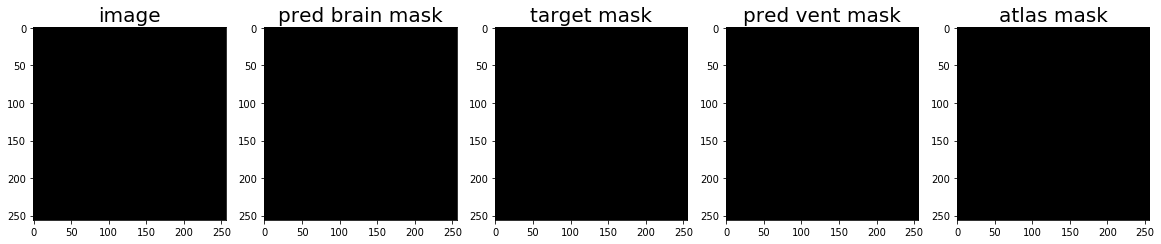

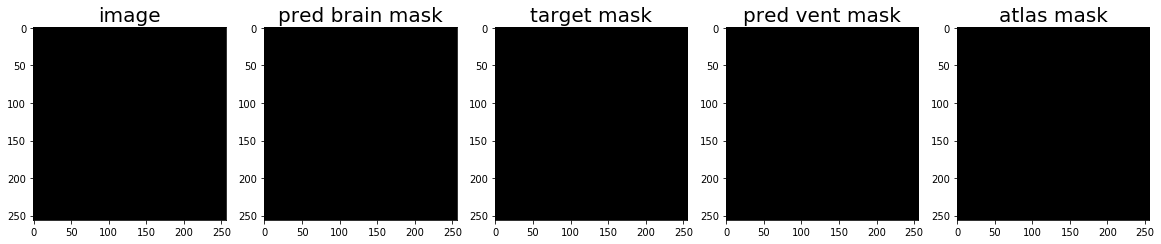

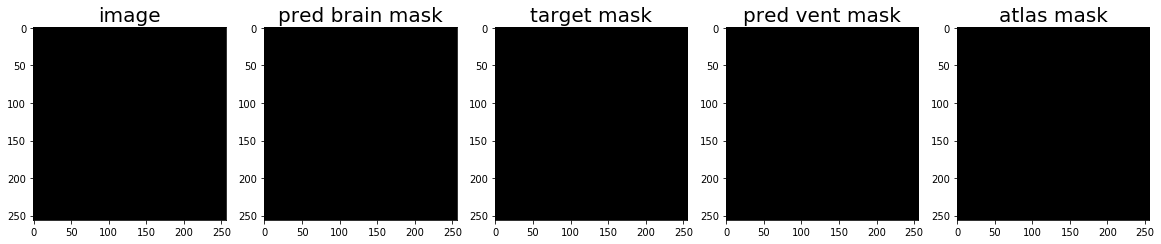

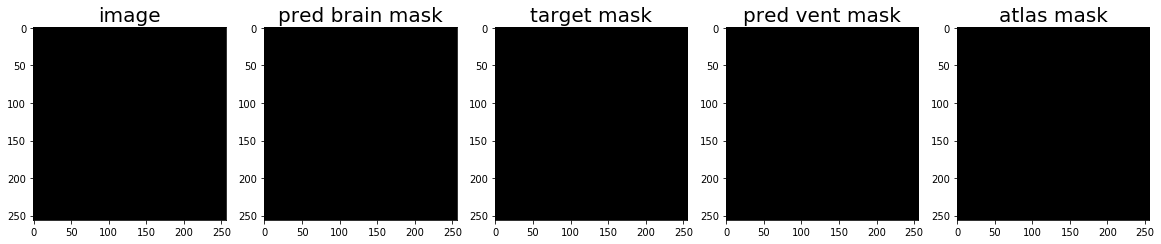

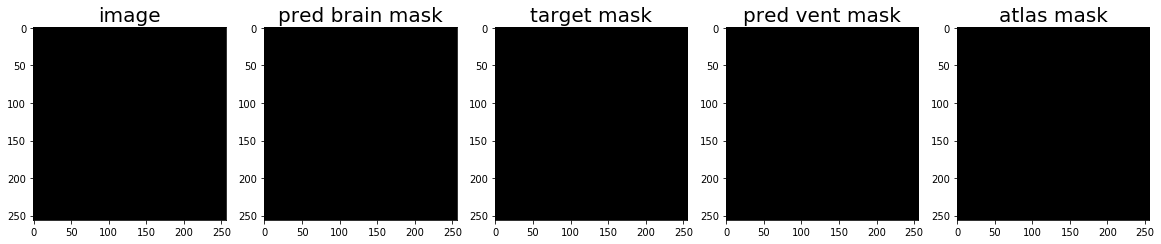

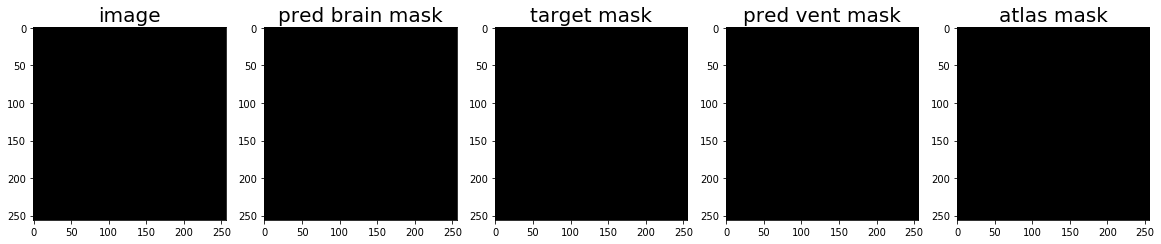

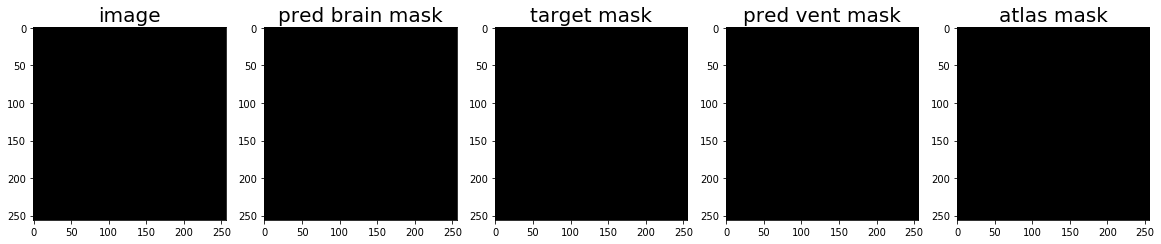

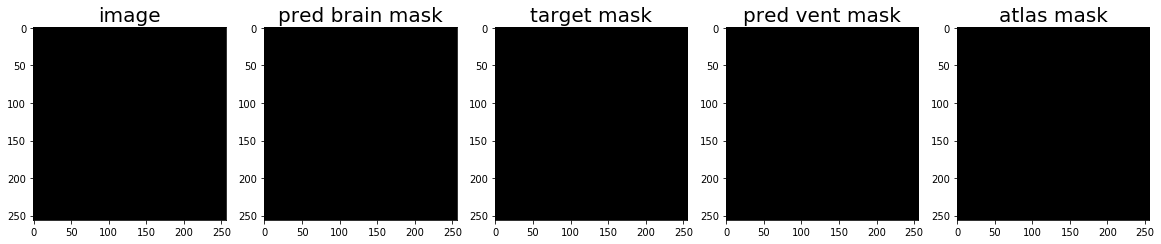

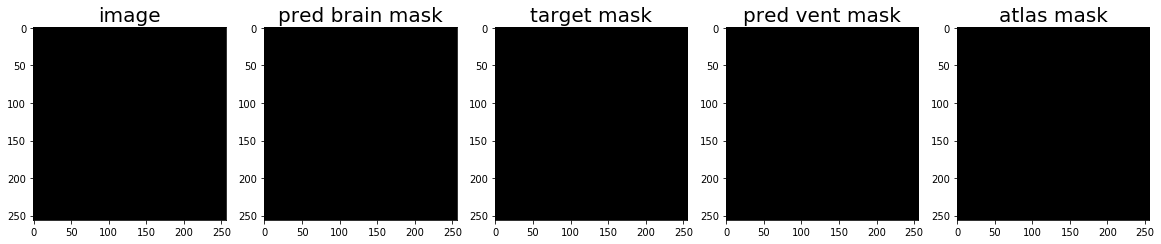

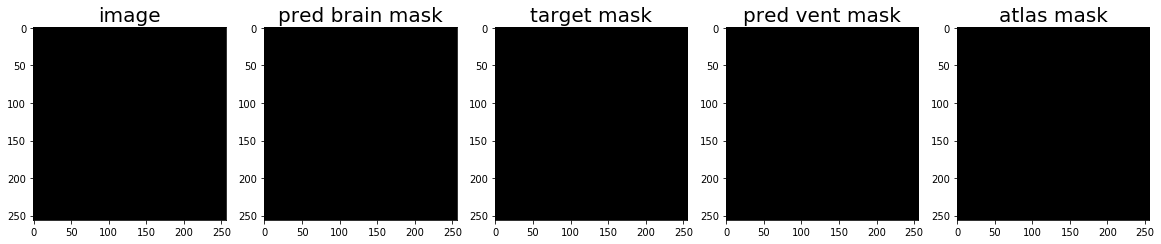

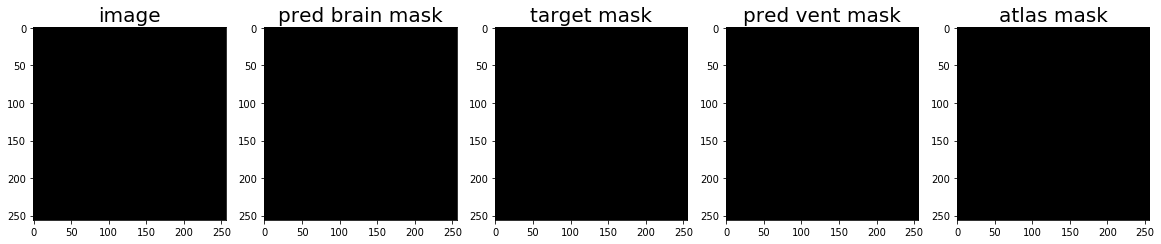

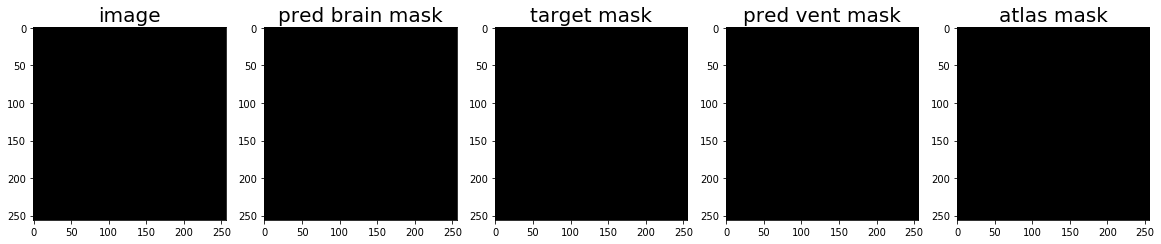

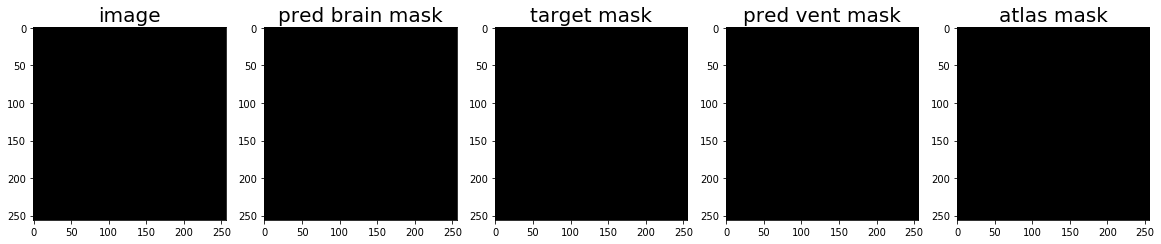

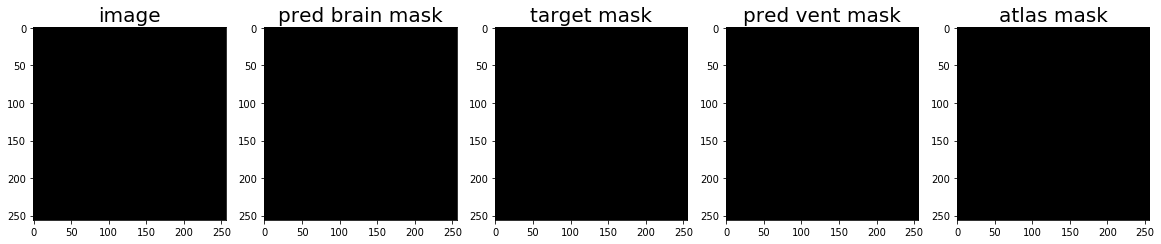

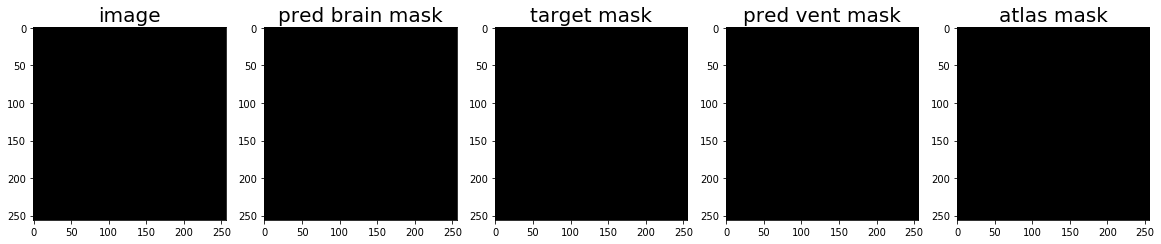

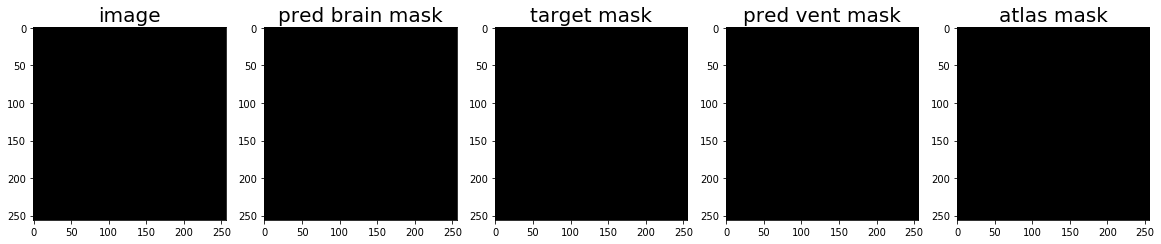

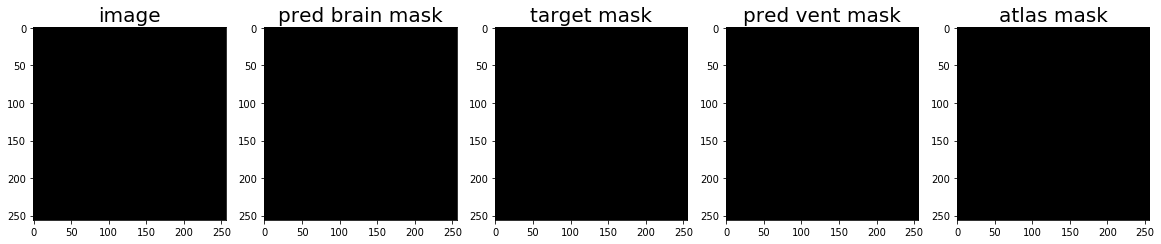

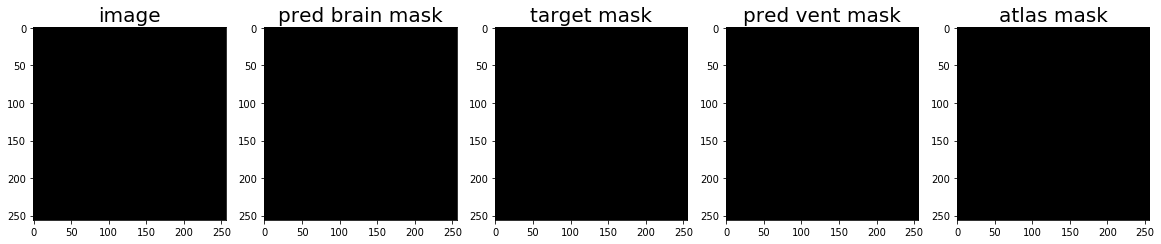

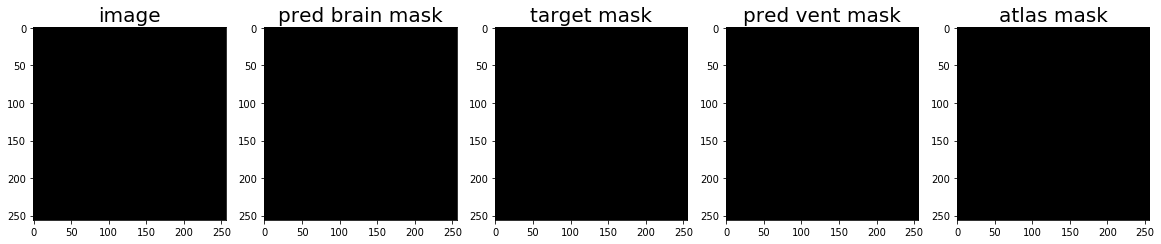

In [20]:
IMG_NUM = 3
image = images[IMG_NUM]
target = target_masks[IMG_NUM]
pred = pred_masks[IMG_NUM]
atlas = atlas_masks[IMG_NUM]
pred_brain = pred_brain_masks[IMG_NUM]

for i in range(image.shape[0]):
    plot_images(image[i], pred_brain[i], target[i], pred[i], atlas[i])

## Overlay View

/usr/local/share/anaconda3/envs/fastai/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


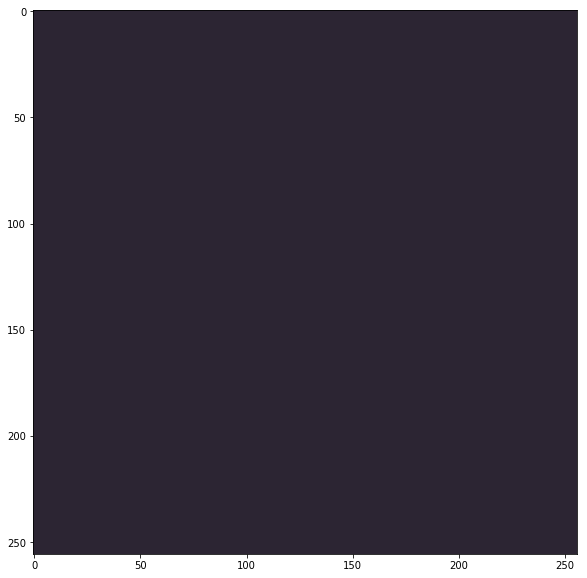

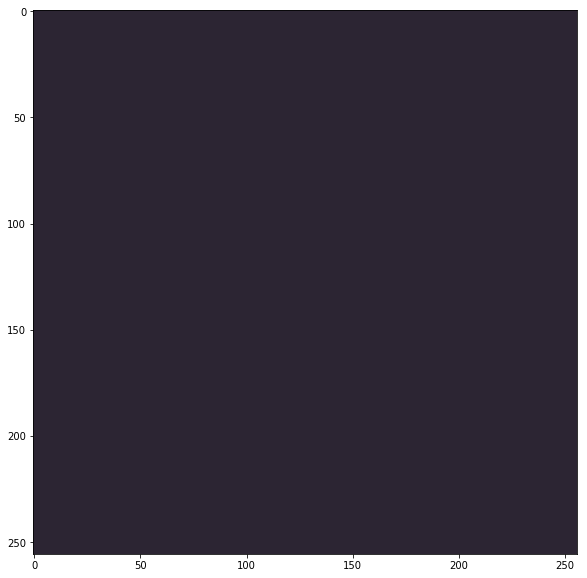

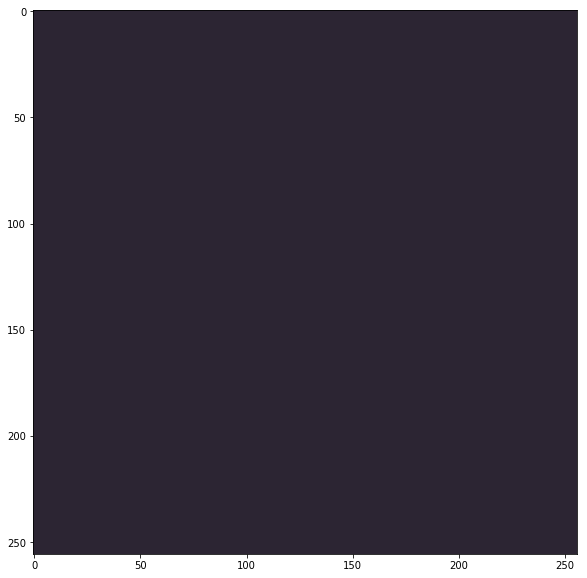

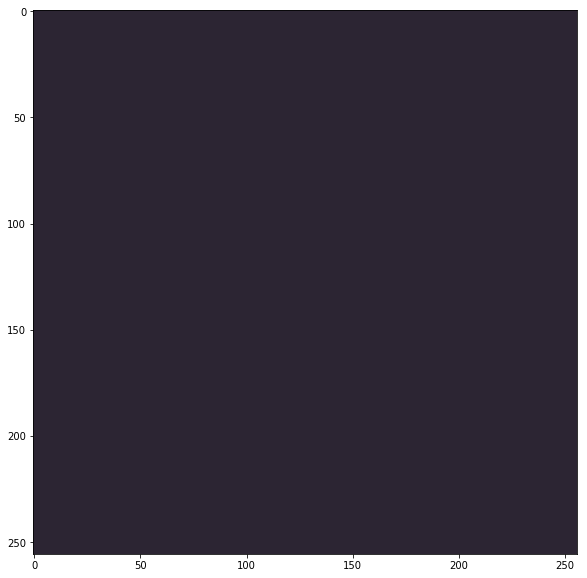

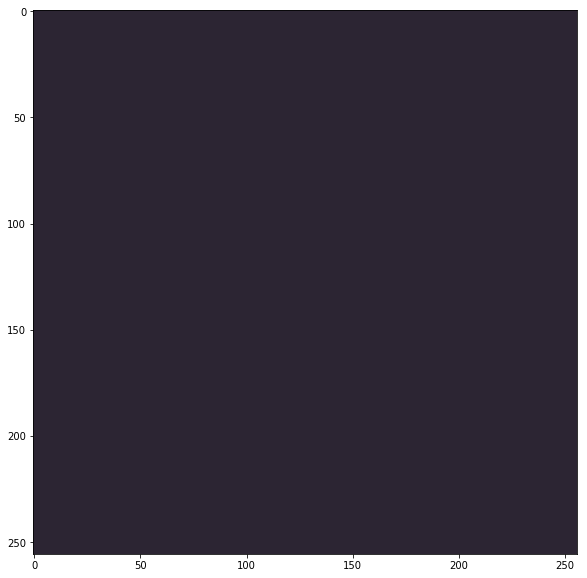

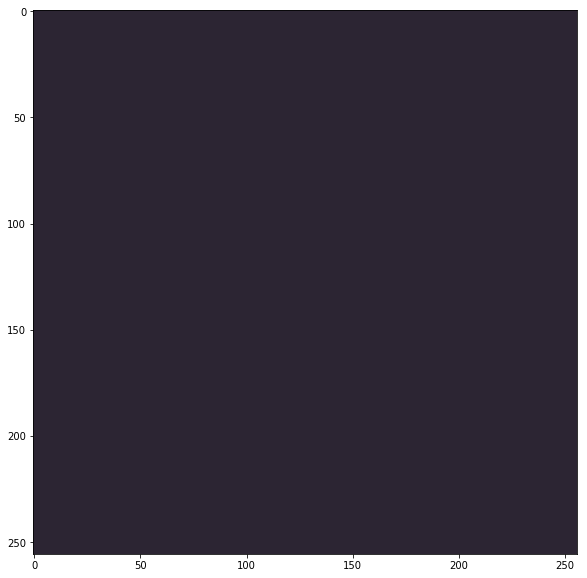

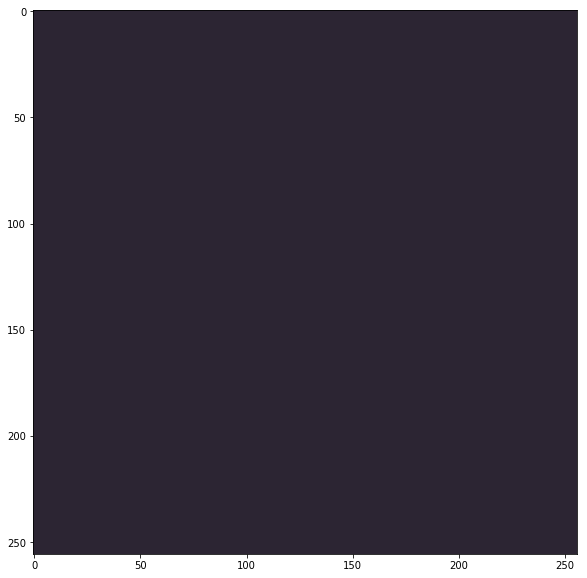

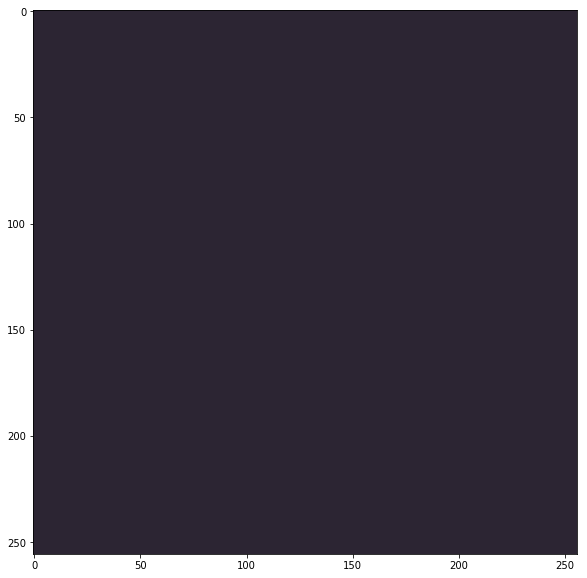

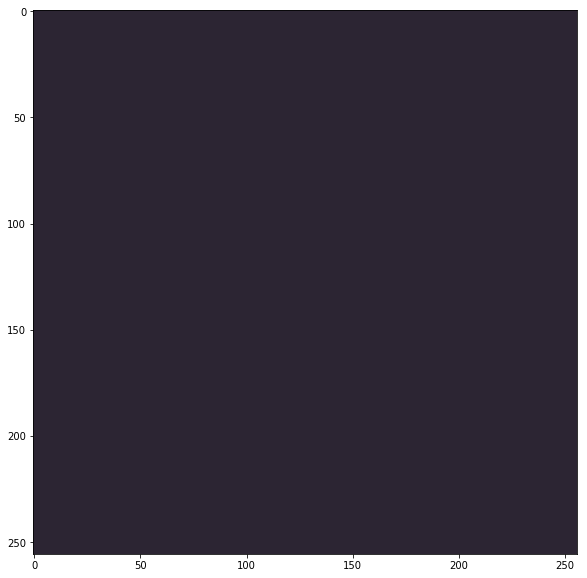

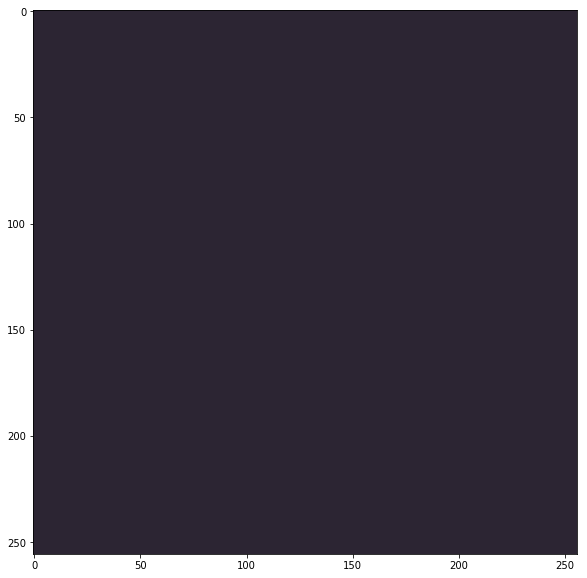

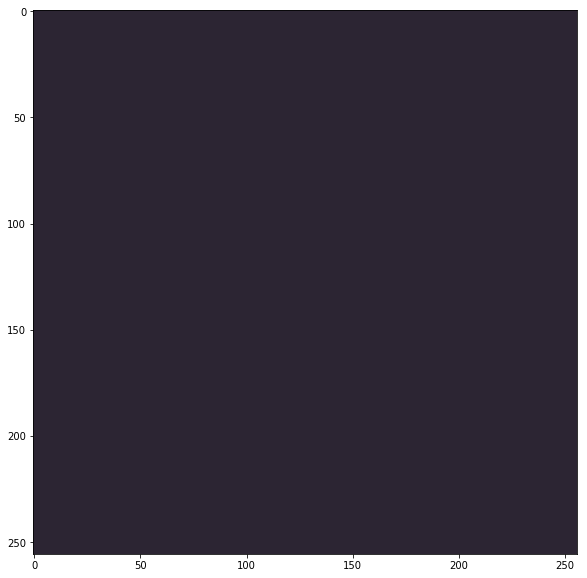

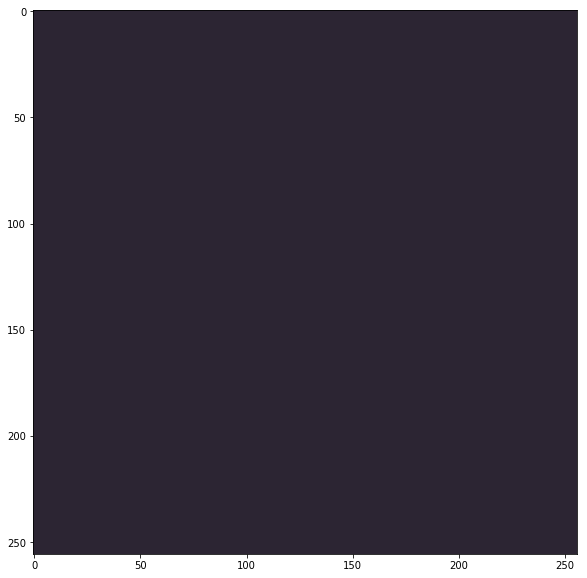

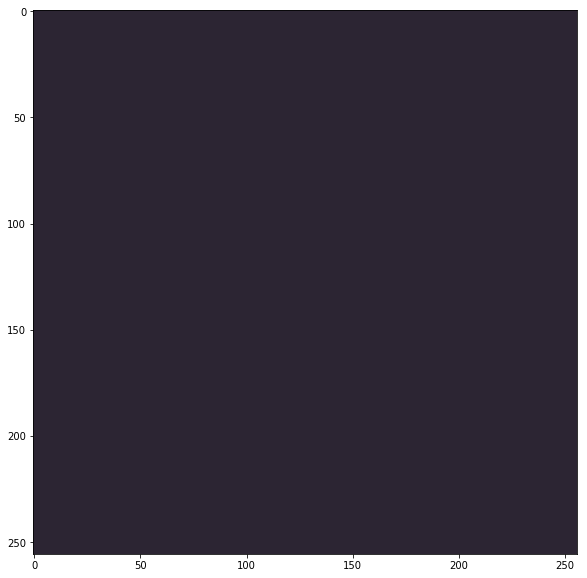

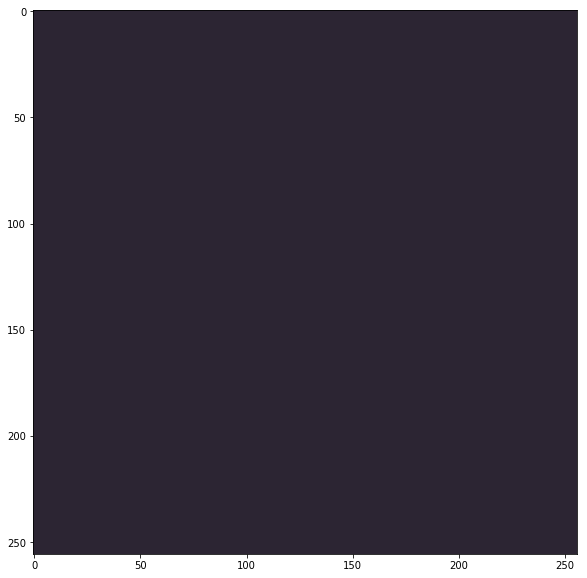

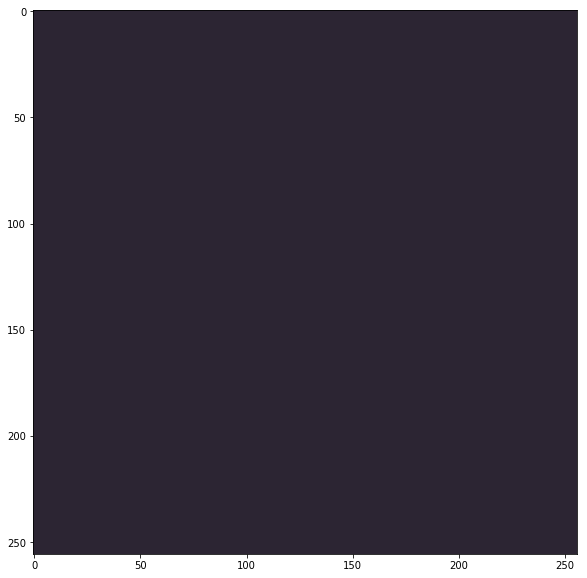

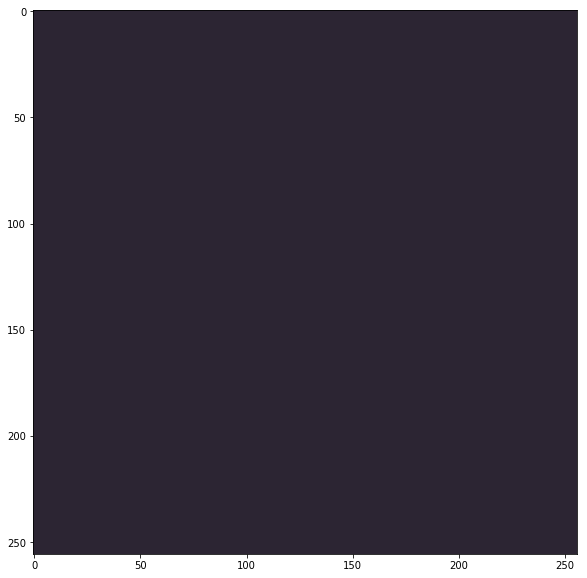

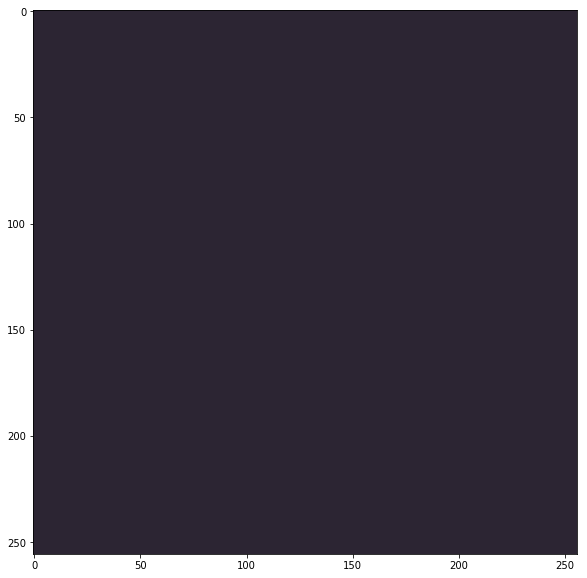

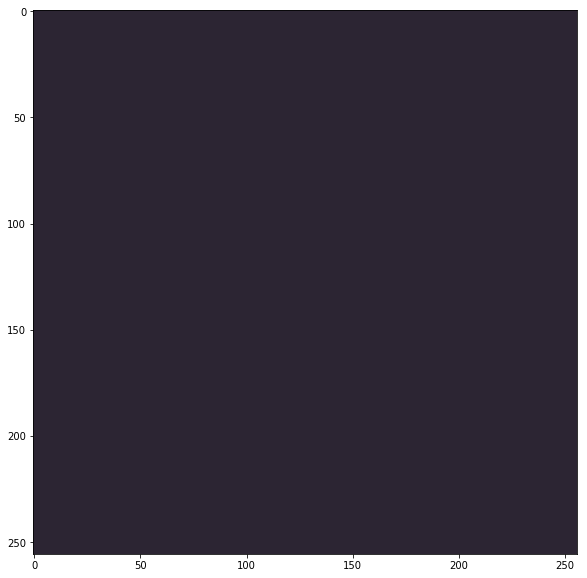

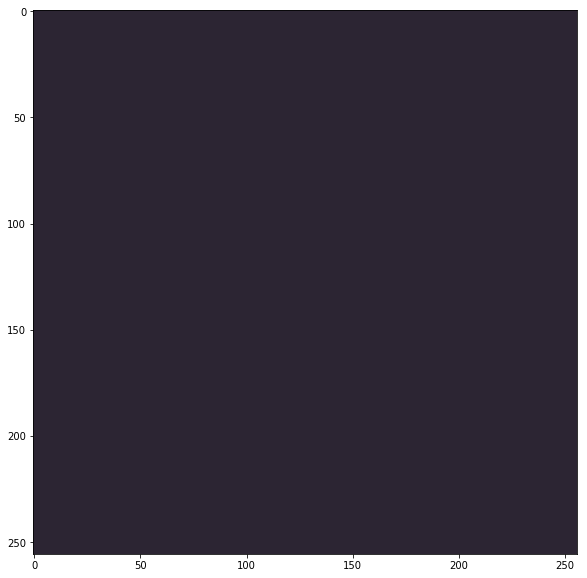

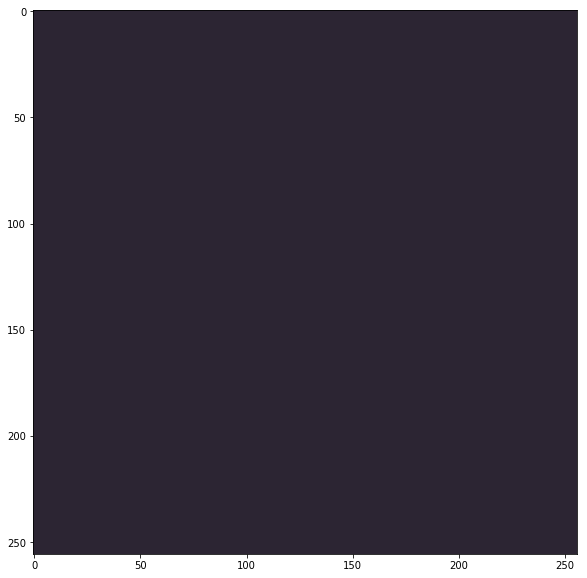

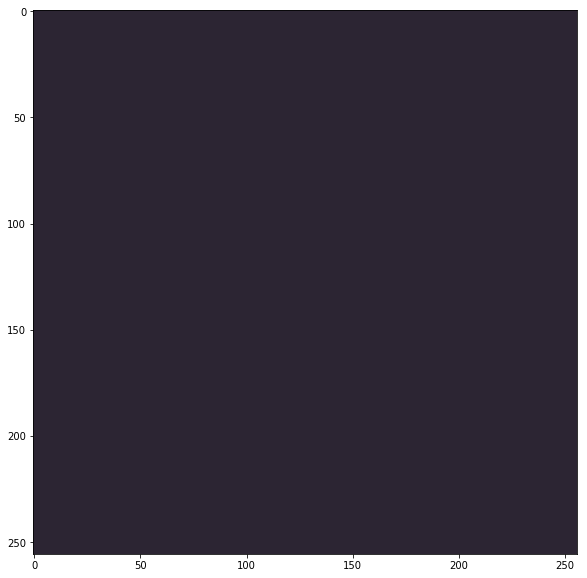

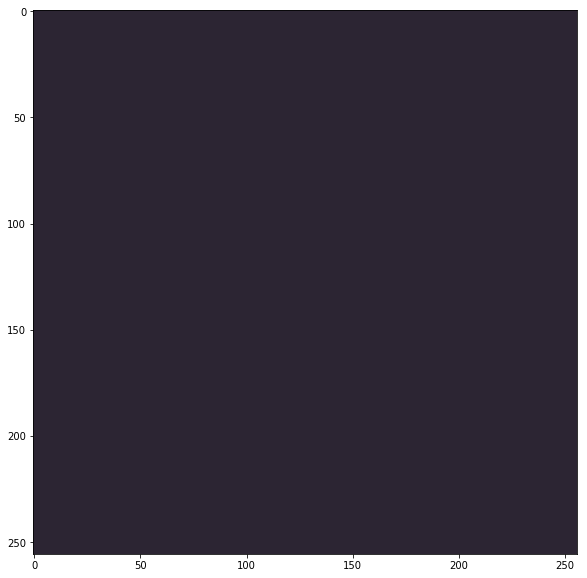

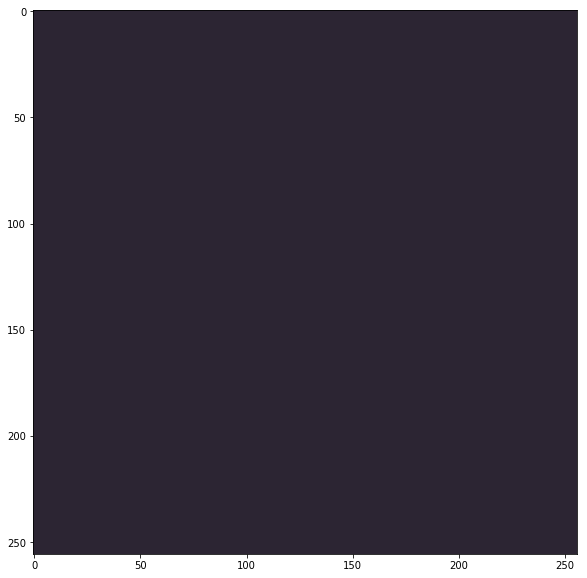

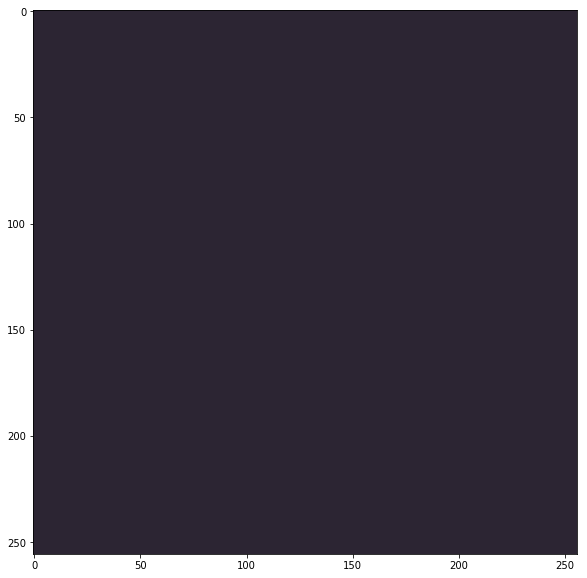

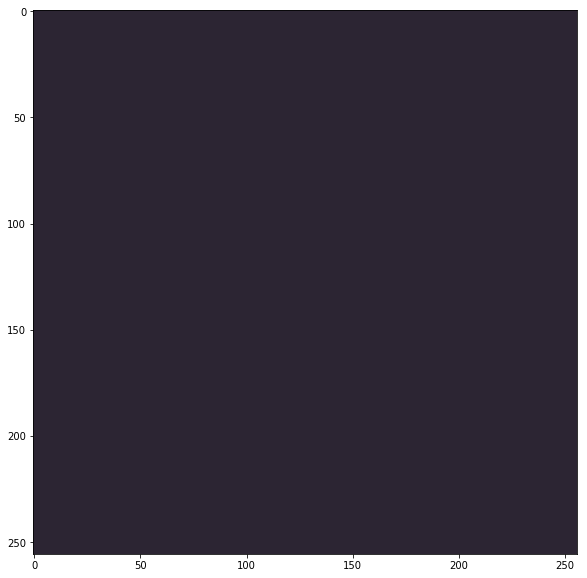

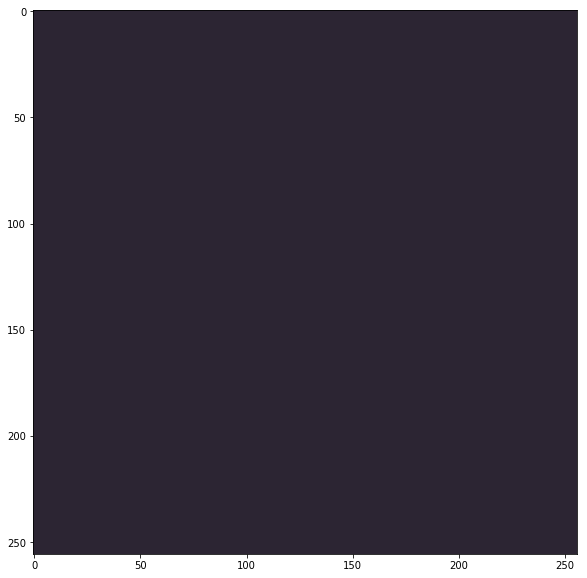

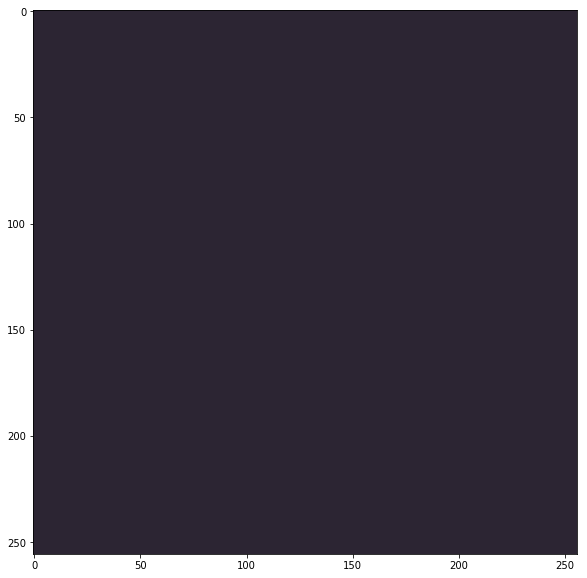

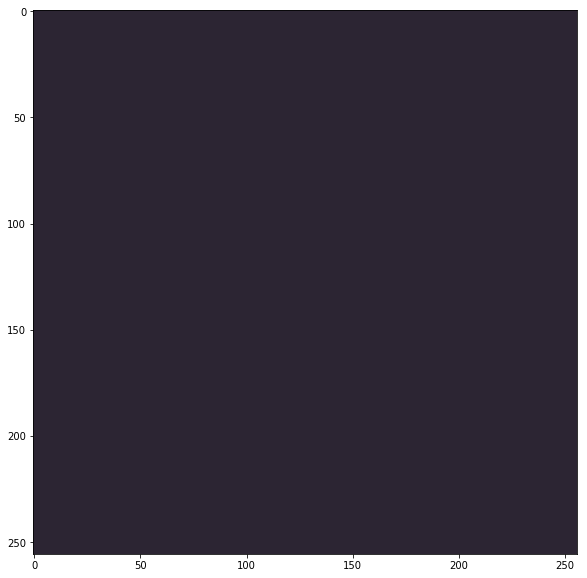

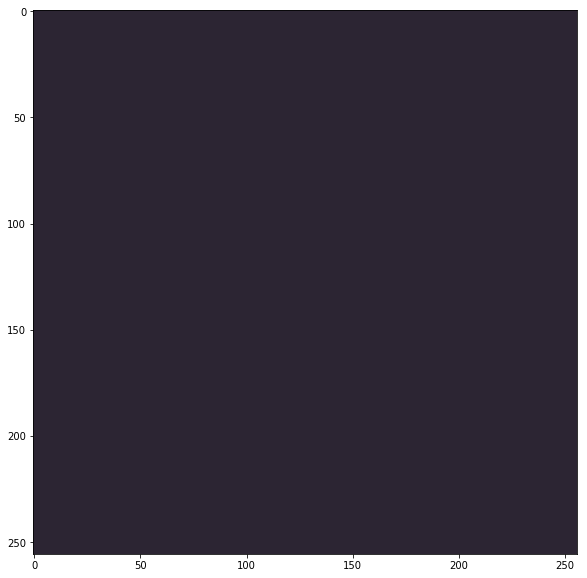

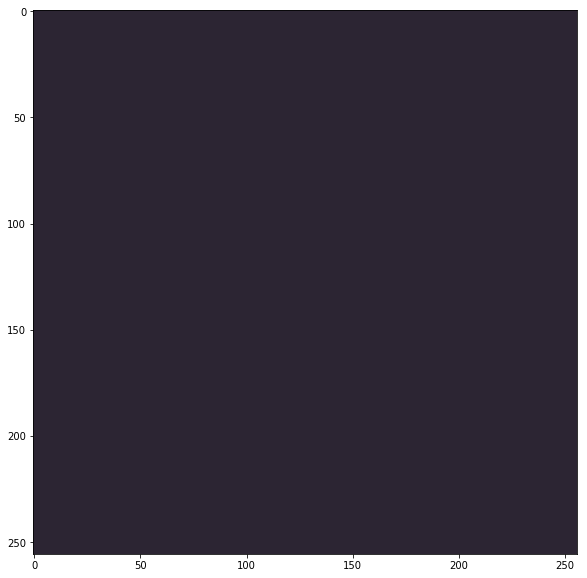

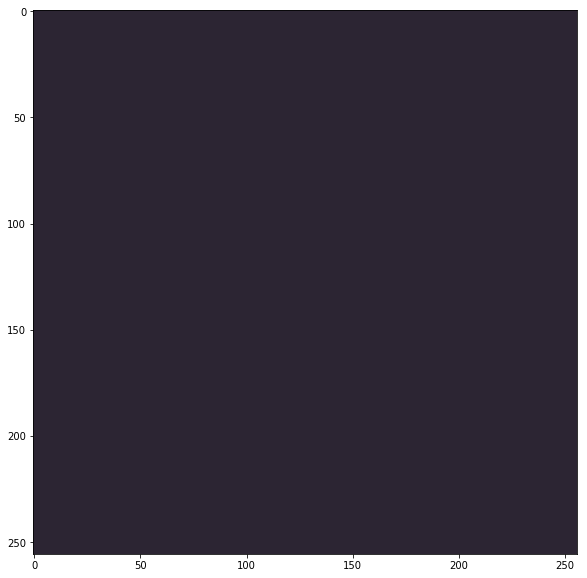

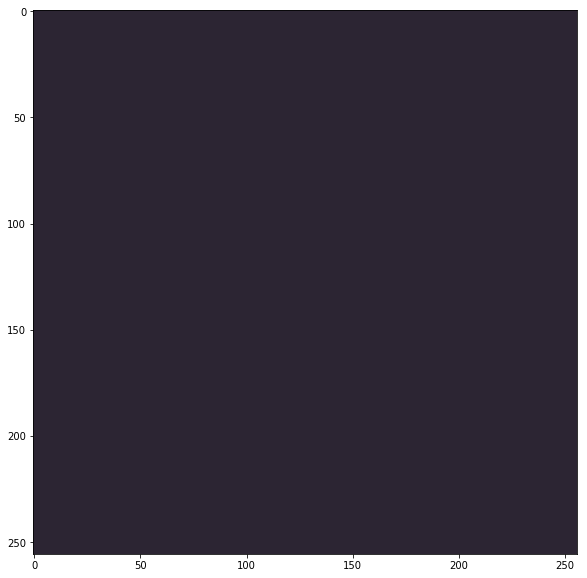

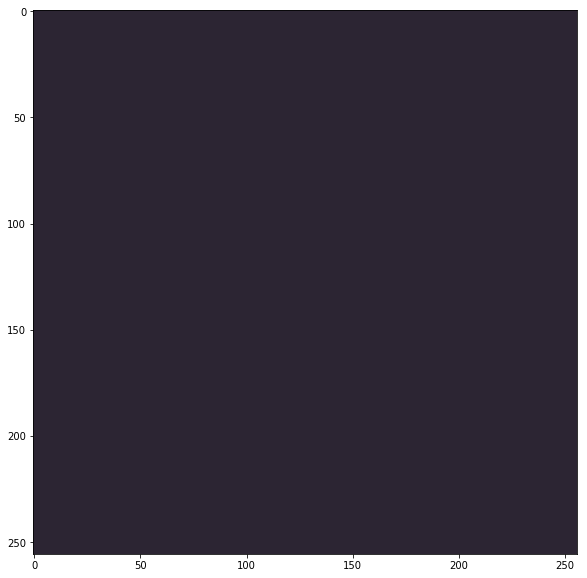

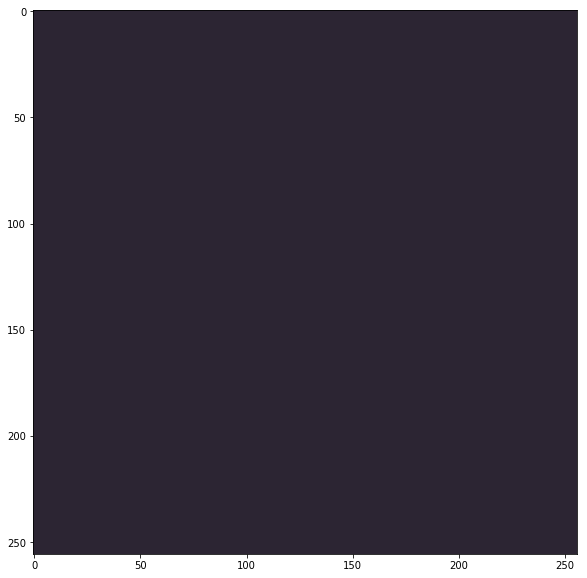

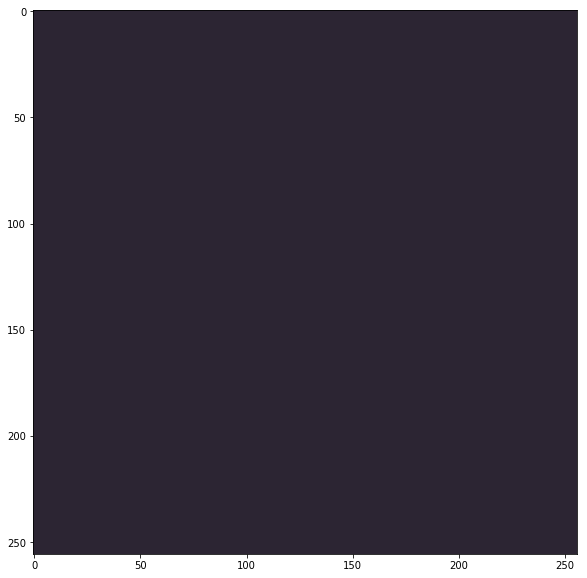

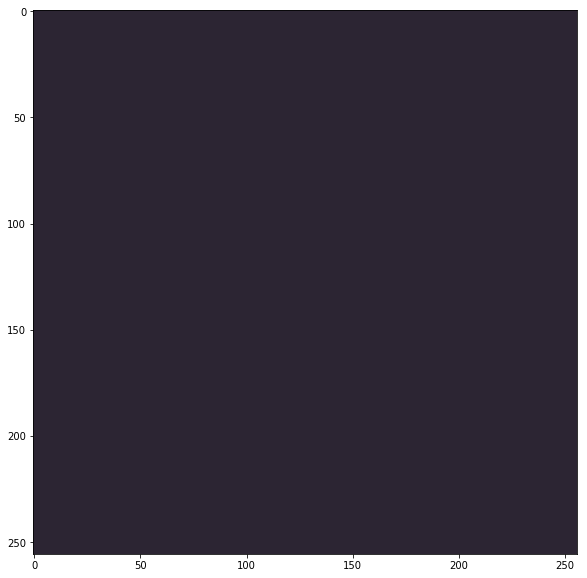

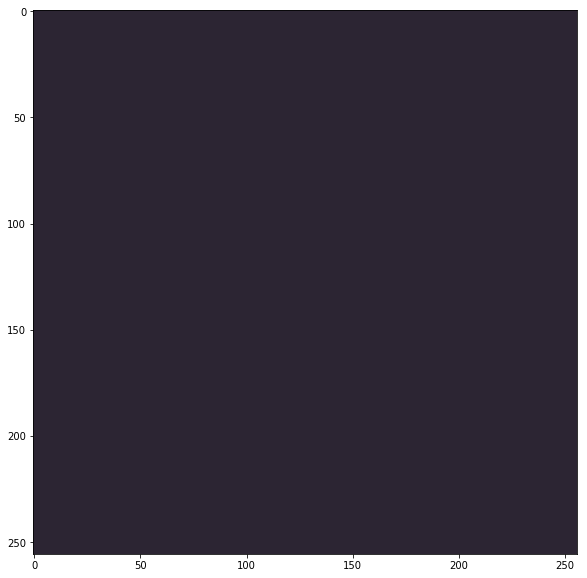

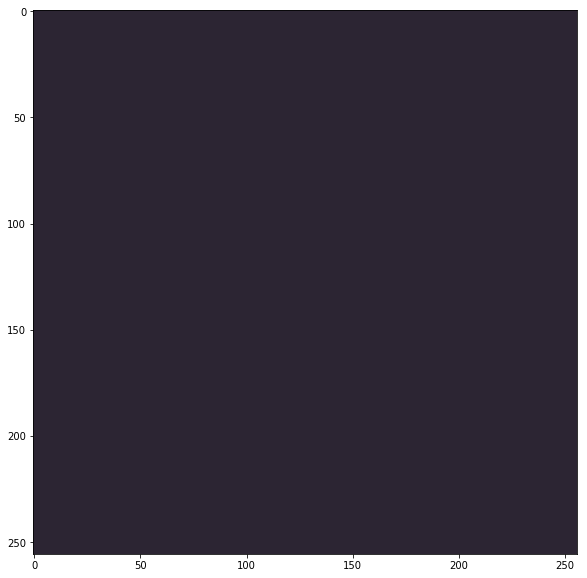

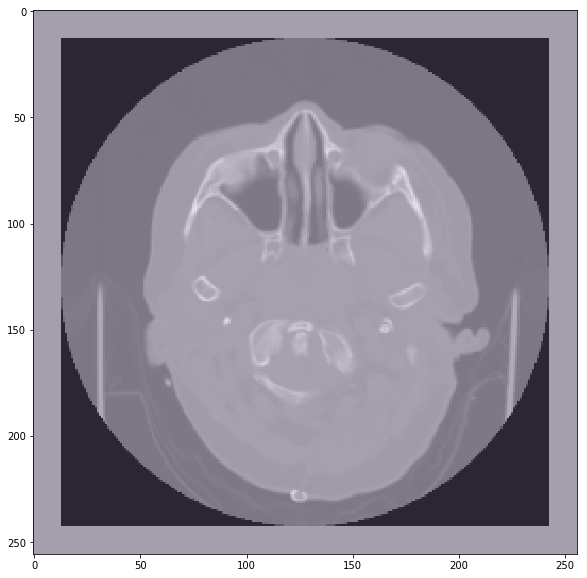

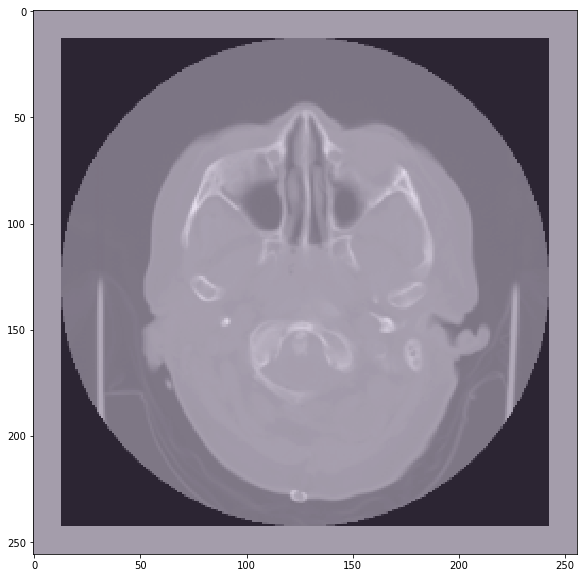

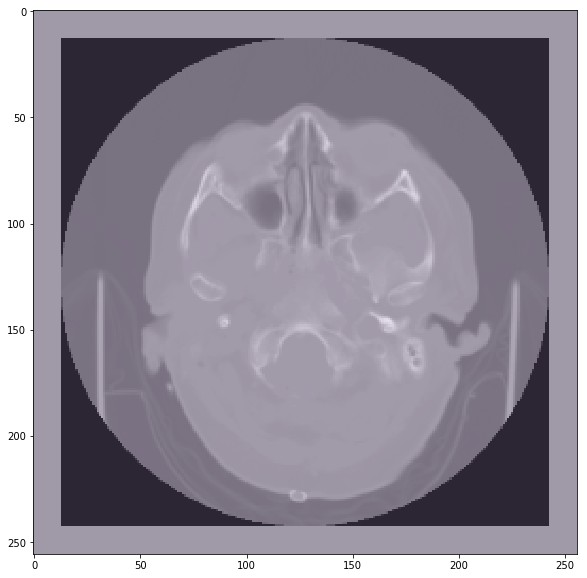

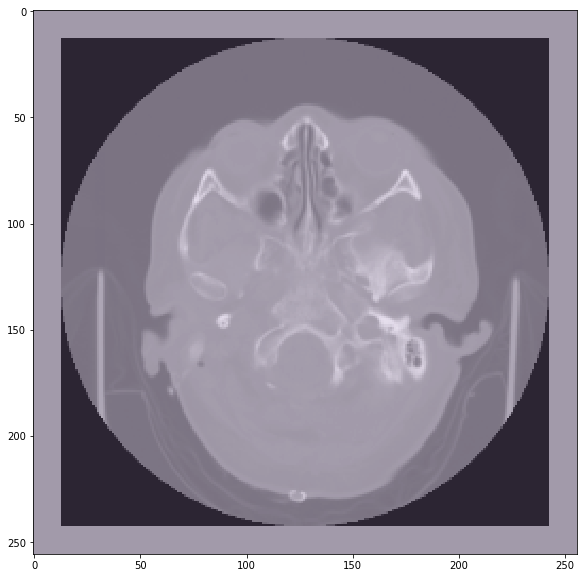

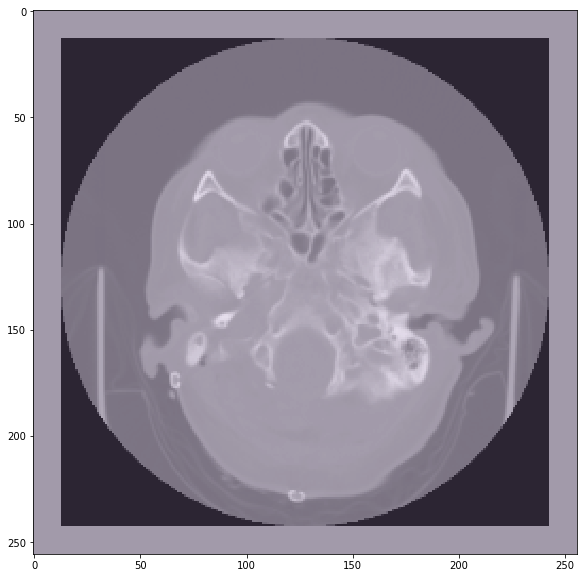

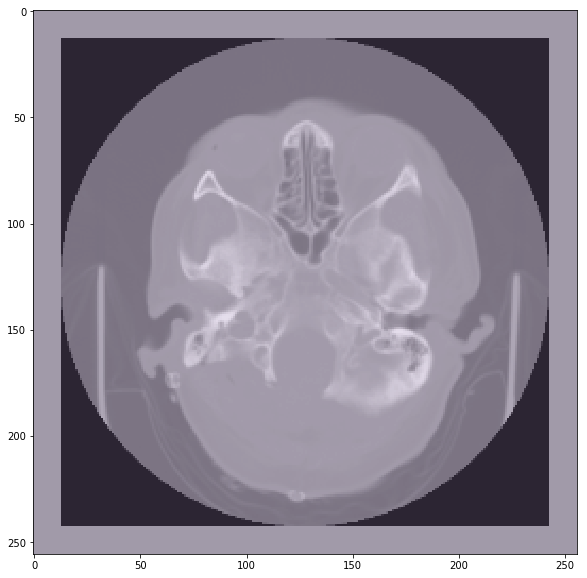

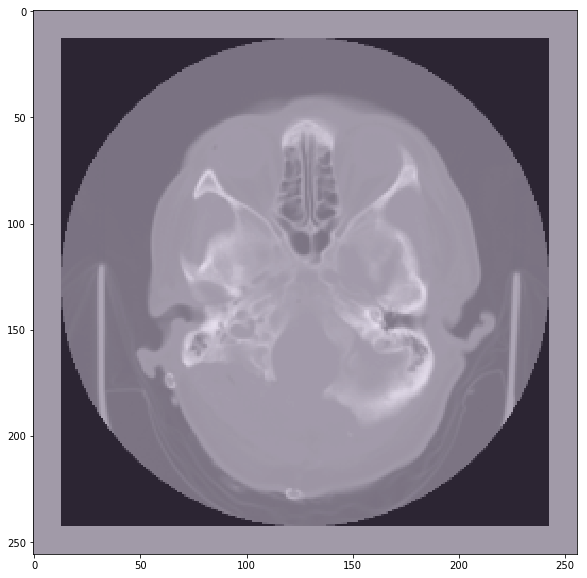

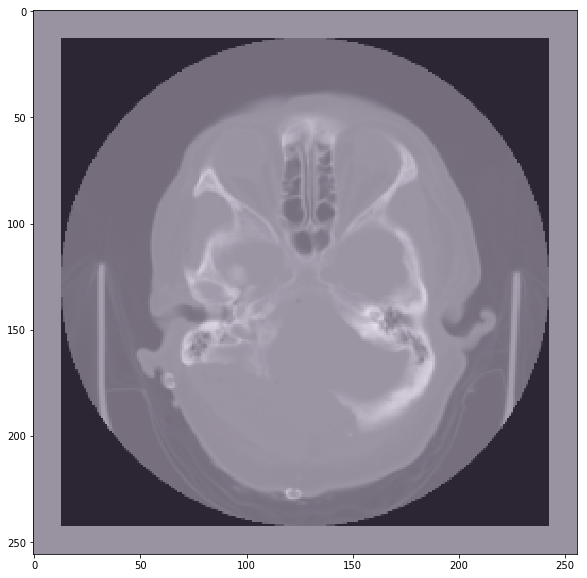

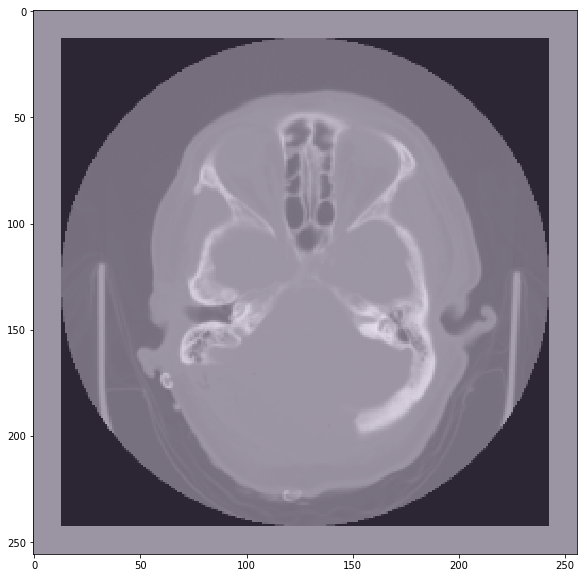

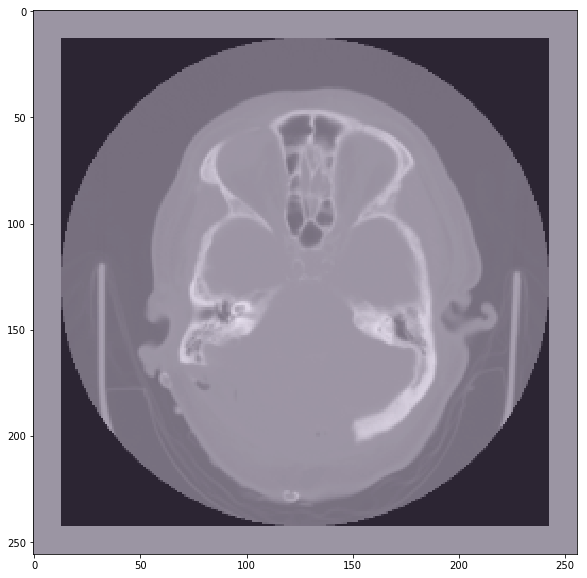

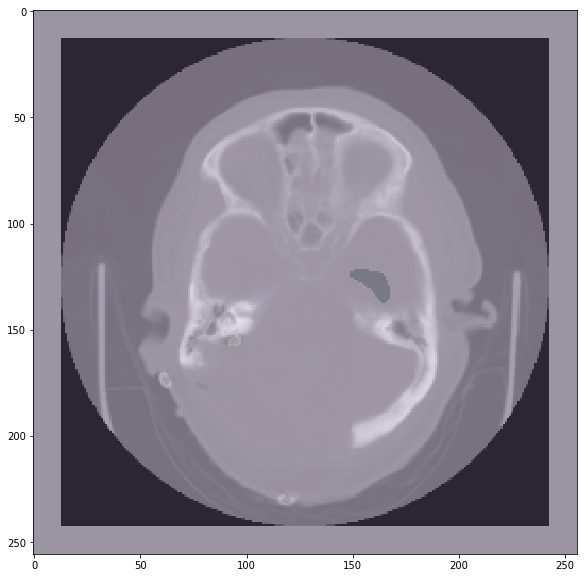

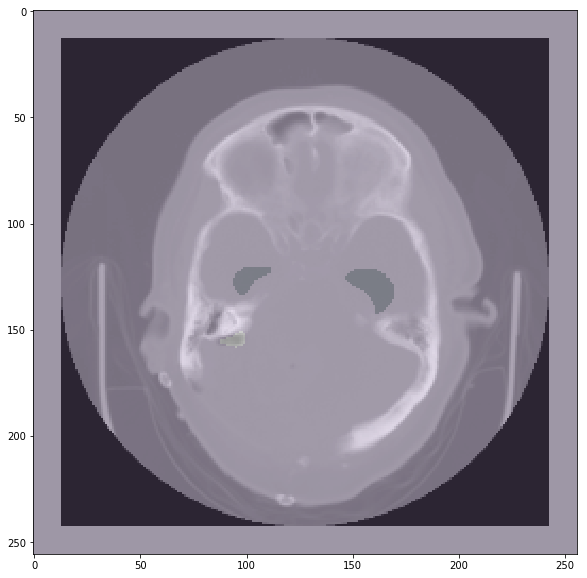

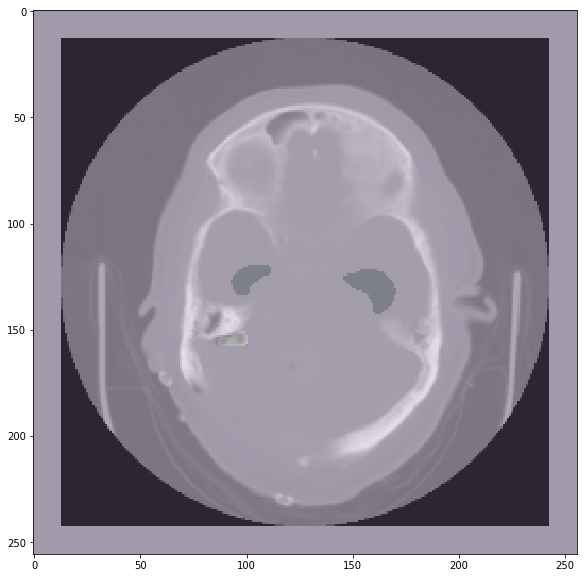

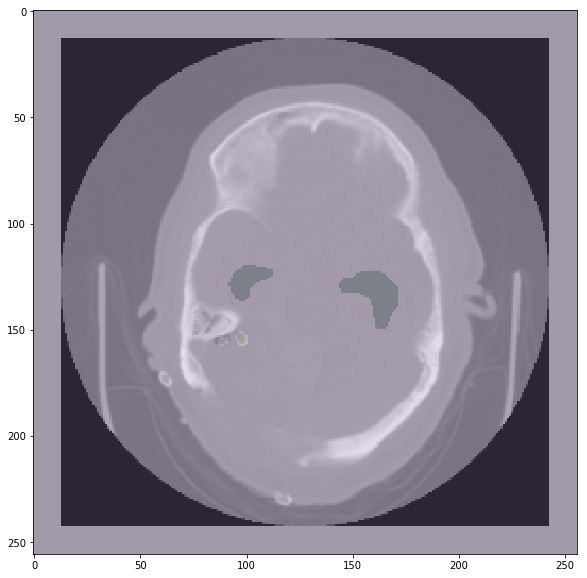

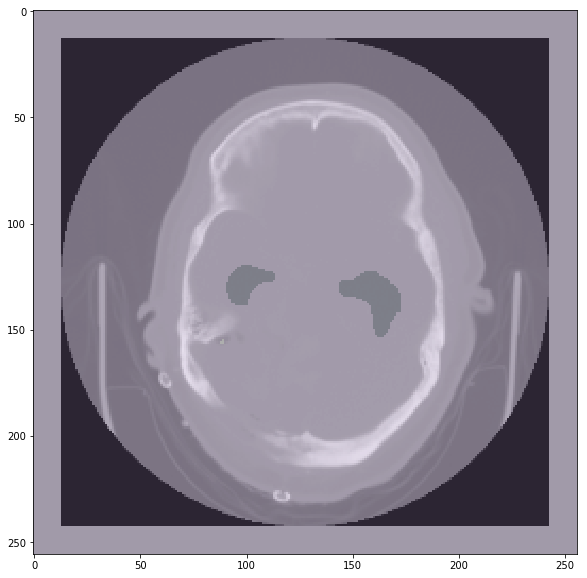

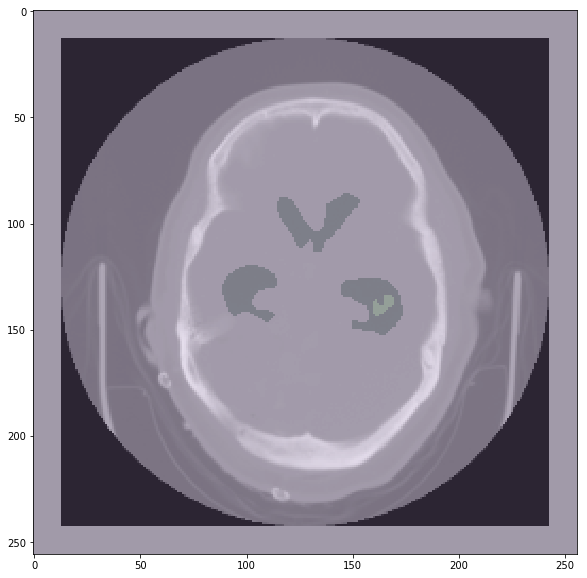

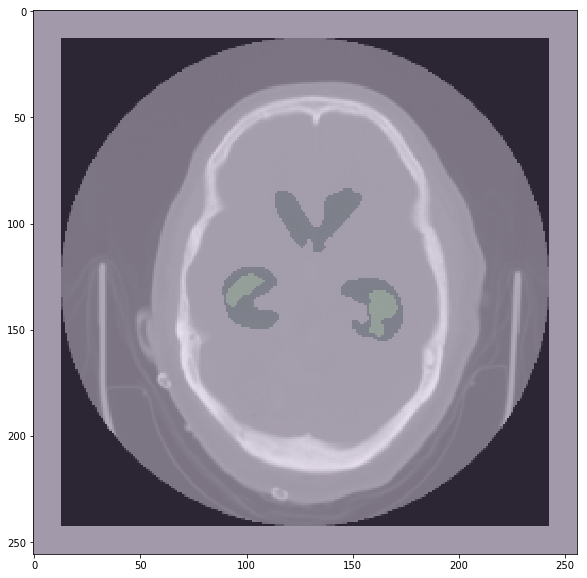

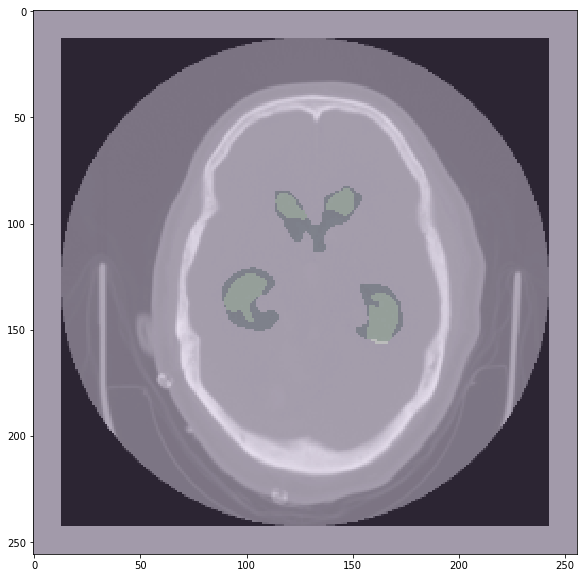

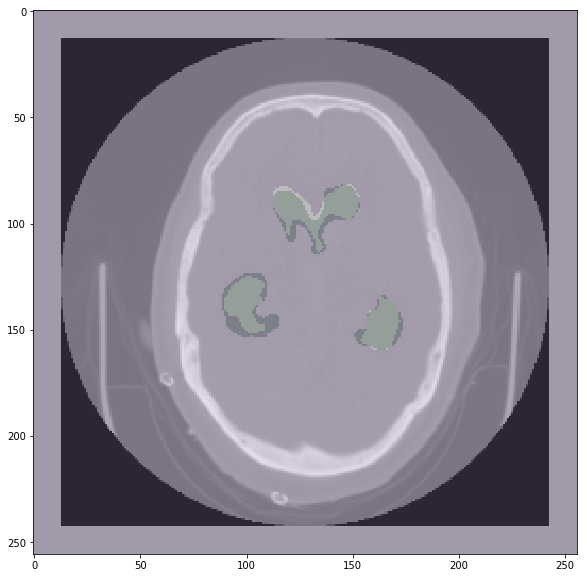

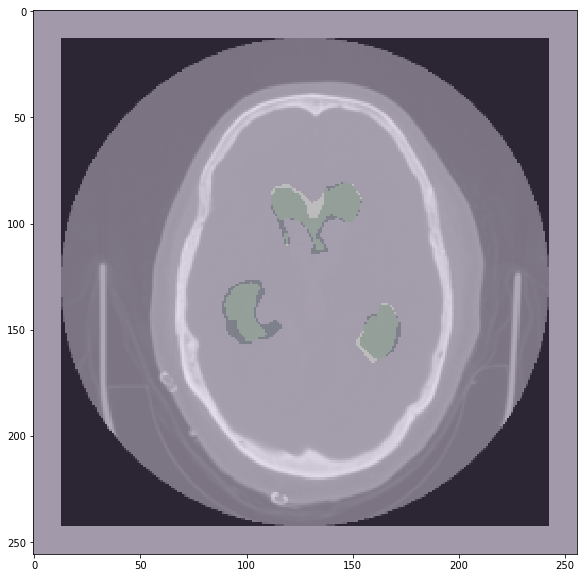

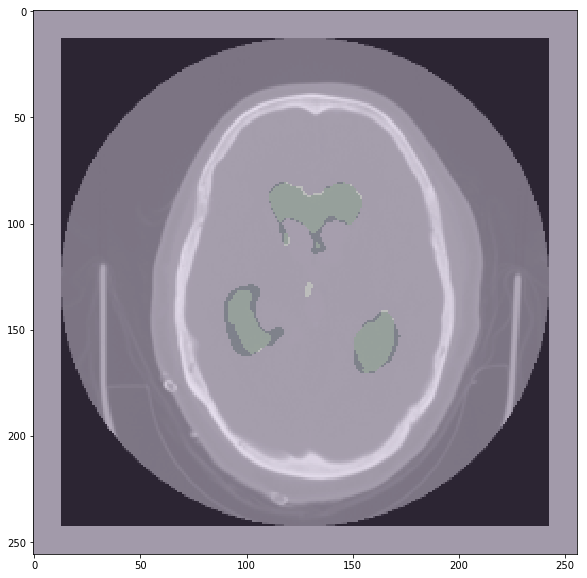

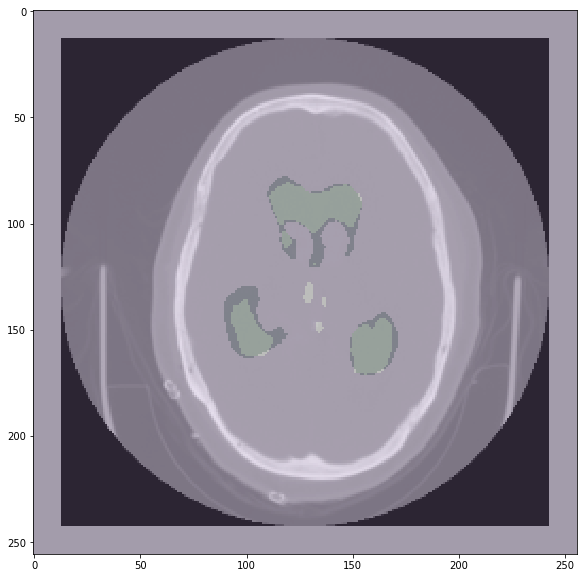

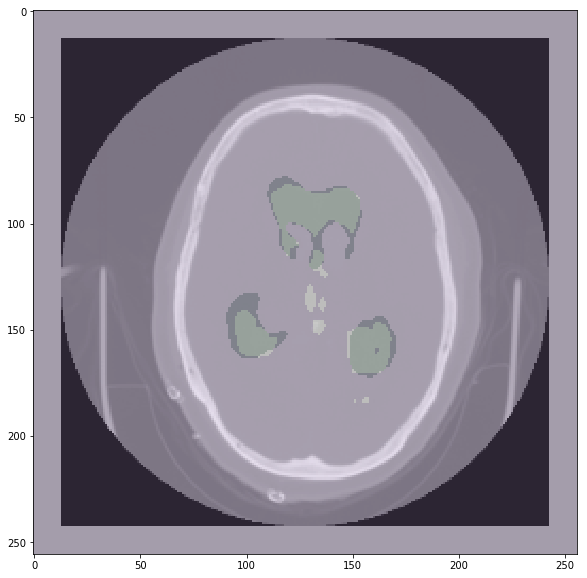

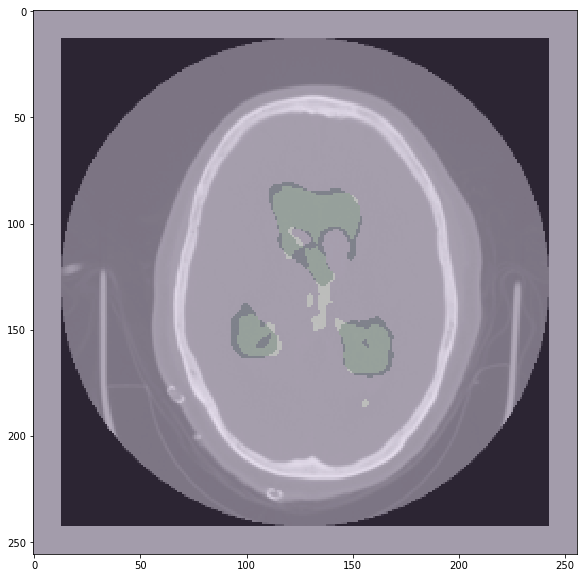

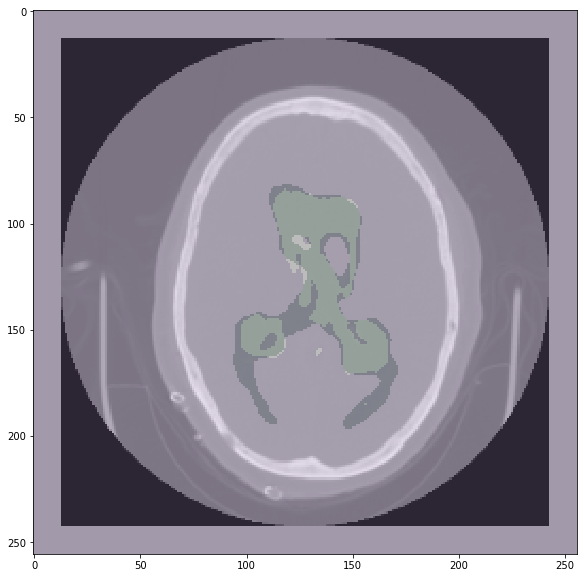

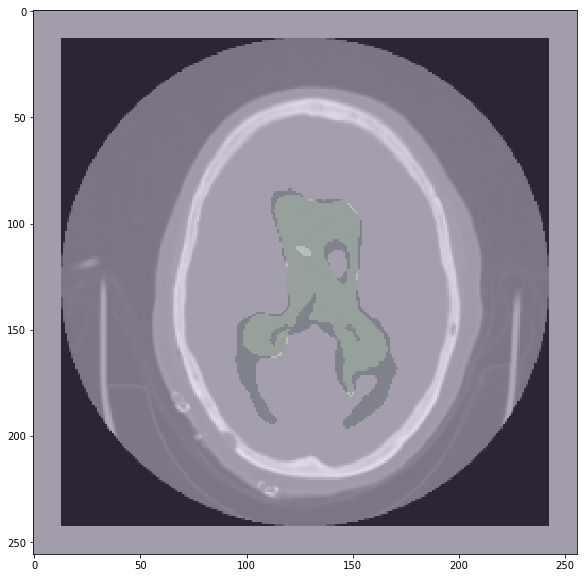

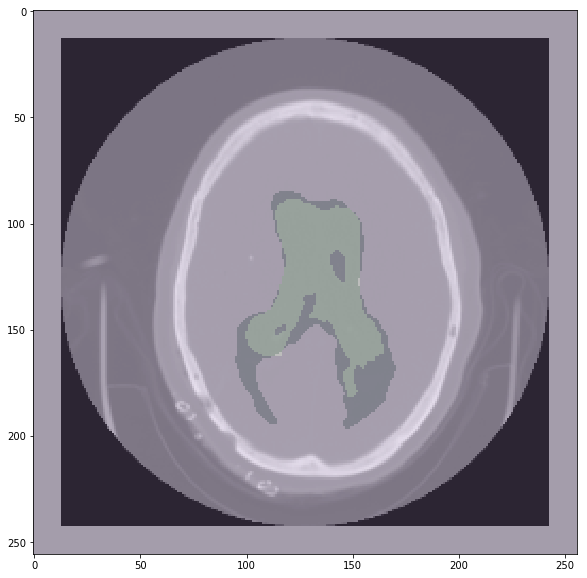

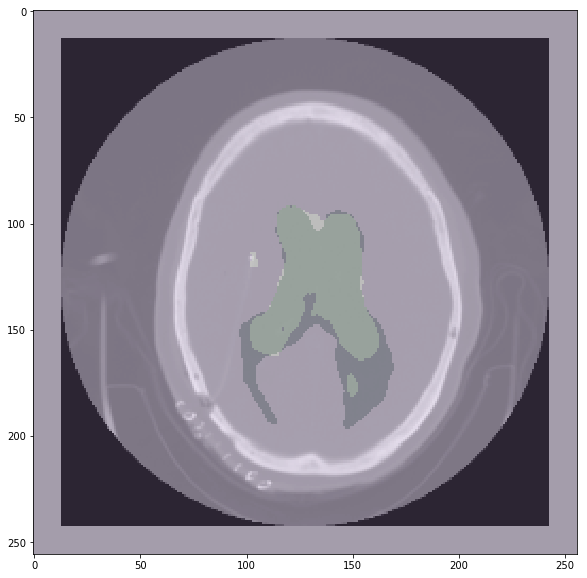

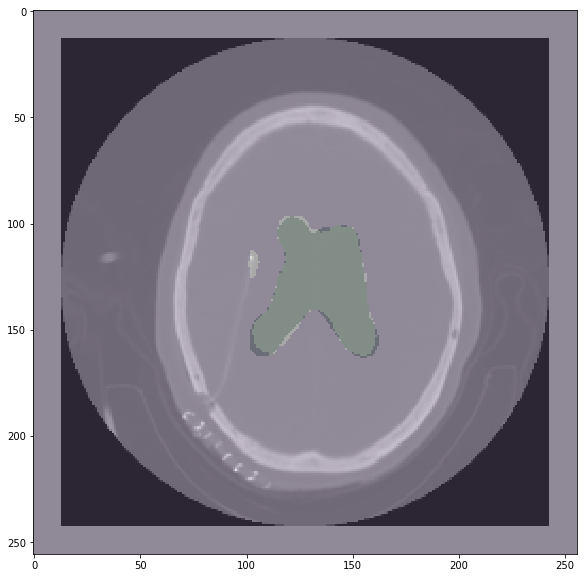

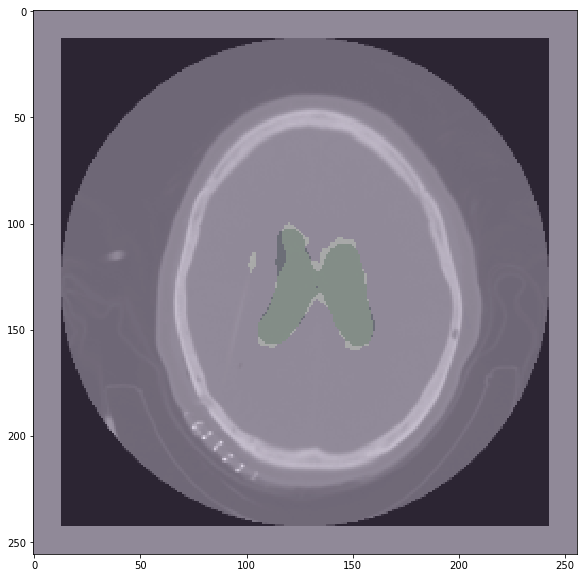

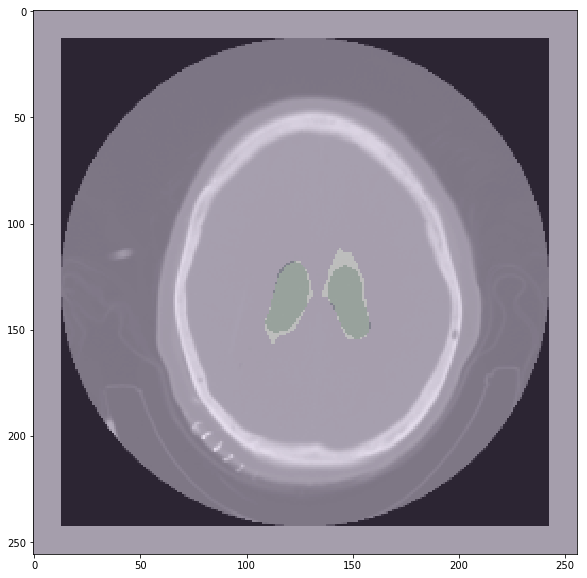

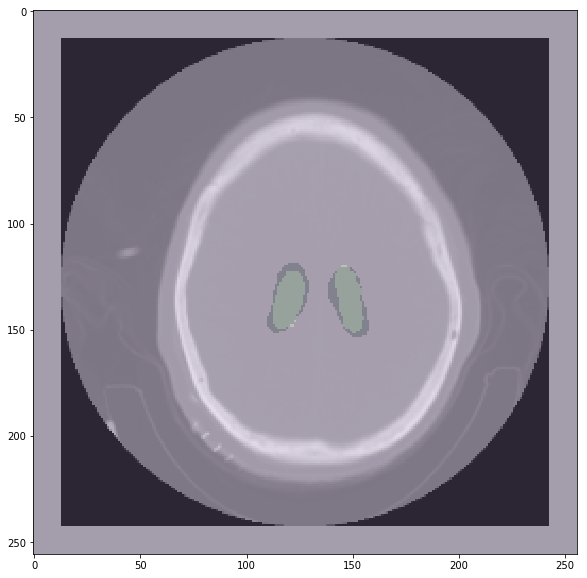

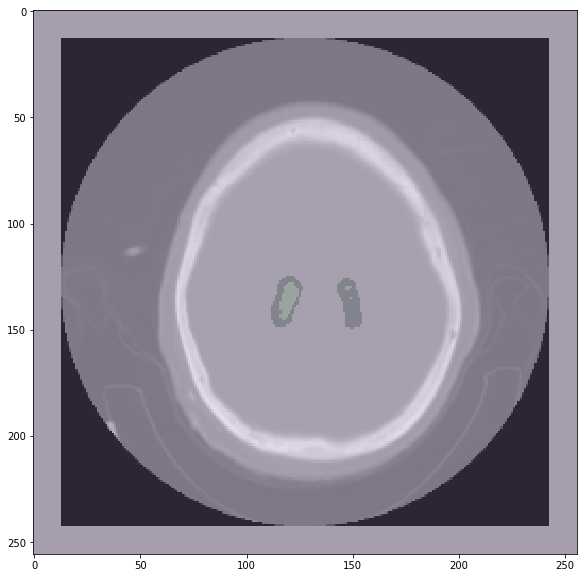

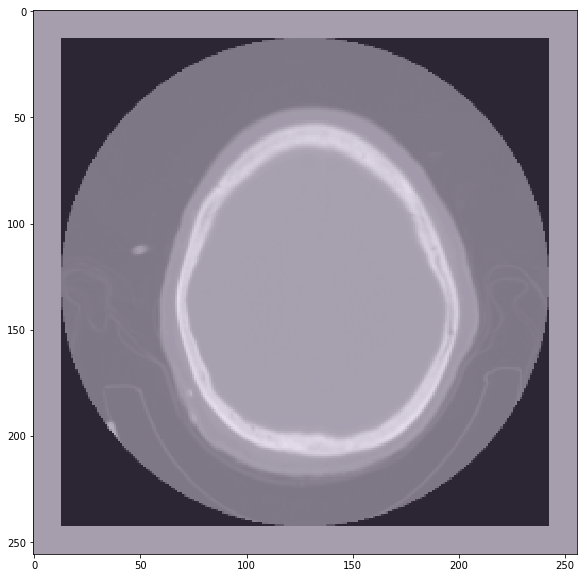

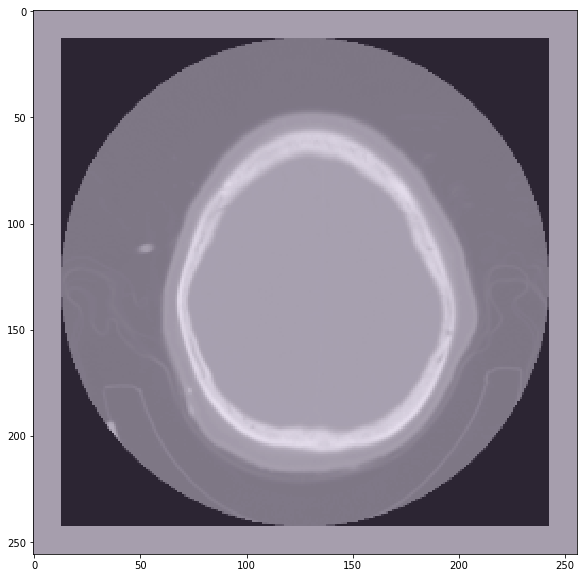

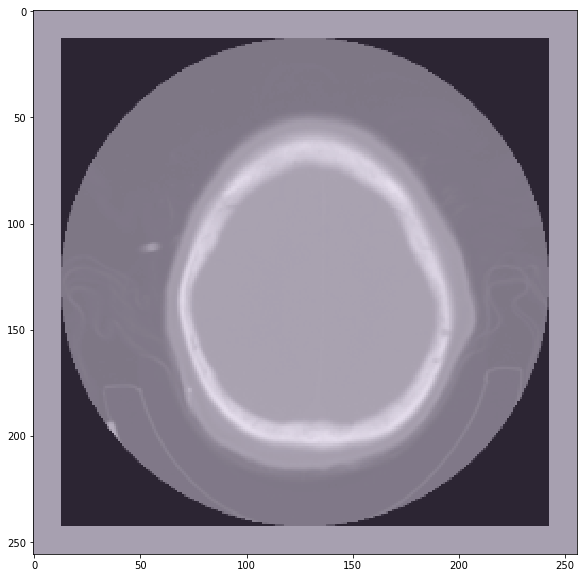

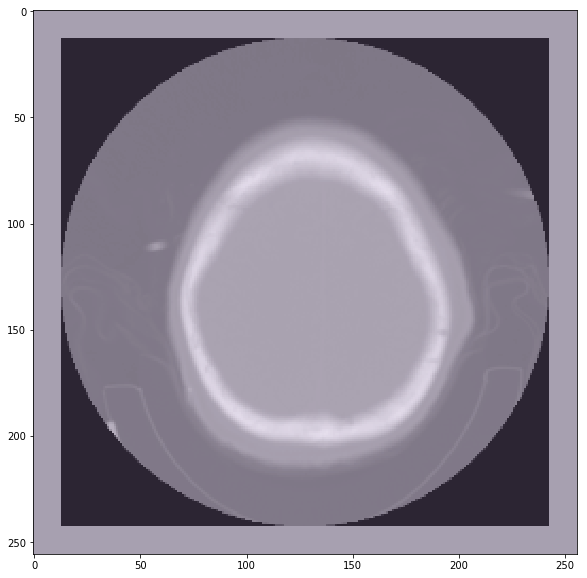

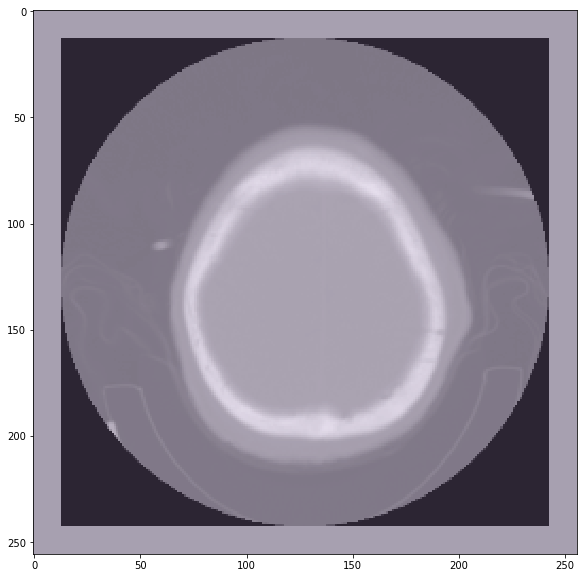

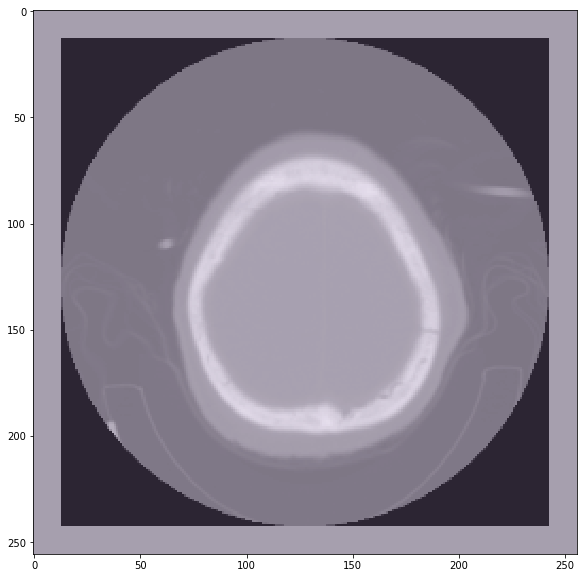

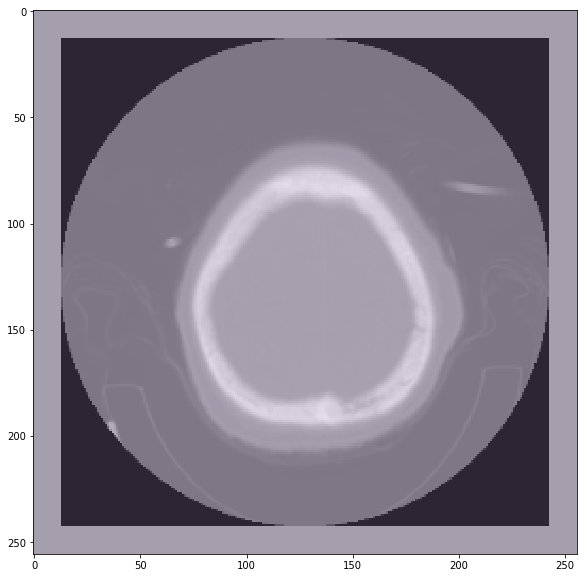

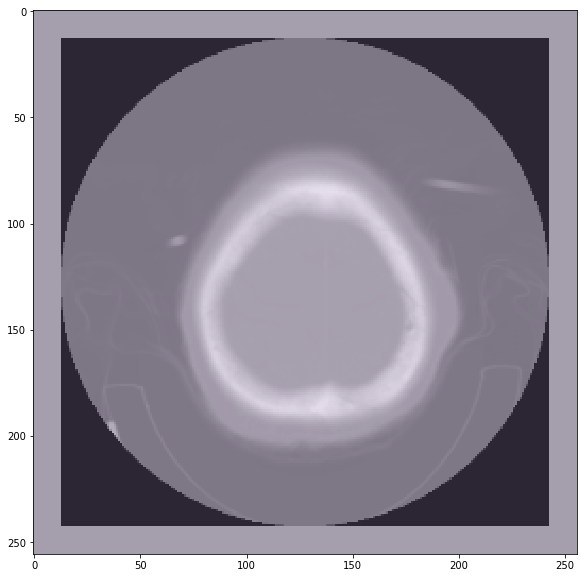

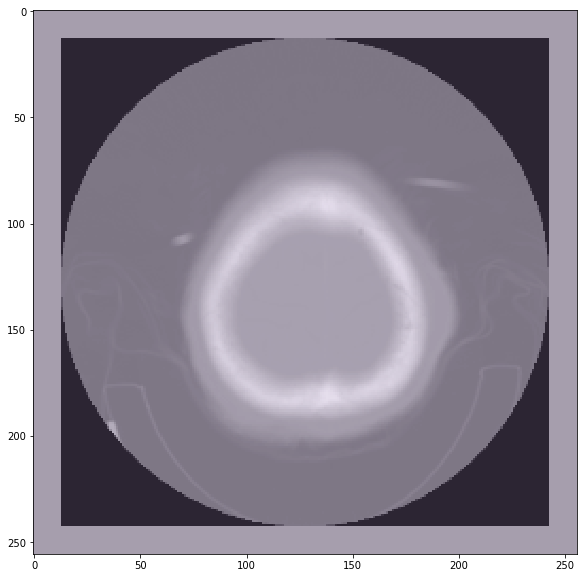

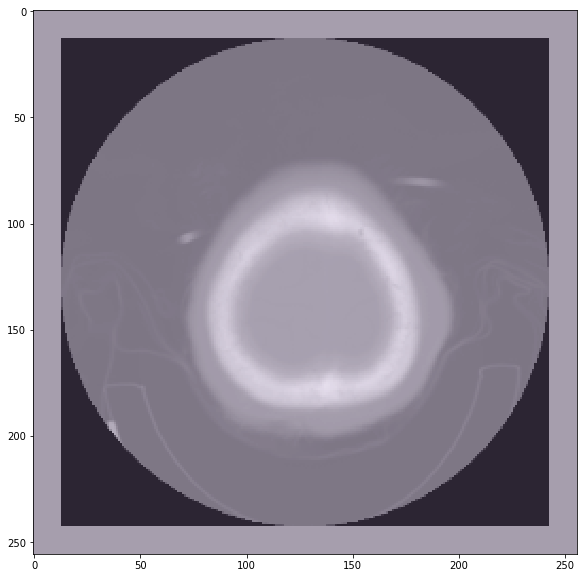

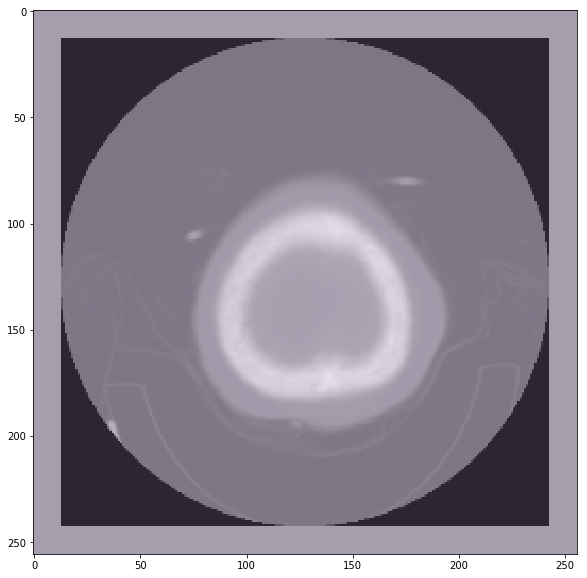

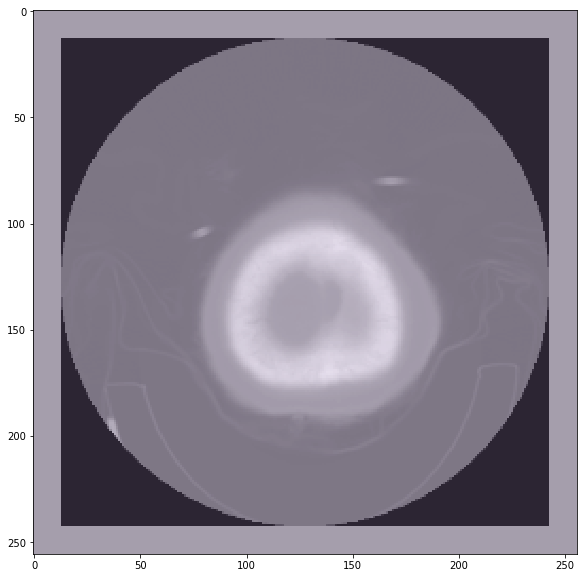

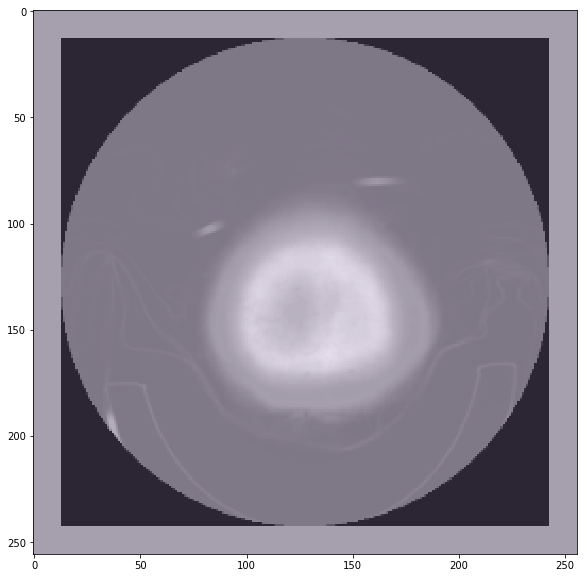

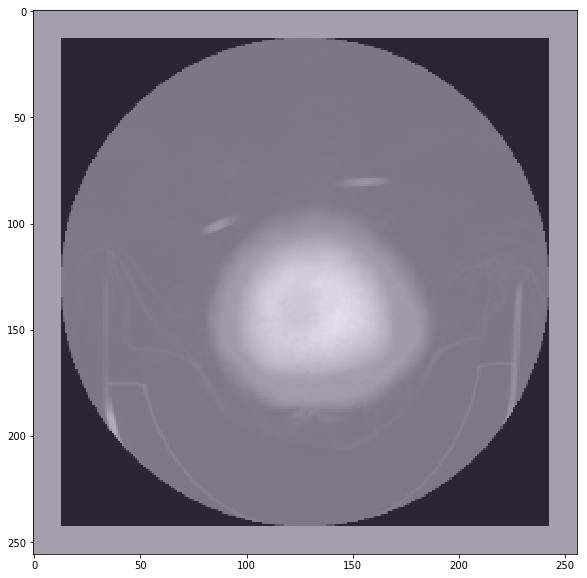

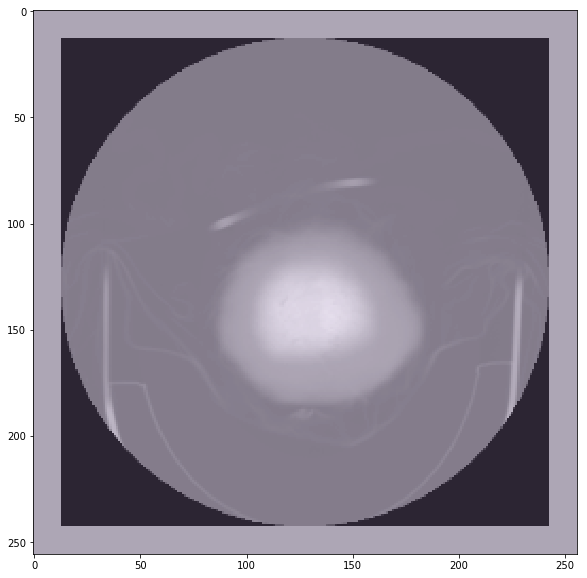

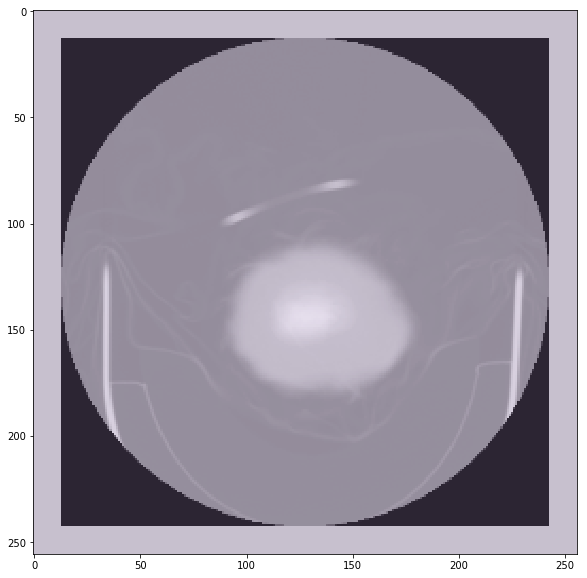

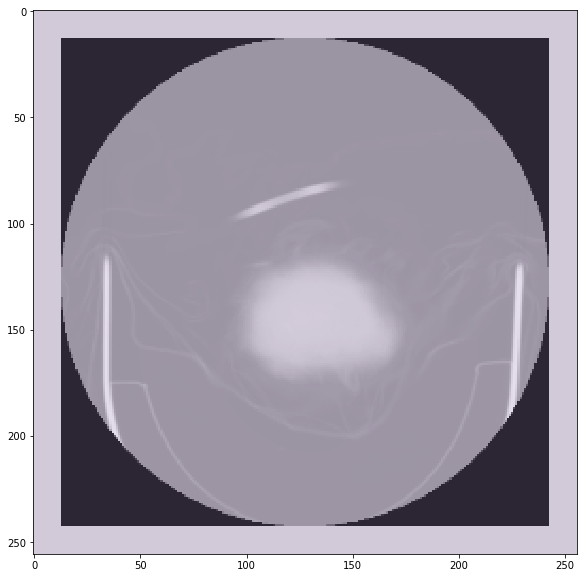

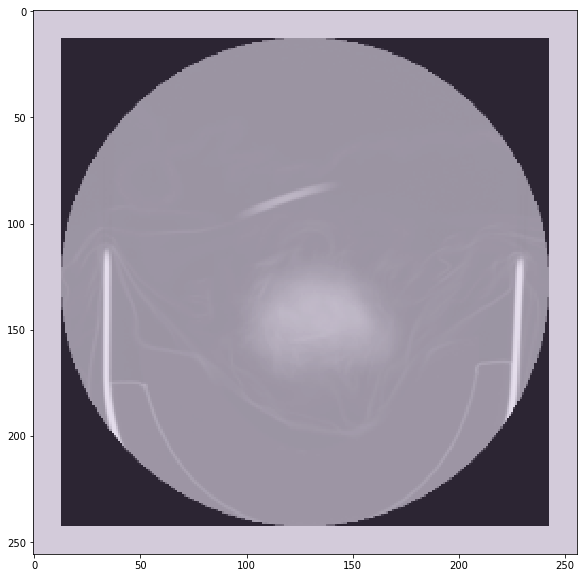

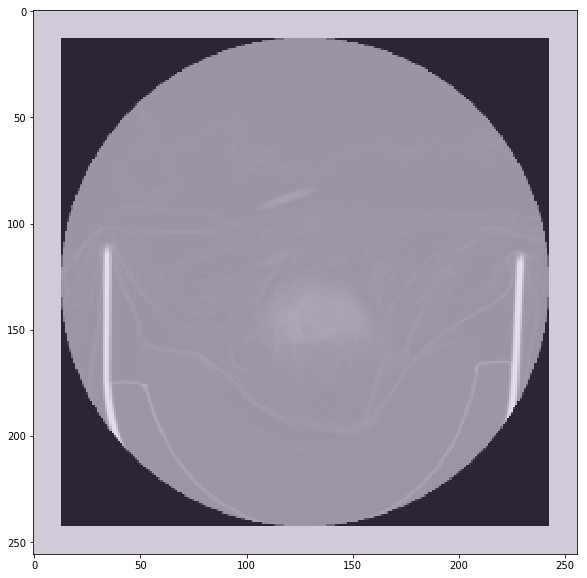

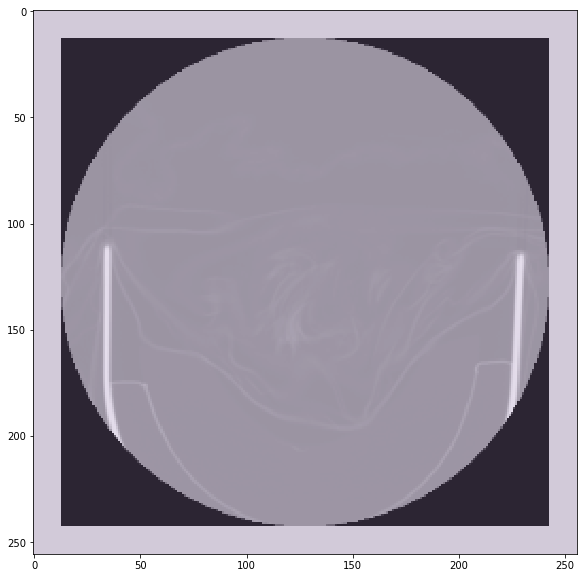

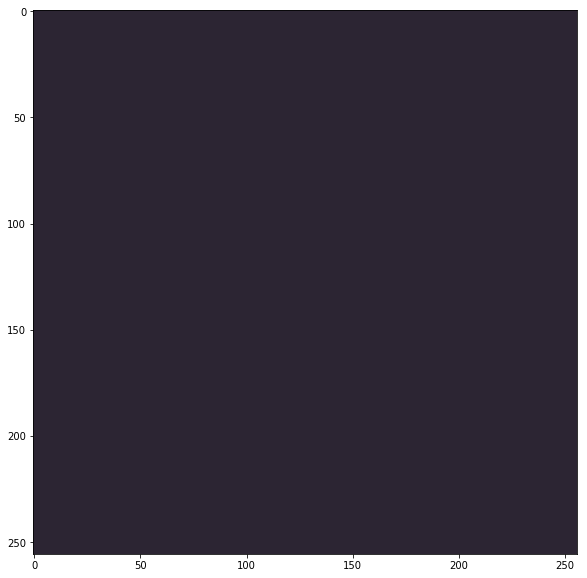

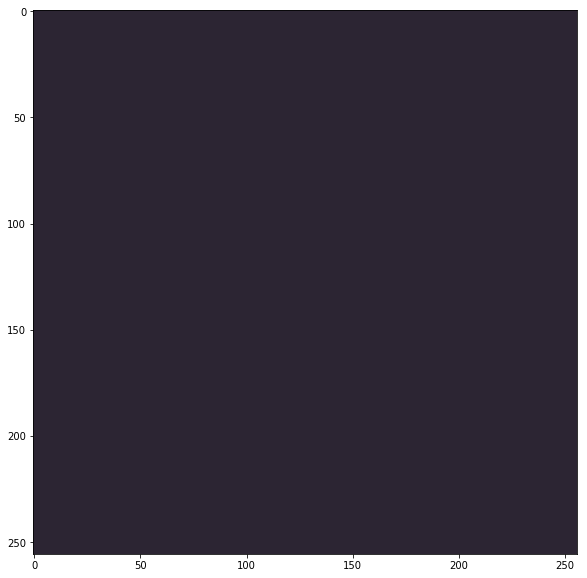

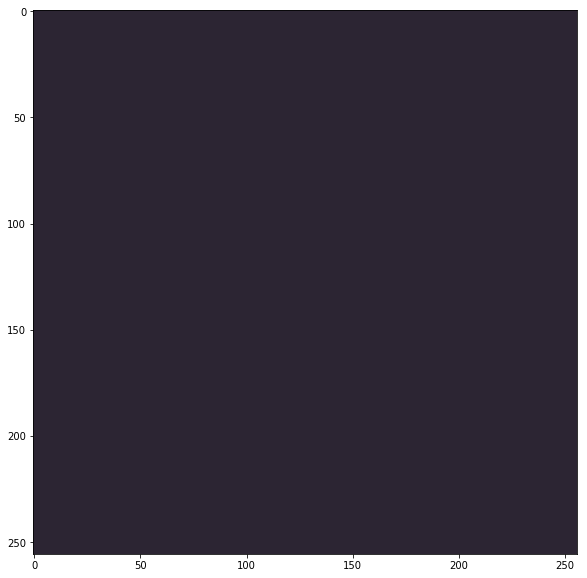

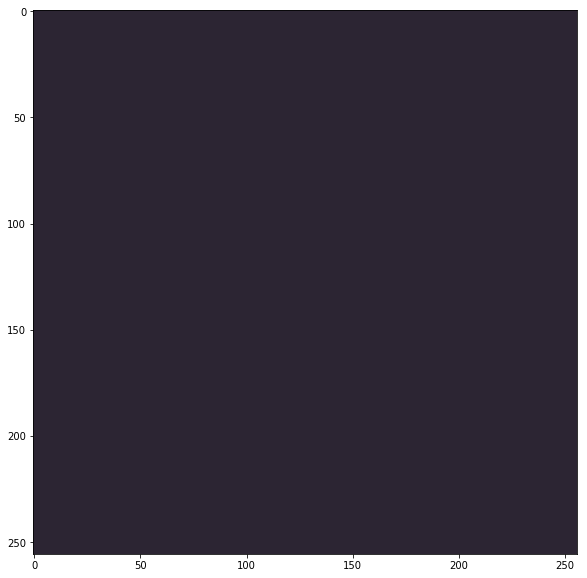

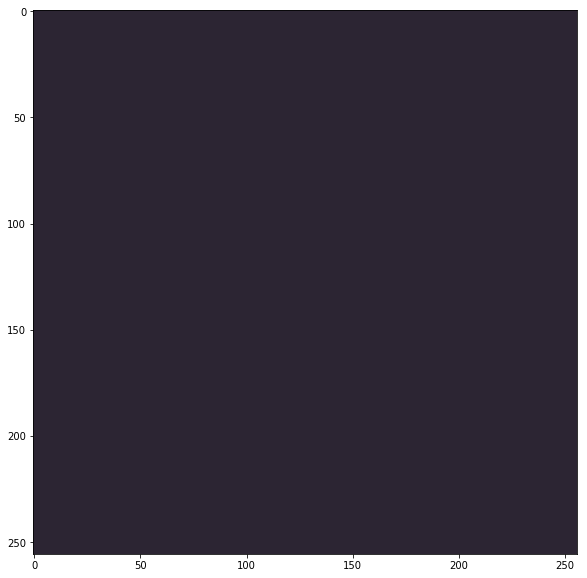

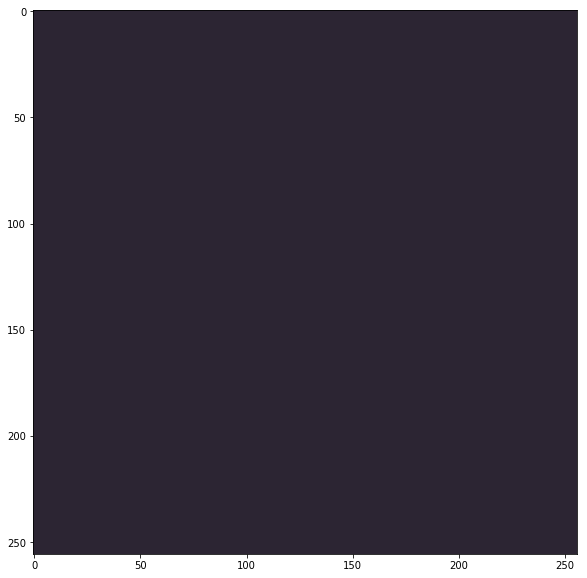

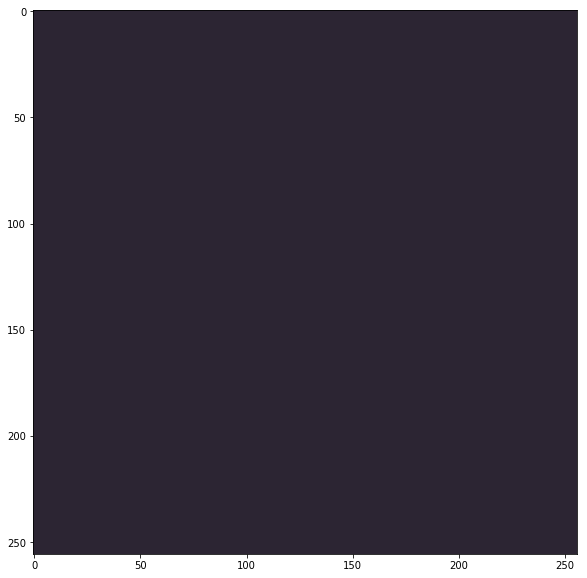

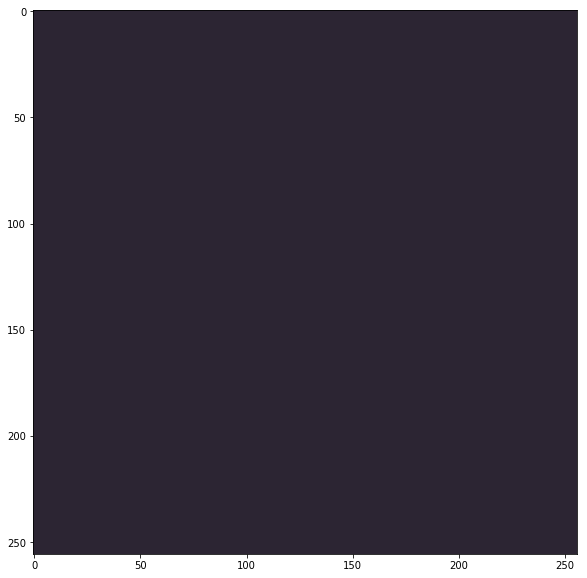

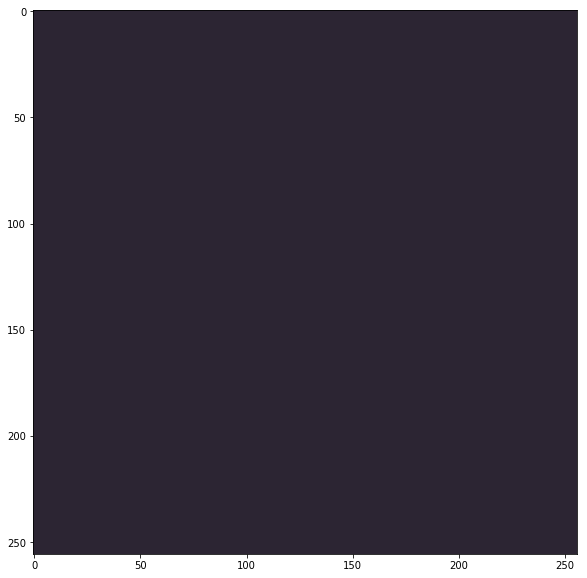

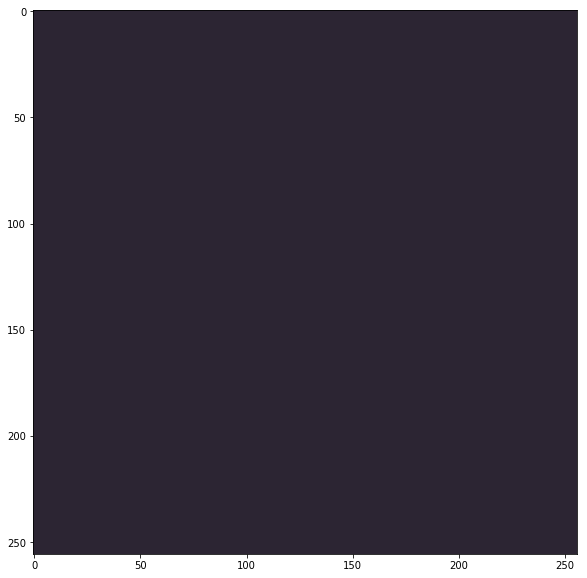

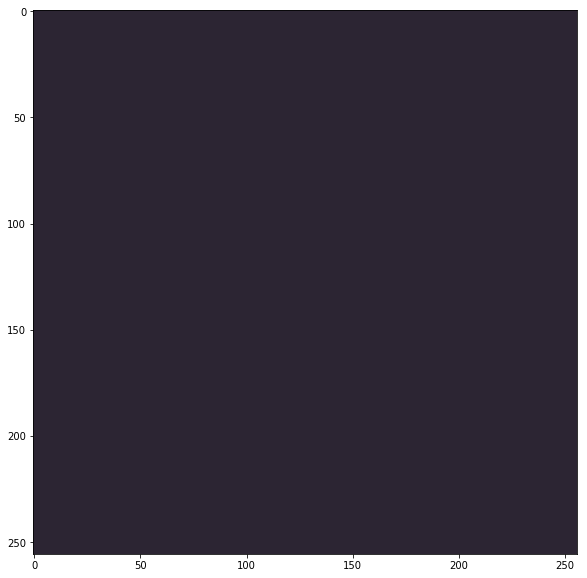

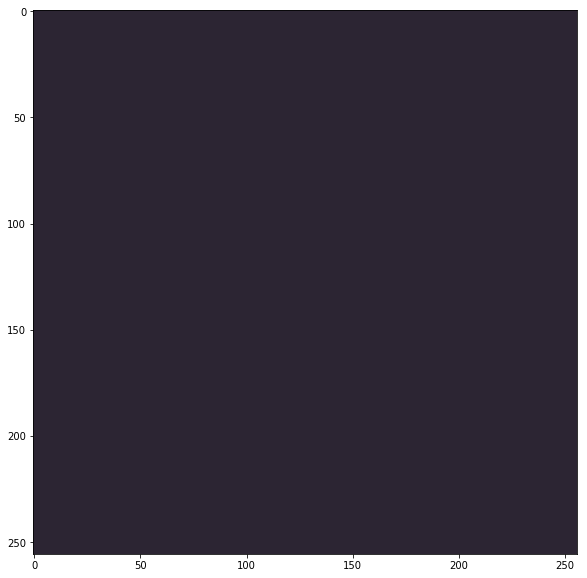

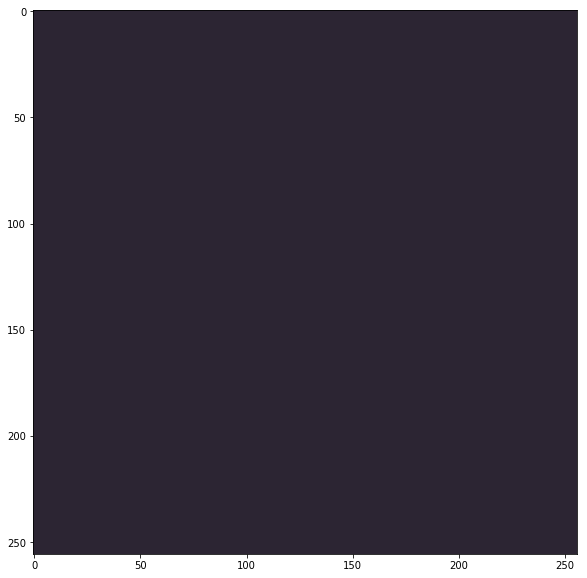

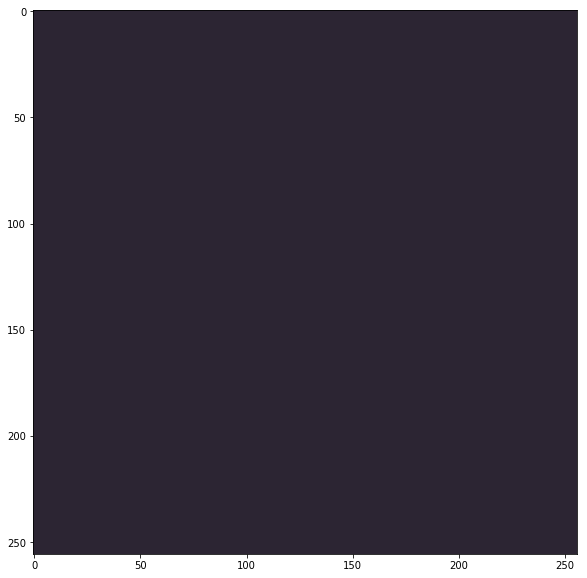

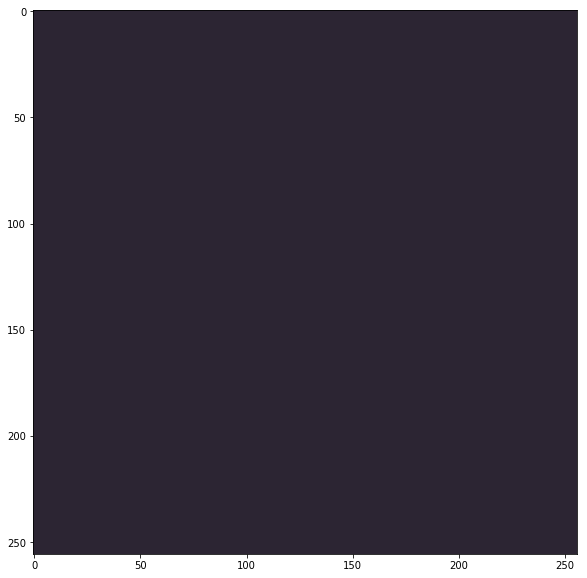

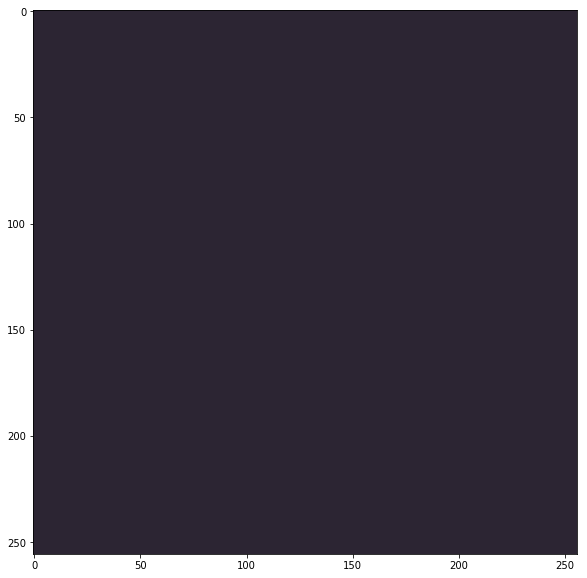

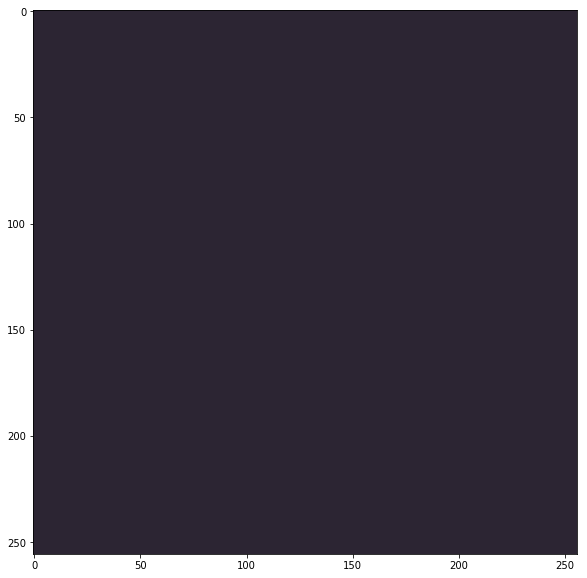

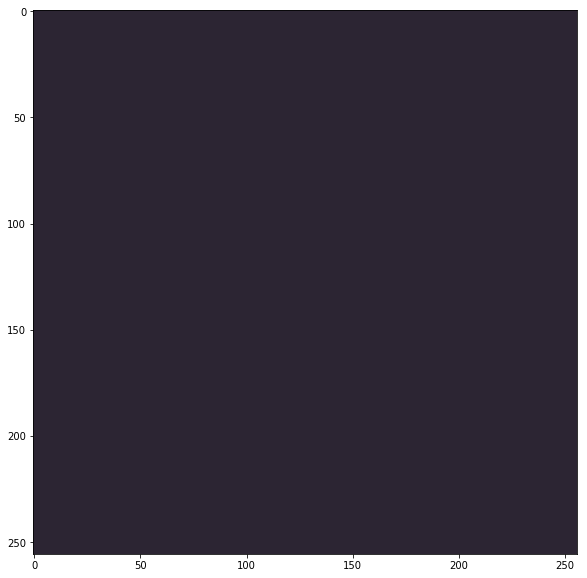

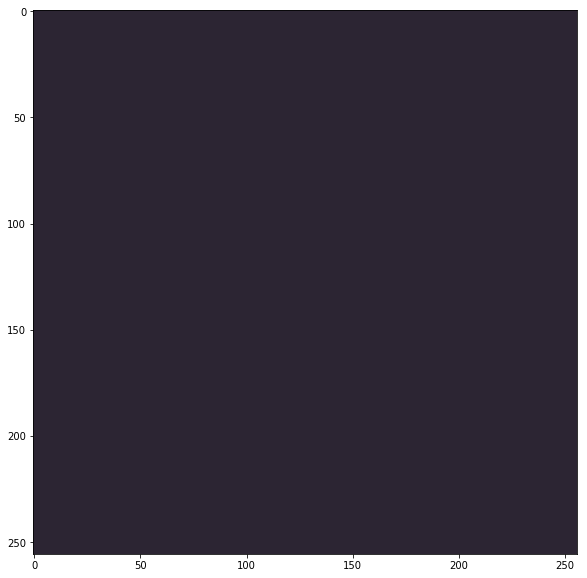

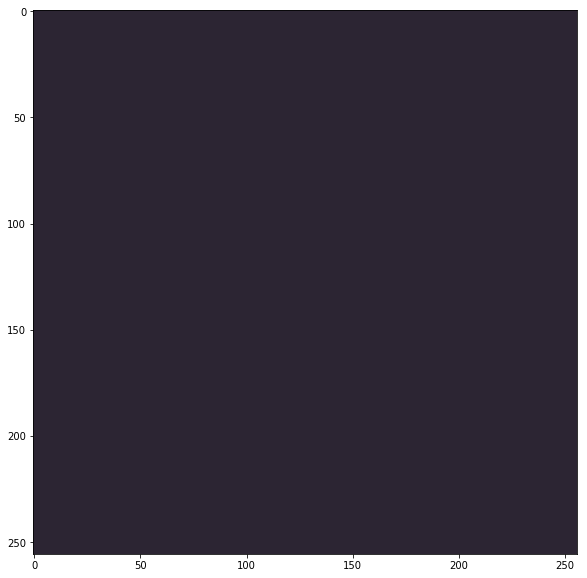

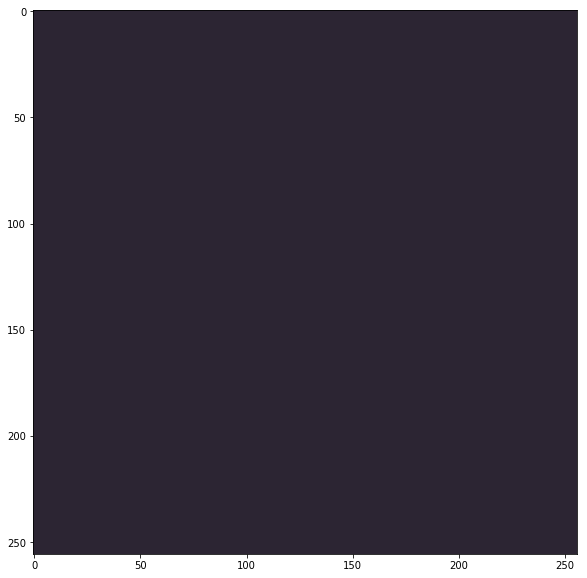

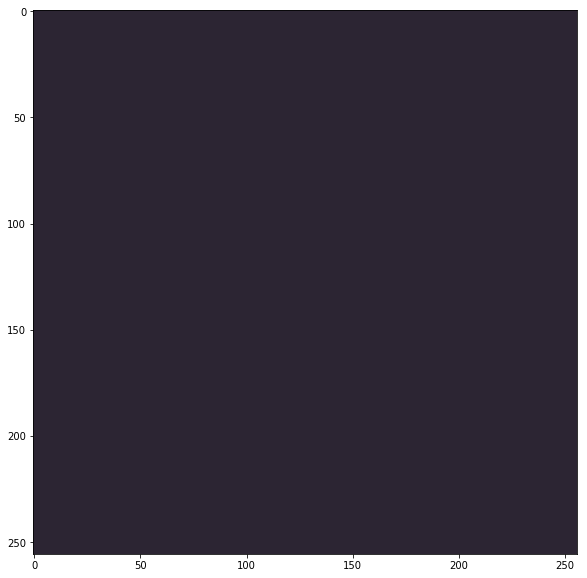

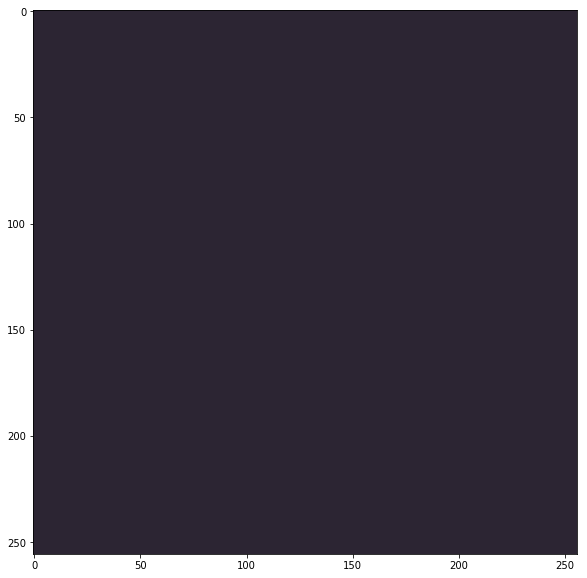

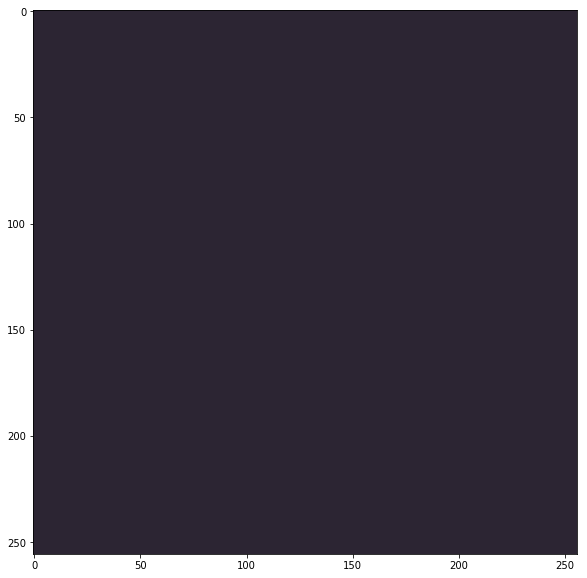

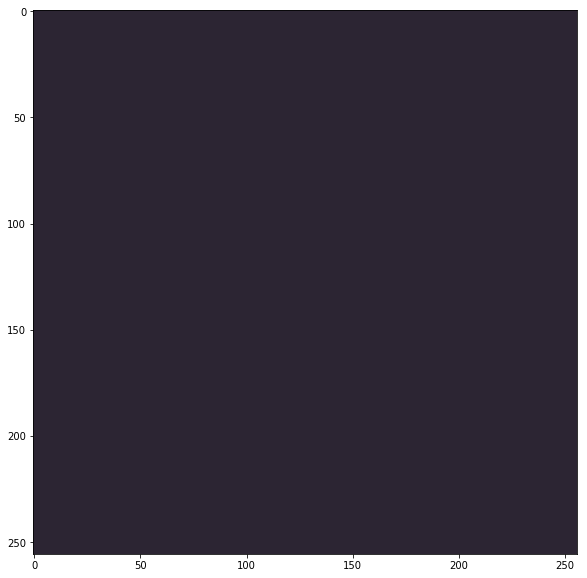

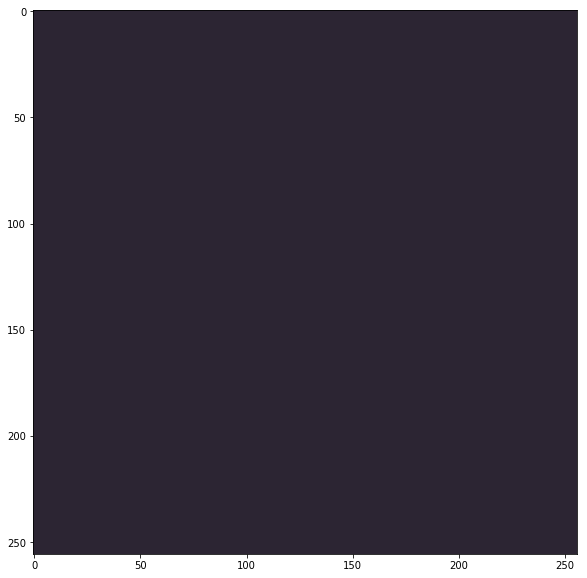

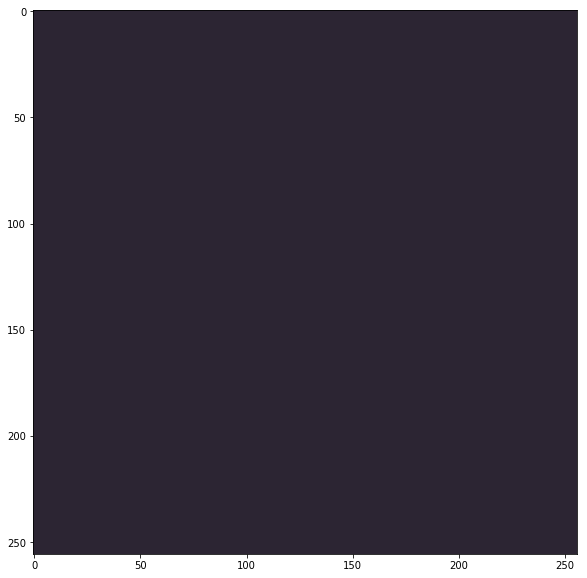

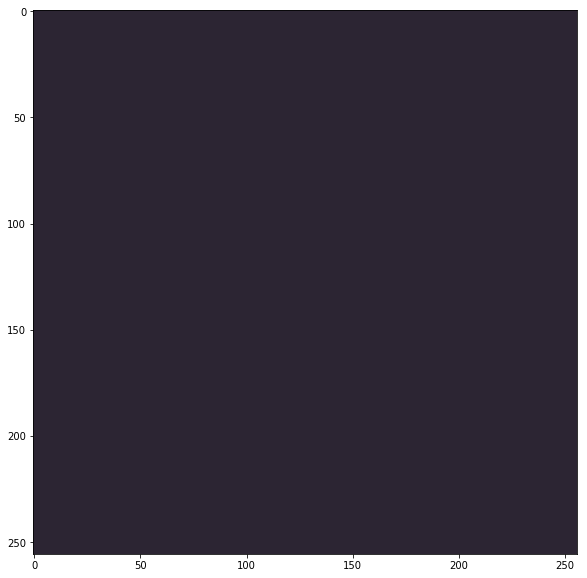

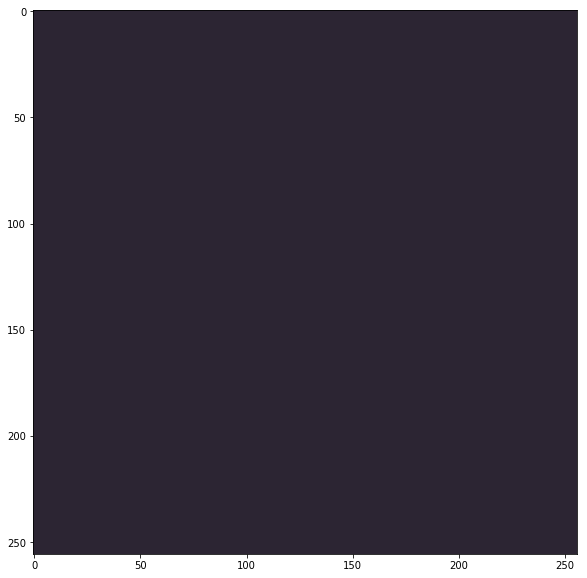

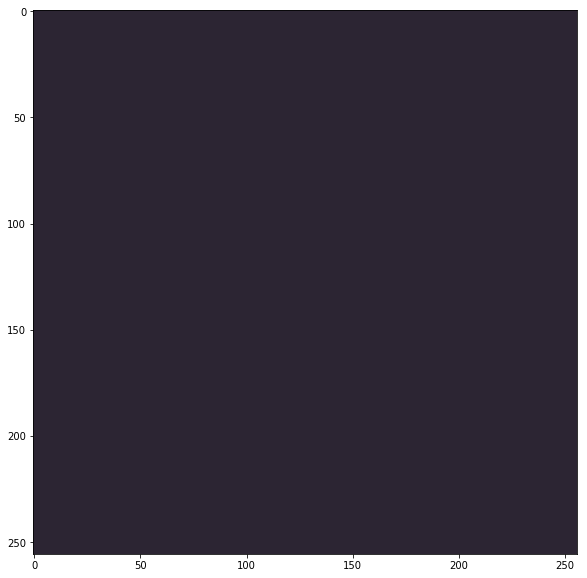

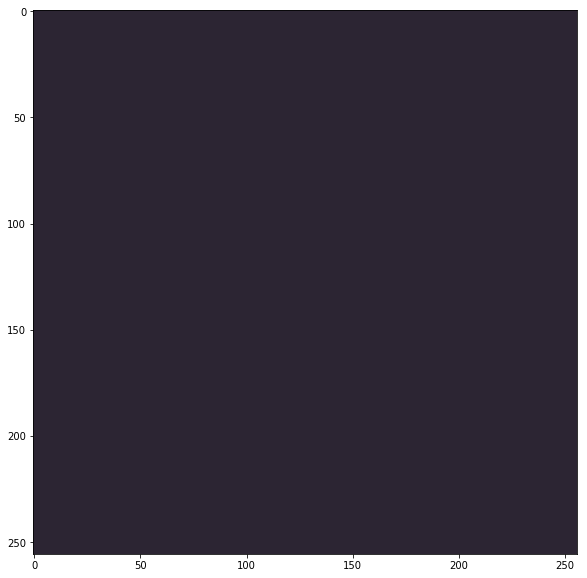

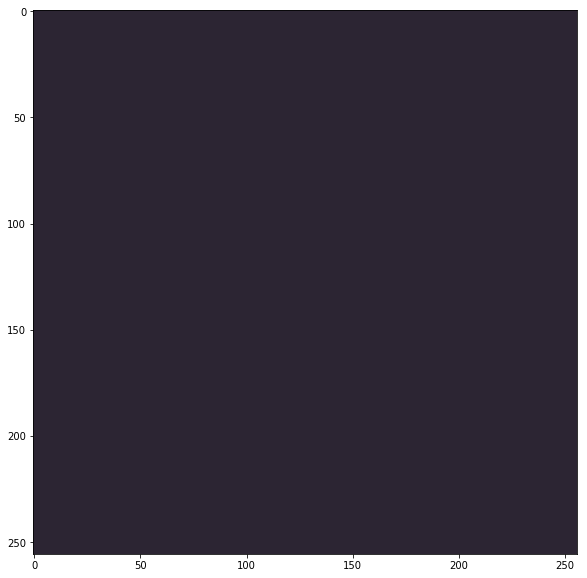

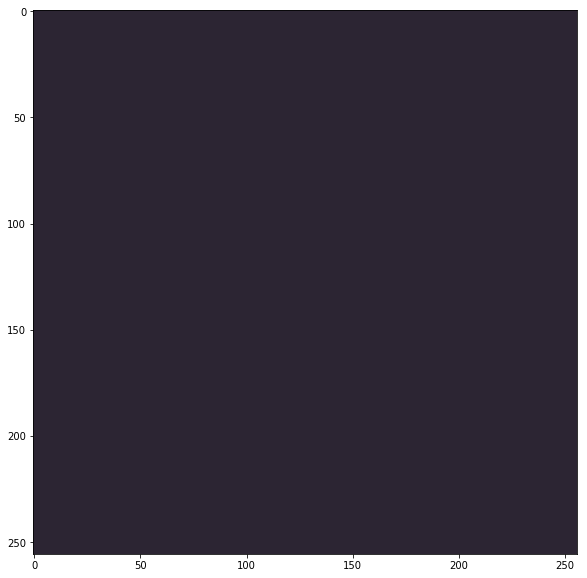

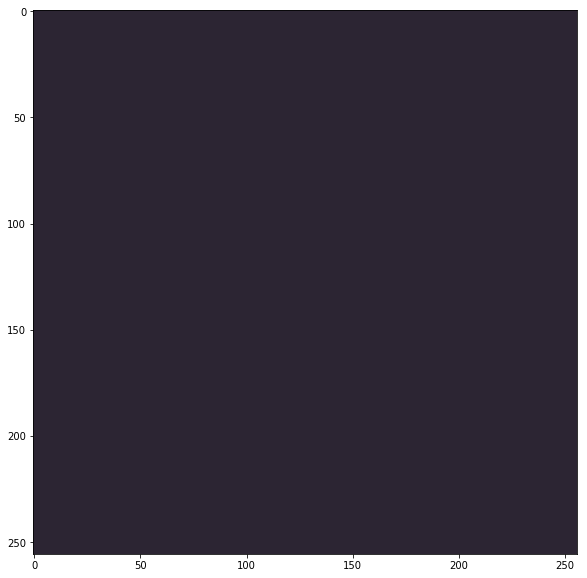

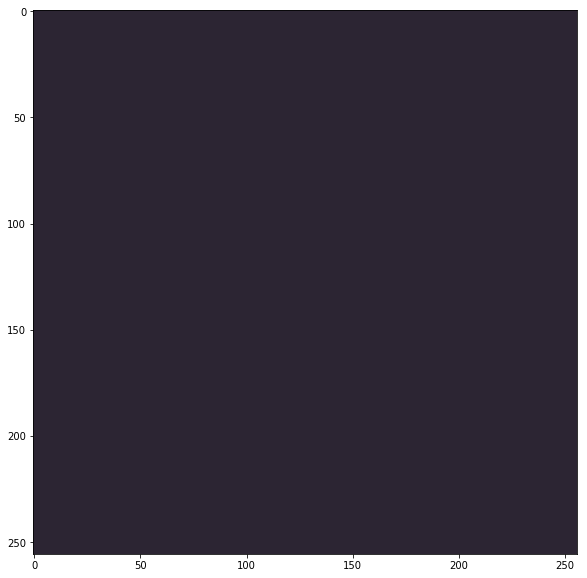

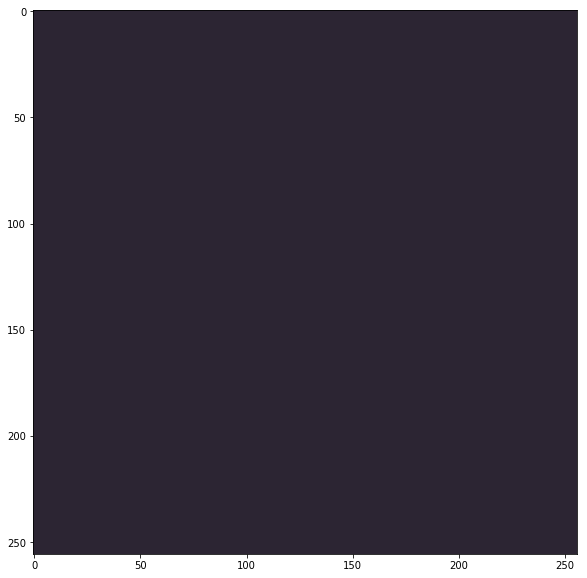

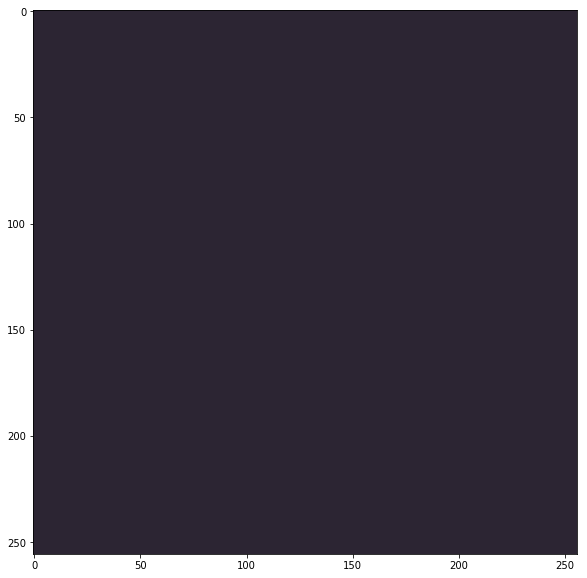

In [66]:
# light green indicates only the predicted model mask or atlas mask
# dark green indicates hand segmented target mask
plot_overlaid_images(images, pred_masks, target_masks, IMG_NUM, ['gray', 'Purples_r', 'Greens'], 0.15, range(len(images[IMG_NUM])))



## Test Case 1 MR (DL_Brain_NoTL_MR + DL_Ventricles_TL_MR)

In [4]:
images, target_masks, pred_masks, atlas_masks, pred_brain_masks, file_names = get_testcase_data(test_case_1_mr)
df = summary_table(images, target_masks, pred_masks, atlas_masks, file_names)
df

test_name  pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
0   ANON22366          0.867579           0.805216               6.370507   
1   ANON26348          0.715799           0.711995               0.530973   
2   ANON28622          0.894052           0.809953              -0.220321   
3   ANON38662          0.882498           0.873001               0.966062   
4   ANON41567          0.849471           0.864344              -3.396524   
5   ANON53486          0.828047           0.857837              -0.242653   
6   ANON60446          0.845333           0.845828              -3.688525   
7   ANON60751          0.813381           0.843381               9.223847   
8   ANON65248          0.774503           0.832042              -8.797251   
9   ANON72855          0.797941           0.801650               5.799616   
10  ANON78219          0.690378           0.526997              22.088836   
11  ANON78381          0.852848           0.800925              -7.111385   
12  ANON80073          0.756854           1.000000             -31.138713   
13  ANON93045          0.847113           0.800322               0.204604   
14  ANON98217          0.820855           0.851253              -3.687776   

    atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
0               -18.341246                   6.370507   
1                62.654867                   0.530973   
2               -12.004919                   0.220321   
3                19.010417                   0.966062   
4                -3.093734                   3.396524   
5                -0.296576                   0.242653   
6                -0.702576                   3.688525   
7                -2.012248                   9.223847   
8               -10.767468                   8.797251   
9                 5.872682                   5.799616   
10              156.182473                  22.088836   
11               17.254142                   7.111385   
12                0.000000                  31.138713   
13                3.038363                   0.204604   
14                5.494033                   3.687776   

    abs_atlas_percent_vol_diff  pred_volume_mm^3  
0                    18.341246             65871  
1                    62.654867             17040  
2                    12.004919             58422  
3                    19.010417             36057  
4                     3.093734             22014  
5                     0.296576             22200  
6                     0.702576             24675  
7                     2.012248             26217  
8                    10.767468             35829  
9                     5.872682             34752  
10                  156.182473             15255  
11                   17.254142             31623  
12                    0.000000             23784  
13                    3.038363             29385  
14                    5.494033             26874

In [5]:
df.describe()

pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
count         15.000000          15.000000              15.000000   
mean           0.815777           0.814983              -0.873247   
std            0.059175           0.099817              11.255047   
min            0.690378           0.526997             -31.138713   
25%            0.786222           0.801288              -3.688150   
50%            0.828047           0.832042              -0.220321   
75%            0.851160           0.854545               3.382839   
max            0.894052           1.000000              22.088836   

       atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
count               15.000000                  15.000000   
mean                14.819214                   6.897839   
std                 43.398590                   8.747247   
min                -18.341246                   0.204604   
25%                 -2.552991                   0.748518   
50%                  0.000000                   3.688525   
75%                 11.563412                   7.954318   
max                156.182473                  31.138713   

       abs_atlas_percent_vol_diff  pred_volume_mm^3  
count                   15.000000         15.000000  
mean                    21.115050      31333.200000  
std                     40.509772      14053.992332  
min                      0.000000      15255.000000  
25%                      2.525306      22992.000000  
50%                      5.872682      26874.000000  
75%                     17.797694      35290.500000  
max                    156.182473      65871.000000

## Test Case 2 MR (DL_Brain_NoTL_MR + DL_Ventricles_TL_MR)

In [12]:
images, target_masks, pred_masks, atlas_masks, pred_brain_masks, file_names = get_testcase_data(test_case_2_mr)
df = summary_table(images, target_masks, pred_masks, atlas_masks, file_names)
df

test_name  pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
0   MR-Test-001          0.623003           0.698015             -42.418056   
1   MR-Test-001          0.828499           0.766428             -24.566263   
2   MR-Test-002          0.912300           0.857047             -10.514292   
3   MR-Test-002          0.822513           0.763542             -22.925825   
4   MR-Test-003          0.415999           0.843666             -73.483407   
5   MR-Test-003          0.706559           0.584025             -43.133636   
6   MR-Test-004          0.590647           0.802226             -44.918256   
7   MR-Test-004          0.855798           0.686126             -23.147722   
8   MR-Test-005          0.847986           0.782368             -15.654145   
9   MR-Test-005          0.748514           0.707437             -31.919278   
10  MR-Test-006          0.825140           0.692123             -24.587657   
11  MR-Test-006          0.733252           0.641767             -27.624004   
12  MR-Test-007          0.522562           0.402501             -27.921153   
13  MR-Test-007          0.048720           0.060659             -97.503169   
14  MR-Test-008          0.593307           0.428473              18.871176   
15  MR-Test-008          0.788132           0.736396             -30.764084   
16  MR-Test-009          0.682127           0.331204             -48.084629   
17  MR-Test-009          0.727024           0.711360             -41.255108   
18  MR-Test-010          0.650301           0.552258             -47.092780   
19  MR-Test-010          0.396154           1.000000             -59.116673   

    atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
0                -9.209482                  42.418056   
1               -32.196141                  24.566263   
2                 0.594541                  10.514292   
3               -25.574537                  22.925825   
4               -16.729285                  73.483407   
5               -56.112021                  43.133636   
6               -26.198910                  44.918256   
7               -46.546633                  23.147722   
8               -34.642839                  15.654145   
9               -40.473598                  31.919278   
10              -41.941218                  24.587657   
11              -24.512843                  27.624004   
12               -0.455763                  27.921153   
13              -96.872186                  97.503169   
14              134.712049                  18.871176   
15              -23.253713                  30.764084   
16              -79.698419                  48.084629   
17              -41.603188                  41.255108   
18              -49.950015                  47.092780   
19                0.000000                  59.116673   

    abs_atlas_percent_vol_diff  pred_volume_mm^3  
0                     9.209482             15231  
1                    32.196141             46566  
2                     0.594541             91662  
3                    25.574537             41553  
4                    16.729285             50604  
5                    56.112021             73953  
6                    26.198910             36387  
7                    46.546633            120240  
8                    34.642839             97131  
9                    40.473598             52527  
10                   41.941218             54729  
11                   24.512843             19611  
12                    0.455763             37956  
13                   96.872186             35103  
14                  134.712049             24831  
15                   23.253713             62088  
16                   79.698419             80460  
17                   41.603188             34935  
18                   49.950015             49218  
19                    0.000000             16662

In [7]:
df.describe()

pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
count         20.000000          20.000000              20.000000   
mean           0.665927           0.652381             -35.887948   
std            0.203637           0.213131              24.106120   
min            0.048720           0.060659             -97.503169   
25%            0.592642           0.576083             -45.461887   
50%            0.716792           0.702726             -31.341681   
75%            0.823170           0.770413             -24.211628   
max            0.912300           1.000000              18.871176   

       atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
count               20.000000                  20.000000   
mean               -25.533210                  37.775066   
std                 45.228467                  20.851328   
min                -96.872186                  10.514292   
25%                -43.092572                  24.211628   
50%                -29.197526                  31.341681   
75%                -14.849334                  45.461887   
max                134.712049                  97.503169   

       abs_atlas_percent_vol_diff  pred_volume_mm^3  
count                   20.000000         20.000000  
mean                    39.063869      52072.350000  
std                     33.549531      28304.628196  
min                      0.000000      15231.000000  
25%                     21.622606      35061.000000  
50%                     33.419490      47892.000000  
75%                     47.397478      65054.250000  
max                    134.712049     120240.000000

## Test Case 1 CT (DL_Brain_NoTL_CT + DL_Ventricles_TL_CT)

In [8]:
images, target_masks, pred_masks, atlas_masks, pred_brain_masks, file_names = get_testcase_data(test_case_1_ct)
df = summary_table(images, target_masks, pred_masks, atlas_masks, file_names)
df

test_name  pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
0  ANON17272          0.790899           0.837954              -6.094794   
1  ANON22673          0.757217           0.829603               9.754335   
2  ANON24224          0.749615           0.812502              25.753996   
3  ANON45950          0.766808           0.744395              24.454900   
4  ANON51808          0.543736           0.612402             -50.030822   
5  ANON65837          0.811118           0.892143             -12.217029   
6  ANON71219          0.718829           0.757522             -20.096004   
7  ANON84614          0.689958           0.758166              36.167364   
8  ANON95021          0.865415           0.891489              -5.417101   

   atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
0              -16.065801                   6.094794   
1              -13.424855                   9.754335   
2              -15.462126                  25.753996   
3               -5.508377                  24.454900   
4              -36.567624                  50.030822   
5               -6.598845                  12.217029   
6              -31.408926                  20.096004   
7              -17.087866                  36.167364   
8               -4.816091                   5.417101   

   abs_atlas_percent_vol_diff  pred_volume_mm^3  
0                   16.065801             44697  
1                   13.424855             45570  
2                   15.462126             54288  
3                    5.508377             32535  
4                   36.567624             12159  
5                    6.598845             57468  
6                   31.408926             18477  
7                   17.087866             24408  
8                    4.816091             70818

In [9]:
df.describe()

pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
count          9.000000           9.000000               9.000000   
mean           0.743733           0.792908               0.252761   
std            0.090714           0.087121              26.894796   
min            0.543736           0.612402             -50.030822   
25%            0.718829           0.757522             -12.217029   
50%            0.757217           0.812502              -5.417101   
75%            0.790899           0.837954              24.454900   
max            0.865415           0.892143              36.167364   

       atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
count                9.000000                   9.000000   
mean               -16.326724                  21.109594   
std                 11.130732                  14.902521   
min                -36.567624                   5.417101   
25%                -17.087866                   9.754335   
50%                -15.462126                  20.096004   
75%                 -6.598845                  25.753996   
max                 -4.816091                  50.030822   

       abs_atlas_percent_vol_diff  pred_volume_mm^3  
count                    9.000000          9.000000  
mean                    16.326724      40046.666667  
std                     11.130732      19523.356845  
min                      4.816091      12159.000000  
25%                      6.598845      24408.000000  
50%                     15.462126      44697.000000  
75%                     17.087866      54288.000000  
max                     36.567624      70818.000000

## Test Case 2 CT (DL_Brain_NoTL_CT + DL_Ventricles_TL_CT)

In [10]:
images, target_masks, pred_masks, atlas_masks, pred_brain_masks, file_names = get_testcase_data(test_case_2_ct)
df = summary_table(images, target_masks, pred_masks, atlas_masks, file_names)
df

test_name  pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
0   CT-Test-001          0.735840           0.770998             -30.392630   
1   CT-Test-002          0.764696           0.554783             -29.321159   
2   CT-Test-002          0.772819           0.791574               5.517323   
3   CT-Test-003          0.743642           0.767049             -38.557030   
4   CT-Test-004          0.478239           1.000000              29.599664   
5   CT-Test-004          0.483867           0.521567             -52.160765   
6   CT-Test-005          0.850713           0.854068             -19.125741   
7   CT-Test-005          0.777184           0.739632             -23.452607   
8   CT-Test-006          0.835772           0.780813              -6.347089   
9   CT-Test-006          0.792870           0.863039              -8.928571   
10  CT-Test-007          0.470955           0.609775             -59.559289   
11  CT-Test-007          0.468459           0.718098             -67.484325   
12  CT-Test-008          0.821511           0.811174               1.852366   
13  CT-Test-008          0.693540           0.682973             -20.695334   
14  CT-Test-009          0.692489           0.524378              43.983219   
15  CT-Test-009          0.703141           0.778622             -26.491960   
16  CT-Test-010          0.762874           0.743477             -25.137808   
17  CT-Test-010          0.674620           0.704002             -20.724452   

    atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
0               -36.072689                  30.392630   
1               -59.995447                  29.321159   
2               -24.833887                   5.517323   
3               -35.755367                  38.557030   
4                 0.000000                  29.599664   
5               -32.640718                  52.160765   
6               -21.589794                  19.125741   
7               -34.304690                  23.452607   
8               -34.591295                   6.347089   
9               -14.792335                   8.928571   
10              -34.485933                  59.559289   
11              -25.570765                  67.484325   
12              -20.626100                   1.852366   
13              -17.465691                  20.695334   
14              -22.477368                  43.983219   
15                5.534941                  26.491960   
16               -5.996213                  25.137808   
17                3.584607                  20.724452   

    abs_atlas_percent_vol_diff  pred_volume_mm^3  
0                    36.072689             82278  
1                    59.995447             83835  
2                    24.833887             53358  
3                    35.755367             64740  
4                     0.000000             37002  
5                    32.640718             29424  
6                    21.589794            113727  
7                    34.304690             50829  
8                    34.591295            124254  
9                    14.792335             54468  
10                   34.485933             21087  
11                   25.570765             40761  
12                   20.626100             32991  
13                   17.465691             26004  
14                   22.477368             19563  
15                    5.534941             28527  
16                    5.996213             53373  
17                    3.584607             31581

In [11]:
df.describe()

pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
count         18.000000          18.000000              18.000000   
mean           0.695735           0.734223             -19.301455   
std            0.130500           0.123249              28.136575   
min            0.468459           0.521567             -67.484325   
25%            0.679087           0.688231             -30.124762   
50%            0.739741           0.755263             -22.088529   
75%            0.776092           0.788883              -6.992459   
max            0.850713           1.000000              43.983219   

       atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
count               18.000000                  18.000000   
mean               -22.893263                  28.296185   
std                 16.528146                  18.394427   
min                -59.995447                   1.852366   
25%                -34.440622                  19.518139   
50%                -23.655628                  25.814884   
75%                -15.460674                  36.515930   
max                  5.534941                  67.484325   

       abs_atlas_percent_vol_diff  pred_volume_mm^3  
count                   18.000000         18.000000  
mean                    23.906547      52655.666667  
std                     14.932135      30679.177993  
min                      0.000000      19563.000000  
25%                     15.460674      29963.250000  
50%                     23.655628      45795.000000  
75%                     34.440622      62172.000000  
max                     59.995447     124254.000000